In [1]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install tabulate

Defaulting to user installation because normal site-packages is not writeable


In [4]:
#Gerekli kütüphanelerin yüklenmesi
import pandas as pd
import numpy as np
import warnings
import os
#Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msno
from tabulate import tabulate

In [ ]:
workspace_path = "C:/Users/sseli/Desktop/Music_Recommendation_ System_Based_On_User_Mood"

os.chdir(workspace_path)

1. VERİ SETİNE GENEL BAKIŞ

In [6]:
# Verilerin yüklenmesi
# Spotify verisi
df_spotify = pd.read_csv(r"datasets/Spotify_Youtube.csv")

# Müzik ve ruh hali anketi verisi
df_music = pd.read_csv(r"datasets/mxmh_survey_results.csv")

In [7]:
#Verisetinin genel görünümü
df_spotify

Unnamed: 0       Artist  \
0               0     Gorillaz   
1               1     Gorillaz   
2               2     Gorillaz   
3               3     Gorillaz   
4               4     Gorillaz   
...           ...          ...   
20713       20713  SICK LEGEND   
20714       20714  SICK LEGEND   
20715       20715  SICK LEGEND   
20716       20716  SICK LEGEND   
20717       20717  SICK LEGEND   

                                             Url_spotify  \
0      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
...                                                  ...   
20713  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20714  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20715  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20716  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20717  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   

                                               Track  \
0                                     Feel Good Inc.   
1                                    Rhinestone Eyes   
2      New Gold (feat. Tame Impala and Bootie Brown)   
3                                 On Melancholy Hill   
4                                     Clint Eastwood   
...                                              ...   
20713                           JUST DANCE HARDSTYLE   
20714                 SET FIRE TO THE RAIN HARDSTYLE   
20715                      OUTSIDE HARDSTYLE SPED UP   
20716                            ONLY GIRL HARDSTYLE   
20717                             MISS YOU HARDSTYLE   

                                               Album Album_type  \
0                                         Demon Days      album   
1                                      Plastic Beach      album   
2      New Gold (feat. Tame Impala and Bootie Brown)     single   
3                                      Plastic Beach      album   
4                                           Gorillaz      album   
...                                              ...        ...   
20713                           JUST DANCE HARDSTYLE     single   
20714                 SET FIRE TO THE RAIN HARDSTYLE     single   
20715                      OUTSIDE HARDSTYLE SPED UP     single   
20716                            ONLY GIRL HARDSTYLE     single   
20717                             MISS YOU HARDSTYLE     single   

                                        Uri  Danceability  Energy   Key  ...  \
0      spotify:track:0d28khcov6AiegSCpG5TuT         0.818   0.705   6.0  ...   
1      spotify:track:1foMv2HQwfQ2vntFf9HFeG         0.676   0.703   8.0  ...   
2      spotify:track:64dLd6rVqDLtkXFYrEUHIU         0.695   0.923   1.0  ...   
3      spotify:track:0q6LuUqGLUiCPP1cbdwFs3         0.689   0.739   2.0  ...   
4      spotify:track:7yMiX7n9SBvadzox8T5jzT         0.663   0.694  10.0  ...   
...                                     ...           ...     ...   ...  ...   
20713  spotify:track:0RtcKQGyI4hr8FgFH1TuYG         0.582   0.926   5.0  ...   
20714  spotify:track:3rHvPA8lUnPBkaLyPOc0VV         0.531   0.936   4.0  ...   
20715  spotify:track:4jk00YxPtPbhvHJE9N4ddv         0.443   0.830   4.0  ...   
20716  spotify:track:5EyErbpsugWliX006eTDex         0.417   0.767   9.0  ...   
20717  spotify:track:6lOn0jz1QpjcWeXo1oMm0k         0.498   0.938   6.0  ...   

                                       Url_youtube  \
0      https://www.youtube.com/watch?v=HyHNuVaZJ-k   
1      https://www.youtube.com/watch?v=yYDmaexVHic   
2      https://www.youtube.com/watch?v=qJa-VFwPpYA   
3      https://www.youtube.com/watch?v=04mfKJWDSzI   
4      https://www.youtube.com/watch?v=1V_xRb0x9aw   
...                                            ...   
20713  https://www.youtube.com/watch?v=5SHmKFKlNqI   
20714 

In [8]:
#Verisetinin genel görünümü
df_music

Timestamp   Age Primary streaming service  Hours per day  \
0     8/27/2022 19:29:02  18.0                   Spotify            3.0   
1     8/27/2022 19:57:31  63.0                   Pandora            1.5   
2     8/27/2022 21:28:18  18.0                   Spotify            4.0   
3     8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4     8/27/2022 21:54:47  18.0                   Spotify            4.0   
..                   ...   ...                       ...            ...   
731  10/30/2022 14:37:28  17.0                   Spotify            2.0   
732   11/1/2022 22:26:42  18.0                   Spotify            1.0   
733   11/3/2022 23:24:38  19.0   Other streaming service            6.0   
734   11/4/2022 17:31:47  19.0                   Spotify            5.0   
735    11/9/2022 1:55:20  29.0             YouTube Music            2.0   

    While working Instrumentalist Composer         Fav genre Exploratory  \
0             Yes             Yes      Yes             Latin         Yes   
1             Yes              No       No              Rock         Yes   
2              No              No       No  Video game music          No   
3             Yes              No      Yes              Jazz         Yes   
4             Yes              No       No               R&B         Yes   
..            ...             ...      ...               ...         ...   
731           Yes             Yes       No              Rock         Yes   
732           Yes             Yes       No               Pop         Yes   
733           Yes              No      Yes               Rap         Yes   
734           Yes             Yes       No         Classical          No   
735           Yes              No       No           Hip hop         Yes   

    Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0                 Yes  ...        Sometimes  Very frequently            Never   
1                  No  ...        Sometimes           Rarely  Very frequently   
2                 Yes  ...            Never           Rarely           Rarely   
3                 Yes  ...        Sometimes            Never            Never   
4                  No  ...  Very frequently  Very frequently            Never   
..                ...  ...              ...              ...              ...   
731               Yes  ...            Never           Rarely  Very frequently   
732               Yes  ...            Never            Never        Sometimes   
733                No  ...        Sometimes        Sometimes           Rarely   
734                No  ...            Never            Never            Never   
735               Yes  ...  Very frequently  Very frequently  Very frequently   

    Frequency [Video game music] Anxiety Depression Insomnia  OCD  \
0                      Sometimes     3.0        0.0      1.0  0.0   
1                         Rarely     7.0        2.0      2.0  1.0   
2                Very frequently     7.0        7.0     10.0  2.0   
3                          Never     9.0        7.0      3.0  3.0   
4                         Rarely     7.0        2.0      5.0  9.0   
..                           ...     ...        ...      ...  ...   
731                        Never     7.0        6.0      0.0  9.0   
732                    Sometimes     3.0        2.0      2.0  5.0   
733                       Rarely     2.0        2.0      2.0  2.0   
734                    Sometimes     2.0        3.0      2.0  1.0   
735                       Rarely     2.0        2.0      2.0  5.0   

    Music effects    Permissions  
0             NaN  I understand.  
1             NaN  I understand.  
2       No effect  I understand.  
3         Improve  I understand.  
4         Improve  I understand.  
..            ...            ...  
731       Improve  I understand.  
732       Improve  I understand.  
733       Improve  I understand.  
734       Improve  I understand.  
735       Impr

In [9]:
# İlk beş satırın gösterilmesi
df_spotify.head()

Unnamed: 0    Artist                                        Url_spotify  \
0           0  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1           1  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2           2  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3           3  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4           4  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   

                                           Track  \
0                                 Feel Good Inc.   
1                                Rhinestone Eyes   
2  New Gold (feat. Tame Impala and Bootie Brown)   
3                             On Melancholy Hill   
4                                 Clint Eastwood   

                                           Album Album_type  \
0                                     Demon Days      album   
1                                  Plastic Beach      album   
2  New Gold (feat. Tame Impala and Bootie Brown)     single   
3                                  Plastic Beach      album   
4                                       Gorillaz      album   

                                    Uri  Danceability  Energy   Key  ...  \
0  spotify:track:0d28khcov6AiegSCpG5TuT         0.818   0.705   6.0  ...   
1  spotify:track:1foMv2HQwfQ2vntFf9HFeG         0.676   0.703   8.0  ...   
2  spotify:track:64dLd6rVqDLtkXFYrEUHIU         0.695   0.923   1.0  ...   
3  spotify:track:0q6LuUqGLUiCPP1cbdwFs3         0.689   0.739   2.0  ...   
4  spotify:track:7yMiX7n9SBvadzox8T5jzT         0.663   0.694  10.0  ...   

                                   Url_youtube  \
0  https://www.youtube.com/watch?v=HyHNuVaZJ-k   
1  https://www.youtube.com/watch?v=yYDmaexVHic   
2  https://www.youtube.com/watch?v=qJa-VFwPpYA   
3  https://www.youtube.com/watch?v=04mfKJWDSzI   
4  https://www.youtube.com/watch?v=1V_xRb0x9aw   

                                               Title   Channel        Views  \
0         Gorillaz - Feel Good Inc. (Official Video)  Gorillaz  693555221.0   
1  Gorillaz - Rhinestone Eyes [Storyboard Film] (...  Gorillaz   72011645.0   
2  Gorillaz - New Gold ft. Tame Impala & Bootie B...  Gorillaz    8435055.0   
3     Gorillaz - On Melancholy Hill (Official Video)  Gorillaz  211754952.0   
4         Gorillaz - Clint Eastwood (Official Video)  Gorillaz  618480958.0   

       Likes  Comments                                        Description  \
0  6220896.0  169907.0  Official HD Video for Gorillaz' fantastic trac...   
1  1079128.0   31003.0  The official video for Gorillaz - Rhinestone E...   
2   282142.0    7399.0  Gorillaz - New Gold ft. Tame Impala & Bootie B...   
3  1788577.0   55229.0  Follow Gorillaz online:\nhttp://gorillaz.com \...   
4  6197318.0  155930.0  The official music video for Gorillaz - Clint ...   

   Licensed official_video        Stream  
0      True           True  1.040235e+09  
1      True           True  3.100837e+08  
2      True           True  6.306347e+07  
3      True           True  4.346636e+08  
4      True           True  6.172597e+08  

[5 rows x 28 columns]

In [10]:
df_music.head()

Timestamp   Age Primary streaming service  Hours per day  \
0  8/27/2022 19:29:02  18.0                   Spotify            3.0   
1  8/27/2022 19:57:31  63.0                   Pandora            1.5   
2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
3  8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4  8/27/2022 21:54:47  18.0                   Spotify            4.0   

  While working Instrumentalist Composer         Fav genre Exploratory  \
0           Yes             Yes      Yes             Latin         Yes   
1           Yes              No       No              Rock         Yes   
2            No              No       No  Video game music          No   
3           Yes              No      Yes              Jazz         Yes   
4           Yes              No       No               R&B         Yes   

  Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0               Yes  ...        Sometimes  Very frequently            Never   
1                No  ...        Sometimes           Rarely  Very frequently   
2               Yes  ...            Never           Rarely           Rarely   
3               Yes  ...        Sometimes            Never            Never   
4                No  ...  Very frequently  Very frequently            Never   

  Frequency [Video game music] Anxiety Depression Insomnia  OCD Music effects  \
0                    Sometimes     3.0        0.0      1.0  0.0           NaN   
1                       Rarely     7.0        2.0      2.0  1.0           NaN   
2              Very frequently     7.0        7.0     10.0  2.0     No effect   
3                        Never     9.0        7.0      3.0  3.0       Improve   
4                       Rarely     7.0        2.0      5.0  9.0       Improve   

     Permissions  
0  I understand.  
1  I understand.  
2  I understand.  
3  I understand.  
4  I understand.  

[5 rows x 33 columns]

Veri seti hakkında bilgilerin gösterilmesi

Bu veriseti 20718 satır ve 28 sütun içermektedir. 0'dan 20717'e kadar indislenmiştir.

Unnamed: 0 sütunu veri setinde zaten bir indeks görevi görmektedir. Ancak, Pandas varsayılan indeksleri mevcut olduğundan bu sütun veri setinden kaldırılabilir.

Bu sütunlardan 15 tanesi float64, 1 tanesi int64 ve 12 tanesi ise object veri tipine sahiptir.

Görüldüğü üzere bazı sütunlarda eksik değerler bulunduğu muhtemel görünmektedir.

Bunlardan Danceability, Energy, Key, Loudness, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, Duration_ms'de 2 tane eksik veri görünmektedir.

Url_youtube, Title, Channel, Views, Licensed, official_video sütunlarında 470 eksik veri görünmektedir.

Likes'da 541, Comments'de 569, Description'da 876, Stream'de 576 tane eksik veri görünmektedir. Bu eksik değerlerin gerçekten eksik olup olmadığını ve bu durumun veri setinin yapısından kaynaklanıp kaynaklanmadığını detaylı bir şekilde inceleyeceğiz.

Ayrıca, eksik veri bulunan sütunları tamamen kaldırmak,silmek de büyük veri kaybına yol açabilir. Bu nedenle, ileride eksik verilerle başa çıkma yöntemlerini değerlendireceğiz. Bunların eksik veri olup olmadığını detaylı bir şekilde göreceğiz.

In [20]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [21]:
df_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [22]:
df_spotify.dtypes

Unnamed: 0            int64
Artist               object
Url_spotify          object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Url_youtube          object
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Description          object
Licensed             object
official_video       object
Stream              float64
dtype: object

In [23]:
df_music.dtypes

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


In [24]:
df_spotify.describe().T

count          mean           std           min  \
Unnamed: 0        20718.0  1.035850e+04  5.980916e+03      0.000000   
Danceability      20716.0  6.197775e-01  1.652724e-01      0.000000   
Energy            20716.0  6.352503e-01  2.141468e-01      0.000020   
Key               20716.0  5.300348e+00  3.576449e+00      0.000000   
Loudness          20716.0 -7.671680e+00  4.632749e+00    -46.251000   
Speechiness       20716.0  9.645601e-02  1.119600e-01      0.000000   
Acousticness      20716.0  2.915353e-01  2.862988e-01      0.000001   
Instrumentalness  20716.0  5.596156e-02  1.932620e-01      0.000000   
Liveness          20716.0  1.935210e-01  1.685309e-01      0.014500   
Valence           20716.0  5.298533e-01  2.454408e-01      0.000000   
Tempo             20716.0  1.206383e+02  2.957902e+01      0.000000   
Duration_ms       20716.0  2.247176e+05  1.247905e+05  30985.000000   
Views             20248.0  9.393782e+07  2.746443e+08      0.000000   
Likes             20177.0  6.633411e+05  1.789324e+06      0.000000   
Comments          20149.0  2.751899e+04  1.932347e+05      0.000000   
Stream            20142.0  1.359422e+08  2.441321e+08   6574.000000   

                           25%           50%           75%           max  
Unnamed: 0        5.179250e+03  1.035850e+04  1.553775e+04  2.071700e+04  
Danceability      5.180000e-01  6.370000e-01  7.402500e-01  9.750000e-01  
Energy            5.070000e-01  6.660000e-01  7.980000e-01  1.000000e+00  
Key               2.000000e+00  5.000000e+00  8.000000e+00  1.100000e+01  
Loudness         -8.858000e+00 -6.536000e+00 -4.931000e+00  9.200000e-01  
Speechiness       3.570000e-02  5.050000e-02  1.030000e-01  9.640000e-01  
Acousticness      4.520000e-02  1.930000e-01  4.772500e-01  9.960000e-01  
Instrumentalness  0.000000e+00  2.405000e-06  4.630000e-04  1.000000e+00  
Liveness          9.410000e-02  1.250000e-01  2.370000e-01  1.000000e+00  
Valence           3.390000e-01  5.370000e-01  7.262500e-01  9.930000e-01  
Tempo             9.700200e+01  1.199650e+02  1.399350e+02  2.433720e+02  
Duration_ms       1.800095e+05  2.132845e+05  2.524430e+05  4.676058e+06  
Views             1.826002e+06  1.450110e+07  7.039975e+07  8.079649e+09  
Likes             2.158100e+04  1.244810e+05  5.221480e+05  5.078865e+07  
Comments          5.090000e+02  3.277000e+03  1.436000e+04  1.608314e+07  
Stream            1.767486e+07  4.968298e+07  1.383581e+08  3.386520e+09

In [25]:
df_music.describe().T

count          mean           std   min    25%    50%    75%  \
Age            735.0  2.520680e+01  1.205497e+01  10.0   18.0   21.0   28.0   
Hours per day  736.0  3.572758e+00  3.028199e+00   0.0    2.0    3.0    5.0   
BPM            629.0  1.589948e+06  3.987261e+07   0.0  100.0  120.0  144.0   
Anxiety        736.0  5.837636e+00  2.793054e+00   0.0    4.0    6.0    8.0   
Depression     736.0  4.796196e+00  3.028870e+00   0.0    2.0    5.0    7.0   
Insomnia       736.0  3.738451e+00  3.088689e+00   0.0    1.0    3.0    6.0   
OCD            736.0  2.637228e+00  2.842017e+00   0.0    0.0    2.0    5.0   

                       max  
Age                   89.0  
Hours per day         24.0  
BPM            999999999.0  
Anxiety               10.0  
Depression            10.0  
Insomnia              10.0  
OCD                   10.0

In [26]:
#bir Pandas DataFrame nesnesine ilişkin temel bilgilerin özeti
# Bu çıktı bize sırasıyla satır ve sütun sayısı, verisetinin toplam eleman sayısı, verisetinin boyutu bilgilerini verir.
print(f'Shape     : {df_spotify.shape}\n'
      f'Size      : {df_spotify.size}\n' 
      f'Dimension : {df_spotify.ndim}')

Shape     : (20718, 28)
Size      : 580104
Dimension : 2


In [27]:
#bir Pandas DataFrame nesnesine ilişkin temel bilgilerin özeti
# Bu çıktı bize sırasıyla satır ve sütun sayısı, verisetinin toplam eleman sayısı, verisetinin boyutu bilgilerini verir.
print (f'Shape     : {df_music.shape}\n'
      f'Size      : {df_music.size}\n' 
      f'Dimension : {df_music.ndim}')

Shape     : (736, 33)
Size      : 24288
Dimension : 2


In [28]:
#Verisetindeki son 5 satırın çıktısının gösterilmesi
df_spotify.tail()

Unnamed: 0       Artist  \
20713       20713  SICK LEGEND   
20714       20714  SICK LEGEND   
20715       20715  SICK LEGEND   
20716       20716  SICK LEGEND   
20717       20717  SICK LEGEND   

                                             Url_spotify  \
20713  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20714  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20715  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20716  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20717  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   

                                Track                           Album  \
20713            JUST DANCE HARDSTYLE            JUST DANCE HARDSTYLE   
20714  SET FIRE TO THE RAIN HARDSTYLE  SET FIRE TO THE RAIN HARDSTYLE   
20715       OUTSIDE HARDSTYLE SPED UP       OUTSIDE HARDSTYLE SPED UP   
20716             ONLY GIRL HARDSTYLE             ONLY GIRL HARDSTYLE   
20717              MISS YOU HARDSTYLE              MISS YOU HARDSTYLE   

      Album_type                                   Uri  Danceability  Energy  \
20713     single  spotify:track:0RtcKQGyI4hr8FgFH1TuYG         0.582   0.926   
20714     single  spotify:track:3rHvPA8lUnPBkaLyPOc0VV         0.531   0.936   
20715     single  spotify:track:4jk00YxPtPbhvHJE9N4ddv         0.443   0.830   
20716     single  spotify:track:5EyErbpsugWliX006eTDex         0.417   0.767   
20717     single  spotify:track:6lOn0jz1QpjcWeXo1oMm0k         0.498   0.938   

       Key  ...                                  Url_youtube  \
20713  5.0  ...  https://www.youtube.com/watch?v=5SHmKFKlNqI   
20714  4.0  ...  https://www.youtube.com/watch?v=ocTH6KxllDQ   
20715  4.0  ...  https://www.youtube.com/watch?v=5wFhE-HY0hg   
20716  9.0  ...  https://www.youtube.com/watch?v=VMFLbFRNCn0   
20717  6.0  ...  https://www.youtube.com/watch?v=zau0dckCFi0   

                                Title              Channel     Views   Likes  \
20713            JUST DANCE HARDSTYLE  SICK LEGEND - Topic   71678.0  1113.0   
20714  SET FIRE TO THE RAIN HARDSTYLE  SICK LEGEND - Topic  164741.0  2019.0   
20715       OUTSIDE HARDSTYLE SPED UP  SICK LEGEND - Topic   35646.0   329.0   
20716             ONLY GIRL HARDSTYLE  SICK LEGEND - Topic    6533.0    88.0   
20717              MISS YOU HARDSTYLE  SICK LEGEND - Topic  158697.0  2484.0   

       Comments                                        Description  Licensed  \
20713       0.0  Provided to YouTube by Routenote\n\nJUST DANCE...      True   
20714       0.0  Provided to YouTube by Routenote\n\nSET FIRE T...      True   
20715       0.0  Provided to YouTube by Routenote\n\nOUTSIDE HA...      True   
20716       0.0  Provided to YouTube by Routenote\n\nONLY GIRL ...      True   
20717       0.0  Provided to YouTube by Routenote\n\nMISS YOU H...      True   

      official_video      Stream  
20713           True   9227144.0  
20714           True  10898176.0  
20715           True   6226110.0  
20716           True   6873961.0  
20717           True   5695584.0  

[5 rows x 28 columns]

In [29]:
#Verisetindeki son 5 satırın çıktısının gösterilmesi
df_music.tail()

Timestamp   Age Primary streaming service  Hours per day  \
731  10/30/2022 14:37:28  17.0                   Spotify            2.0   
732   11/1/2022 22:26:42  18.0                   Spotify            1.0   
733   11/3/2022 23:24:38  19.0   Other streaming service            6.0   
734   11/4/2022 17:31:47  19.0                   Spotify            5.0   
735    11/9/2022 1:55:20  29.0             YouTube Music            2.0   

    While working Instrumentalist Composer  Fav genre Exploratory  \
731           Yes             Yes       No       Rock         Yes   
732           Yes             Yes       No        Pop         Yes   
733           Yes              No      Yes        Rap         Yes   
734           Yes             Yes       No  Classical          No   
735           Yes              No       No    Hip hop         Yes   

    Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
731               Yes  ...            Never           Rarely  Very frequently   
732               Yes  ...            Never            Never        Sometimes   
733                No  ...        Sometimes        Sometimes           Rarely   
734                No  ...            Never            Never            Never   
735               Yes  ...  Very frequently  Very frequently  Very frequently   

    Frequency [Video game music] Anxiety Depression Insomnia  OCD  \
731                        Never     7.0        6.0      0.0  9.0   
732                    Sometimes     3.0        2.0      2.0  5.0   
733                       Rarely     2.0        2.0      2.0  2.0   
734                    Sometimes     2.0        3.0      2.0  1.0   
735                       Rarely     2.0        2.0      2.0  5.0   

    Music effects    Permissions  
731       Improve  I understand.  
732       Improve  I understand.  
733       Improve  I understand.  
734       Improve  I understand.  
735       Improve  I understand.  

[5 rows x 33 columns]

2. Eksik Veri Analizi

In [31]:
# Eksik verilerin olup olmadığını kontrol etme
df_spotify.isnull().values.any()

True

In [32]:
# Eksik verilerin olup olmadığını kontrol etme
df_music.isnull().values.any()

True

In [33]:
#Eksik verilerin gösterilmesi
df_spotify.isnull().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [34]:
#Eksik verilerin gösterilmesi
df_music.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [35]:
#Verisetindeki toplam eksik değer sayısı
df_spotify.isnull().sum().sum()

5404

In [36]:
#Verisetindeki toplam eksik değer sayısı
df_music.isnull().sum().sum()

129

In [37]:
# Toplam kayıt sayısı
total_rows = len(df_spotify)

# Eksik değerlerin sayısını ve oranını hesaplama
missing_counts = df_spotify.isna().sum()  # Eksik değerlerin sayısı
missing_percentage = (missing_counts / total_rows) * 100  # Oranı yüzdeye çevir

# Eksik değer oranını yazdırma
print("Eksik Değer Sayısı:")
print(missing_counts)
print("\nEksik Değer Yüzdesi (%):")
print(missing_percentage)

Eksik Değer Sayısı:
Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

Eksik Değer Yüzdesi (%):
Unnamed: 0          0.000000
Artist              0.000000
Url_spotify         0.000000
Track               0.000000
Album               0.000000
Album_type          0.000000
Uri                 0.000000
Danceability        0.009653
Energy              0.009653
Key     

In [38]:
# Toplam kayıt sayısı
total_rows = len(df_music)

# Eksik değerlerin sayısını ve oranını hesaplama
missing_counts = df_music.isna().sum()  # Eksik değerlerin sayısı
missing_percentage = (missing_counts / total_rows) * 100  # Oranı yüzdeye çevir

# Eksik değer oranını yazdırma
print("Eksik Değer Sayısı:")
print(missing_counts)
print("\nEksik Değer Yüzdesi (%):")
print(missing_percentage)

Eksik Değer Sayısı:
Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety 

In [39]:
print(f"Spotify veri seti içerisinde toplam {df_spotify.notnull().sum().sum()} adet eksik olmayan, {df_spotify.isnull().sum().sum()} eksik gözlem var.")

Spotify veri seti içerisinde toplam 574700 adet eksik olmayan, 5404 eksik gözlem var.


In [40]:
print(f"Müzik veri seti içerisinde toplam {df_music.notnull().sum().sum()} adet eksik olmayan, {df_music.isnull().sum().sum()} eksik gözlem var.")

Müzik veri seti içerisinde toplam 24159 adet eksik olmayan, 129 eksik gözlem var.


In [41]:
#Bütün boş değerleri olan satırları görüyorum burada.
df_spotify[df_spotify.isnull().any(axis = 1)]

Unnamed: 0     Artist  \
30             30  Metallica   
31             31  Metallica   
32             32  Metallica   
34             34  Metallica   
35             35  Metallica   
...           ...        ...   
20703       20703   ThxSoMch   
20704       20704   ThxSoMch   
20705       20705   ThxSoMch   
20706       20706   ThxSoMch   
20707       20707   ThxSoMch   

                                             Url_spotify  \
30     https://open.spotify.com/artist/2ye2Wgw4gimLv2...   
31     https://open.spotify.com/artist/2ye2Wgw4gimLv2...   
32     https://open.spotify.com/artist/2ye2Wgw4gimLv2...   
34     https://open.spotify.com/artist/2ye2Wgw4gimLv2...   
35     https://open.spotify.com/artist/2ye2Wgw4gimLv2...   
...                                                  ...   
20703  https://open.spotify.com/artist/4MvZhE1iuzttco...   
20704  https://open.spotify.com/artist/4MvZhE1iuzttco...   
20705  https://open.spotify.com/artist/4MvZhE1iuzttco...   
20706  https://open.spotify.com/artist/4MvZhE1iuzttco...   
20707  https://open.spotify.com/artist/4MvZhE1iuzttco...   

                                   Track  \
30            Enter Sandman (Remastered)   
31     Nothing Else Matters (Remastered)   
32        Master of Puppets (Remastered)   
34           The Unforgiven (Remastered)   
35                      One (Remastered)   
...                                  ...   
20703           Imperfect Girl - Sped Up   
20704                   Like I'm British   
20705        ONLY NEED MY BABY! (SMOAGT)   
20706       HOW YOU ALWAYS LOOK SO GOOD?   
20707               Runaway (Move Quick)   

                                                   Album Album_type  \
30                                Metallica (Remastered)      album   
31                                Metallica (Remastered)      album   
32         Master of Puppets (Remastered Deluxe Box Set)      album   
34                                Metallica (Remastered)      album   
35     ...And Justice for All (Remastered Deluxe Box ...      album   
...                                                  ...        ...   
20703                                     Imperfect Girl     single   
20704                                   Like I'm British     single   
20705                        ONLY NEED MY BABY! (SMOAGT)     single   
20706                       HOW YOU ALWAYS LOOK SO GOOD?     single   
20707                               Runaway (Move Quick)     single   

                                        Uri  Danceability  Energy   Key  ...  \
30     spotify:track:3VqHuw0wFlIHcIPWkhIbdQ         0.566   0.834   6.0  ...   
31     spotify:track:2CtemffYhT0DJWcT1XW047         0.547   0.394   4.0  ...   
32     spotify:track:54bm2e3tk8cliUz3VSdCPZ         0.539   0.828   4.0  ...   
34     spotify:track:7lwvxYumAEo10lzAplRGXM         0.531   0.583   7.0  ...   
35     spotify:track:0LAcM6I7ijW4VVW0aytl1t         0.438   0.687   7.0  ...   
...                                     ...           ...     ...   ...  ...   
20703  spotify:track:721XeX1GeQGv9n8O1u4zrD         0.715   0.885   6.0  ...   
20704  spotify:track:7EuUtsdmSQDArQEQ1t4oF8         0.727   0.574  10.0  ...   
20705  spotify:track:2lIPicEikuMfrsD5cP3Xyp         0.704   0.444   8.0  ...   
20706  spotify:track:7hnC8qa5dgwXOgbVt3E7Ze         0.653   0.631  11.0  ...   
20707  spotify:track:7CCj7jgYbhqBuHQPpPEGKP         0.633   0.257   2.0  ...   

                                       Url_youtube  \
30     https://www.youtube.com/watch?v=CD-E-LDc384   
31     https://www.youtube.com/watch?v=tAGnKpE4NCI   
32     https://www.youtube.com/watch?v=E0ozmU9cJDg   
34     https://www.youtube.com/watch?v=Ckom3gf57Yw   
35     https://www.youtube.com/watch?v=oTS5cPTqFWM   
...                                            ...   
20703  https://www.youtube.com/watch?v=12BPjL7kQH4   
20704  https://www.youtube.com/watch?v=E5jQZlZ1k_Y   
20705  https://www.youtube.com/watch?v=DQrSfZh2R-s   
20706  https://www

In [42]:
#Bütün boş değerleri olan satırları görüyorum burada.
df_music[df_music.isnull().any(axis = 1)]

Timestamp   Age          Primary streaming service  \
0    8/27/2022 19:29:02  18.0                            Spotify   
1    8/27/2022 19:57:31  63.0                            Pandora   
10   8/27/2022 22:51:15  18.0                            Spotify   
12   8/27/2022 23:04:00   NaN                            Spotify   
15   8/27/2022 23:19:52  17.0                            Spotify   
..                  ...   ...                                ...   
688   9/24/2022 0:42:39  18.0                            Spotify   
700  10/3/2022 10:00:01  20.0                      YouTube Music   
706  10/3/2022 15:38:19  23.0                            Spotify   
712   10/4/2022 8:53:39  23.0  I do not use a streaming service.   
717  10/5/2022 12:30:23  23.0                            Spotify   

     Hours per day While working Instrumentalist Composer Fav genre  \
0              3.0           Yes             Yes      Yes     Latin   
1              1.5           Yes              No       No      Rock   
10             3.0           Yes             Yes       No   Country   
12             3.0           Yes              No       No   Hip hop   
15             2.0            No              No       No       Pop   
..             ...           ...             ...      ...       ...   
688            4.0           Yes              No       No       R&B   
700            1.0           Yes              No       No       Pop   
706            1.0           Yes             Yes       No      Rock   
712            3.0           Yes              No       No      Rock   
717            2.0            No              No       No      Rock   

    Exploratory Foreign languages  ...  Frequency [R&B]  Frequency [Rap]  \
0           Yes               Yes  ...        Sometimes  Very frequently   
1           Yes                No  ...        Sometimes           Rarely   
10          Yes                No  ...           Rarely            Never   
12          Yes               Yes  ...        Sometimes           Rarely   
15          Yes               Yes  ...           Rarely        Sometimes   
..          ...               ...  ...              ...              ...   
688          No                No  ...  Very frequently        Sometimes   
700          No               Yes  ...           Rarely        Sometimes   
706         Yes               Yes  ...        Sometimes        Sometimes   
712          No                No  ...           Rarely            Never   
717         Yes               Yes  ...        Sometimes        Sometimes   

    Frequency [Rock] Frequency [Video game music] Anxiety Depression Insomnia  \
0              Never                    Sometimes     3.0        0.0      1.0   
1    Very frequently                       Rarely     7.0        2.0      2.0   
10            Rarely                        Never     7.0        7.0      4.0   
12            Rarely                        Never     9.0        3.0      2.0   
15         Sometimes                       Rarely     7.0        5.0      4.0   
..               ...                          ...     ...        ...      ...   
688            Never                        Never     8.0        0.0      0.0   
700           Rarely              Very frequently     8.0        9.0      6.0   
706  Very frequently              Very frequently     8.0        6.0      1.0   
712  Very frequently                        Never    10.0        5.0      2.0   
717  Very frequently                        Never     5.0        7.0     10.0   

     OCD Music effects    Permissions  
0    0.0           NaN  I understand.  
1    1.0           NaN  I understand.  
10   7.0     No effect  I understand.  
12   7.0       Improve  I understand.  
15   1.0        Worsen  I understand.  
..   ...           ...            ...  
688  2.0     No effect  I understand.  
700  5.0        Worsen  I understand.  
706  4.0       Improve  I understand.  
712  0.0       Improve  I understand.  
717  2.0     No ef

In [43]:
#Burada da boş değerleri olan ilk 5 satırı görüyorum.
df_spotify[df_spotify.notnull().all(axis = 1)][:5]

Unnamed: 0    Artist                                        Url_spotify  \
0           0  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1           1  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2           2  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3           3  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4           4  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   

                                           Track  \
0                                 Feel Good Inc.   
1                                Rhinestone Eyes   
2  New Gold (feat. Tame Impala and Bootie Brown)   
3                             On Melancholy Hill   
4                                 Clint Eastwood   

                                           Album Album_type  \
0                                     Demon Days      album   
1                                  Plastic Beach      album   
2  New Gold (feat. Tame Impala and Bootie Brown)     single   
3                                  Plastic Beach      album   
4                                       Gorillaz      album   

                                    Uri  Danceability  Energy   Key  ...  \
0  spotify:track:0d28khcov6AiegSCpG5TuT         0.818   0.705   6.0  ...   
1  spotify:track:1foMv2HQwfQ2vntFf9HFeG         0.676   0.703   8.0  ...   
2  spotify:track:64dLd6rVqDLtkXFYrEUHIU         0.695   0.923   1.0  ...   
3  spotify:track:0q6LuUqGLUiCPP1cbdwFs3         0.689   0.739   2.0  ...   
4  spotify:track:7yMiX7n9SBvadzox8T5jzT         0.663   0.694  10.0  ...   

                                   Url_youtube  \
0  https://www.youtube.com/watch?v=HyHNuVaZJ-k   
1  https://www.youtube.com/watch?v=yYDmaexVHic   
2  https://www.youtube.com/watch?v=qJa-VFwPpYA   
3  https://www.youtube.com/watch?v=04mfKJWDSzI   
4  https://www.youtube.com/watch?v=1V_xRb0x9aw   

                                               Title   Channel        Views  \
0         Gorillaz - Feel Good Inc. (Official Video)  Gorillaz  693555221.0   
1  Gorillaz - Rhinestone Eyes [Storyboard Film] (...  Gorillaz   72011645.0   
2  Gorillaz - New Gold ft. Tame Impala & Bootie B...  Gorillaz    8435055.0   
3     Gorillaz - On Melancholy Hill (Official Video)  Gorillaz  211754952.0   
4         Gorillaz - Clint Eastwood (Official Video)  Gorillaz  618480958.0   

       Likes  Comments                                        Description  \
0  6220896.0  169907.0  Official HD Video for Gorillaz' fantastic trac...   
1  1079128.0   31003.0  The official video for Gorillaz - Rhinestone E...   
2   282142.0    7399.0  Gorillaz - New Gold ft. Tame Impala & Bootie B...   
3  1788577.0   55229.0  Follow Gorillaz online:\nhttp://gorillaz.com \...   
4  6197318.0  155930.0  The official music video for Gorillaz - Clint ...   

   Licensed official_video        Stream  
0      True           True  1.040235e+09  
1      True           True  3.100837e+08  
2      True           True  6.306347e+07  
3      True           True  4.346636e+08  
4      True           True  6.172597e+08  

[5 rows x 28 columns]

In [44]:
#Burada da boş değerleri olan ilk 5 satırı görüyorum.
df_music[df_music.notnull().all(axis = 1)][:5]

Timestamp   Age Primary streaming service  Hours per day  \
2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
3  8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4  8/27/2022 21:54:47  18.0                   Spotify            4.0   
5  8/27/2022 21:56:50  18.0                   Spotify            5.0   
6  8/27/2022 22:00:29  18.0             YouTube Music            3.0   

  While working Instrumentalist Composer         Fav genre Exploratory  \
2            No              No       No  Video game music          No   
3           Yes              No      Yes              Jazz         Yes   
4           Yes              No       No               R&B         Yes   
5           Yes             Yes      Yes              Jazz         Yes   
6           Yes             Yes       No  Video game music         Yes   

  Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
2               Yes  ...            Never           Rarely           Rarely   
3               Yes  ...        Sometimes            Never            Never   
4                No  ...  Very frequently  Very frequently            Never   
5               Yes  ...  Very frequently  Very frequently  Very frequently   
6               Yes  ...           Rarely            Never            Never   

  Frequency [Video game music] Anxiety Depression Insomnia  OCD Music effects  \
2              Very frequently     7.0        7.0     10.0  2.0     No effect   
3                        Never     9.0        7.0      3.0  3.0       Improve   
4                       Rarely     7.0        2.0      5.0  9.0       Improve   
5                        Never     8.0        8.0      7.0  7.0       Improve   
6                    Sometimes     4.0        8.0      6.0  0.0       Improve   

     Permissions  
2  I understand.  
3  I understand.  
4  I understand.  
5  I understand.  
6  I understand.  

[5 rows x 33 columns]

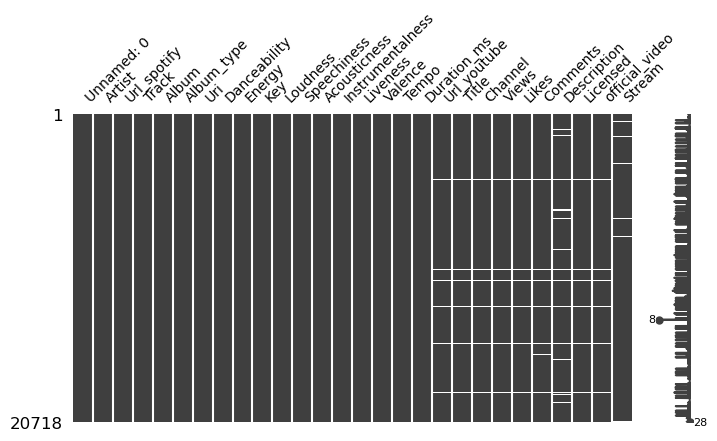

In [45]:
# Matrix visualization, eksik verilerin nerelerde olduğunu görmek için kullandım.
msno.matrix(df_spotify, figsize=(8, 4), fontsize=10)
plt.show()

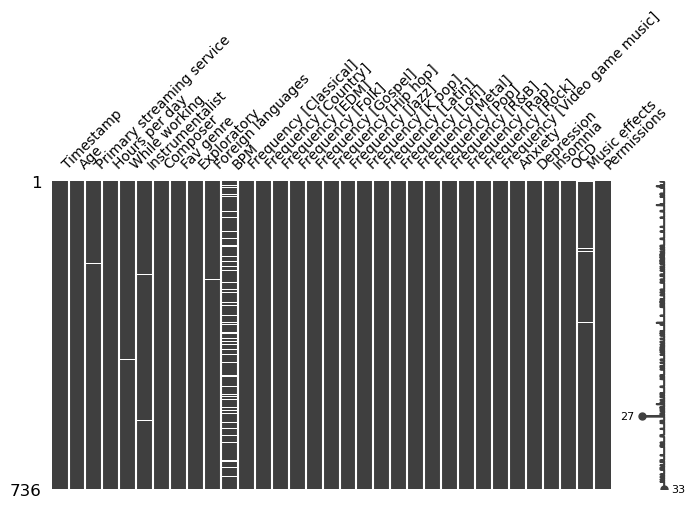

In [46]:
# Matrix visualization, eksik verilerin nerelerde olduğunu görmek için kullandım.
msno.matrix(df_music, figsize=(8, 4), fontsize=10)
plt.show()

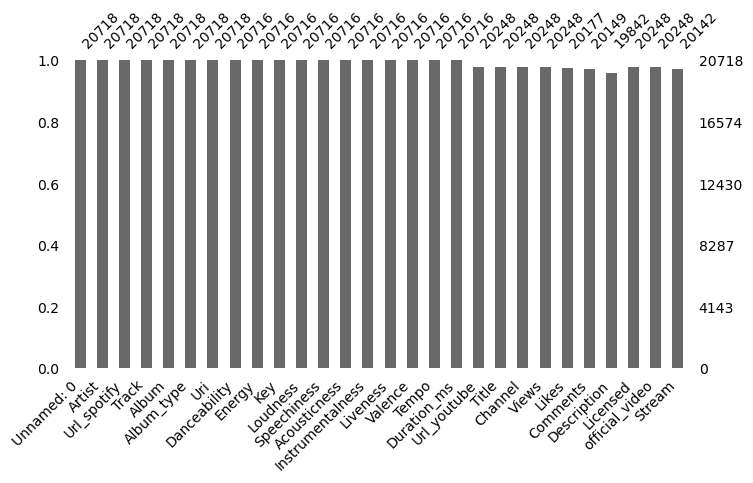

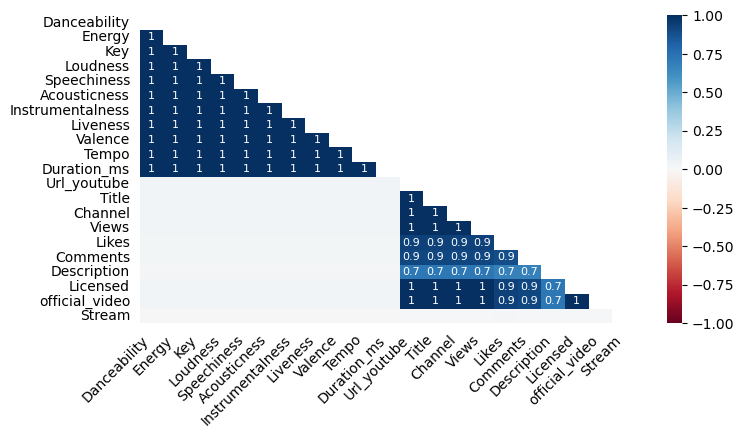

In [47]:
# Bar chart of missing data
msno.bar(df_spotify, figsize=(8, 4), fontsize=10)
plt.show()

# Heatmap to show correlation of missing data
# Nullity Correlation (Heatmap)
# 1'e ne kadar yakınsa, ilişki ihtimali o kadar yüksek.
# 0 ise, birbirlerini etkileyen bir durum yoktur.
msno.heatmap(df_spotify, figsize=(8, 4), fontsize=10)
plt.show()

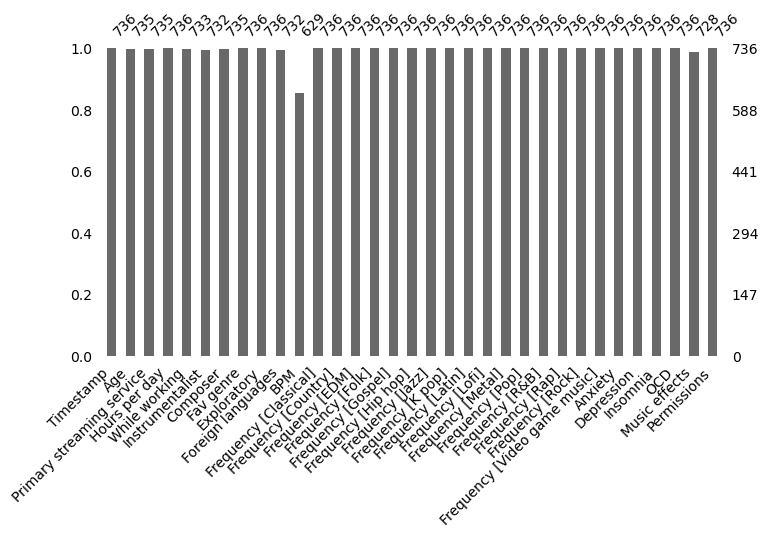

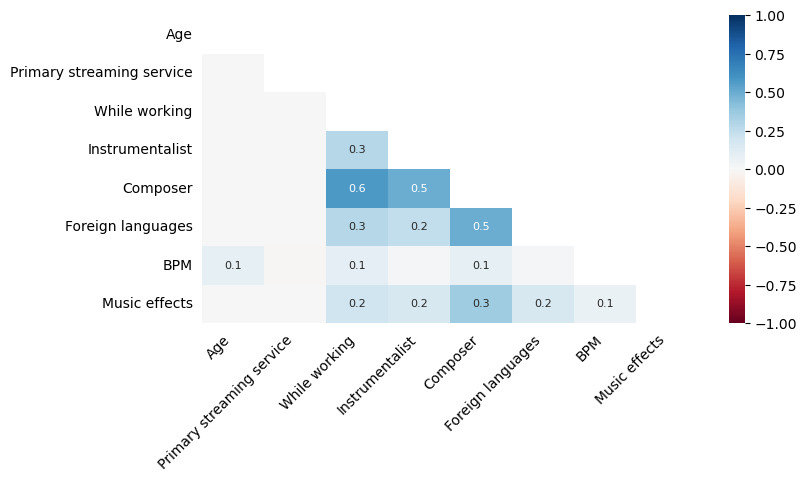

In [48]:
# Bar chart of missing data
msno.bar(df_music, figsize=(8, 4), fontsize=10)
plt.show()

# Heatmap to show correlation of missing data
msno.heatmap(df_music, figsize=(8, 4), fontsize=10)
plt.show()

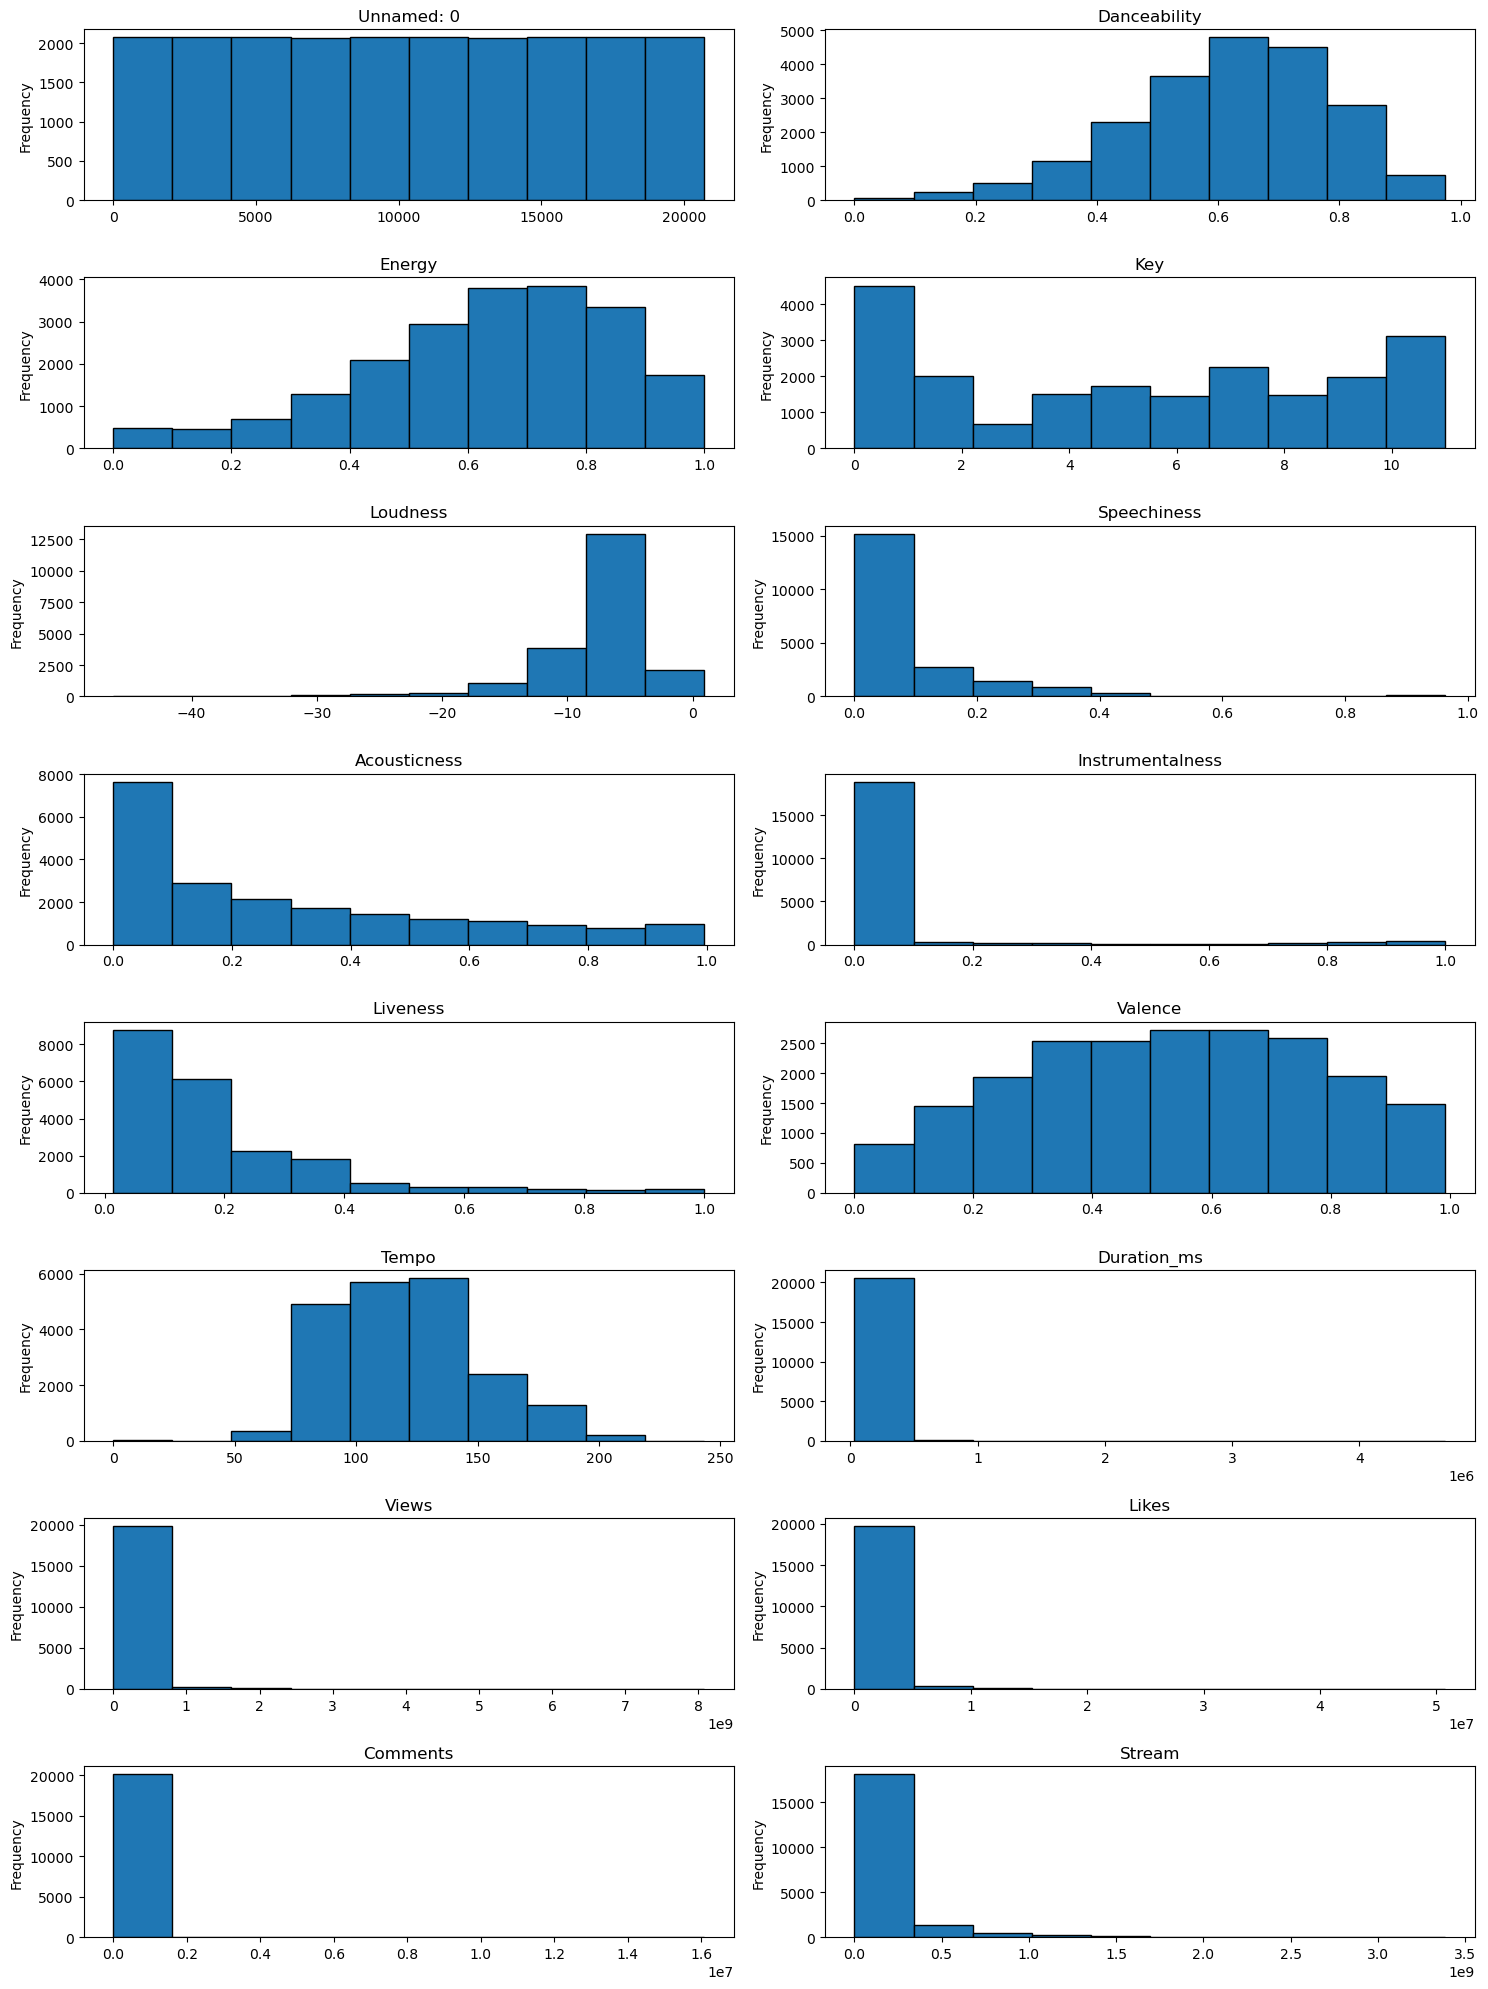

In [49]:
# Subplot yaratmak için sütun sayısını alıyoruz
columns = df_spotify.select_dtypes(include=['float64', 'int64']).columns  # Sadece sayısal kolonlar

# Subplot oluşturma
fig, axes = plt.subplots(len(columns) // 2 + len(columns) % 2, 2, figsize=(15, 20))  # 2 kolonlu düzen
axes = axes.flatten()  # Kolay iterasyon için flatten

# Her bir sayısal sütunu histogram olarak çizme
for i, col in enumerate(columns):
    df_spotify[col].plot(
        kind='hist',
        edgecolor='black',
        ax=axes[i],
        title=col
    )

# Kullanılmayan eksenleri gizleme
for j in range(len(columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

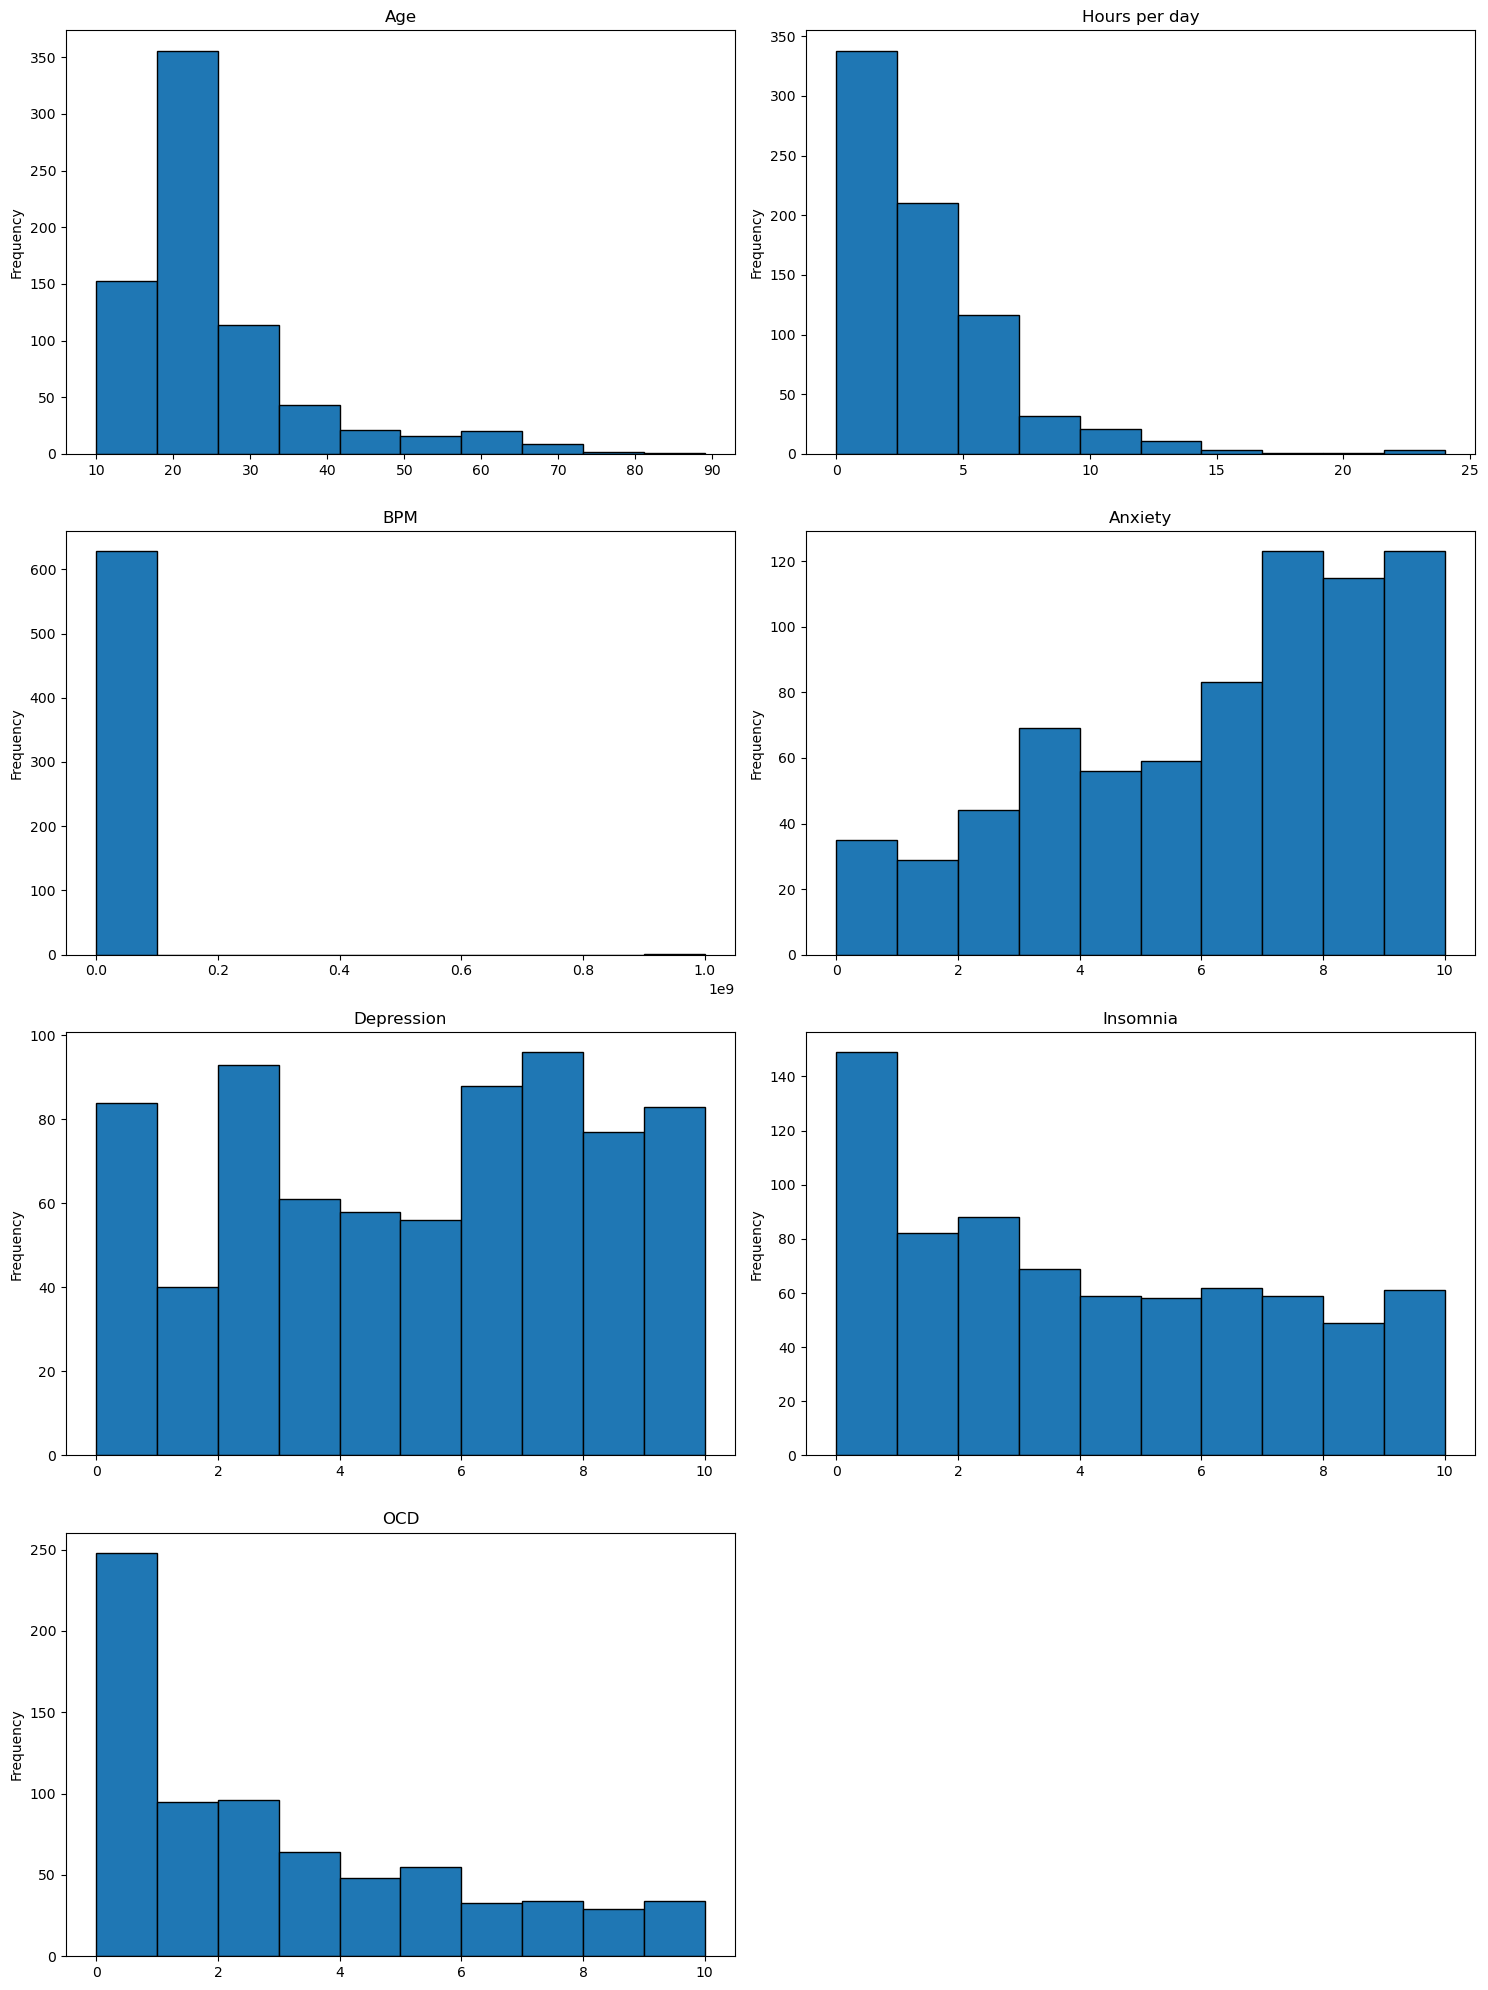

In [50]:
# Subplot yaratmak için sütun sayısını alıyoruz
columns = df_music.select_dtypes(include=['float64', 'int64']).columns  # Sadece sayısal kolonlar

# Subplot oluşturma
fig, axes = plt.subplots(len(columns) // 2 + len(columns) % 2, 2, figsize=(15, 20))  # 2 kolonlu düzen
axes = axes.flatten()  # Kolay iterasyon için flatten

# Her bir sayısal sütunu histogram olarak çizme
for i, col in enumerate(columns):
    df_music[col].plot(
        kind='hist',
        edgecolor='black',
        ax=axes[i],
        title=col
    )

# Kullanılmayan eksenleri gizleme
for j in range(len(columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [51]:
df_fillna = df_spotify.copy()
df_fillna.head(3)

Unnamed: 0    Artist                                        Url_spotify  \
0           0  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1           1  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2           2  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   

                                           Track  \
0                                 Feel Good Inc.   
1                                Rhinestone Eyes   
2  New Gold (feat. Tame Impala and Bootie Brown)   

                                           Album Album_type  \
0                                     Demon Days      album   
1                                  Plastic Beach      album   
2  New Gold (feat. Tame Impala and Bootie Brown)     single   

                                    Uri  Danceability  Energy  Key  ...  \
0  spotify:track:0d28khcov6AiegSCpG5TuT         0.818   0.705  6.0  ...   
1  spotify:track:1foMv2HQwfQ2vntFf9HFeG         0.676   0.703  8.0  ...   
2  spotify:track:64dLd6rVqDLtkXFYrEUHIU         0.695   0.923  1.0  ...   

                                   Url_youtube  \
0  https://www.youtube.com/watch?v=HyHNuVaZJ-k   
1  https://www.youtube.com/watch?v=yYDmaexVHic   
2  https://www.youtube.com/watch?v=qJa-VFwPpYA   

                                               Title   Channel        Views  \
0         Gorillaz - Feel Good Inc. (Official Video)  Gorillaz  693555221.0   
1  Gorillaz - Rhinestone Eyes [Storyboard Film] (...  Gorillaz   72011645.0   
2  Gorillaz - New Gold ft. Tame Impala & Bootie B...  Gorillaz    8435055.0   

       Likes  Comments                                        Description  \
0  6220896.0  169907.0  Official HD Video for Gorillaz' fantastic trac...   
1  1079128.0   31003.0  The official video for Gorillaz - Rhinestone E...   
2   282142.0    7399.0  Gorillaz - New Gold ft. Tame Impala & Bootie B...   

   Licensed official_video        Stream  
0      True           True  1.040235e+09  
1      True           True  3.100837e+08  
2      True           True  6.306347e+07  

[3 rows x 28 columns]

In [52]:
df_fillna.isna().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [53]:
# Sütun adlarını kontrol edin
df_fillna.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

C:\Users\sseli\AppData\Local\Temp\ipykernel_1448\87201832.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mean_filled_df_spotify[categorical_column] = mean_filled_df_spotify[categorical_column].fillna(mean_filled_df_spotify[categorical_column].mode()[0])


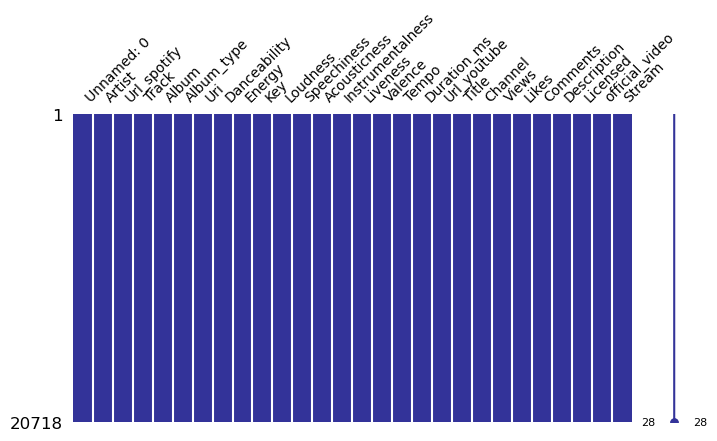

In [54]:
# Veri setinin kopyasını alıyoruz
mean_filled_df_spotify = df_spotify.copy()

# Sayısal sütunları seçiyoruz
numeric_columns = mean_filled_df_spotify.select_dtypes(include=['number']).columns

# Eksik değerleri sayısal sütunların ortalamaları ile dolduruyoruz
mean_filled_df_spotify[numeric_columns] = mean_filled_df_spotify[numeric_columns].fillna(mean_filled_df_spotify[numeric_columns].mean())

# Kategorik sütunları seçiyoruz
categorical_columns = mean_filled_df_spotify.select_dtypes(include=['object']).columns

# Kategorik sütunlardaki eksik değerleri mod ile dolduruyoruz
for categorical_column in categorical_columns:
    if mean_filled_df_spotify[categorical_column].isnull().sum() > 0:
        mean_filled_df_spotify[categorical_column] = mean_filled_df_spotify[categorical_column].fillna(mean_filled_df_spotify[categorical_column].mode()[0])

# Eksik değerlerin görselleştirilmesi
msno.matrix(mean_filled_df_spotify, figsize=(8, 4), fontsize=10, color=[0.2, 0.2, 0.6])
plt.show()

In [55]:
# Eksik değerlerin kontrolü
print(mean_filled_df_spotify.isna().sum())

Unnamed: 0          0
Artist              0
Url_spotify         0
Track               0
Album               0
Album_type          0
Uri                 0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Url_youtube         0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Description         0
Licensed            0
official_video      0
Stream              0
dtype: int64


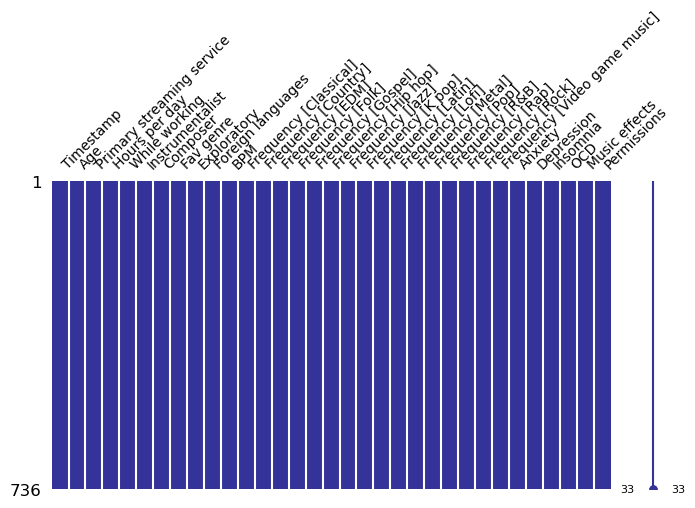

In [56]:
# Veri setinin kopyasını alıyoruz
mean_filled_df_music = df_music.copy()

# Sayısal sütunları seçiyoruz
numeric_columns = mean_filled_df_music.select_dtypes(include=['number']).columns

# Eksik değerleri sayısal sütunların ortalamaları ile dolduruyoruz
mean_filled_df_music[numeric_columns] = mean_filled_df_music[numeric_columns].fillna(mean_filled_df_music[numeric_columns].mean())

# Kategorik sütunları seçiyoruz
categorical_columns = mean_filled_df_music.select_dtypes(include=['object']).columns

# Kategorik sütunlardaki eksik değerleri mod ile dolduruyoruz
for categorical_column in categorical_columns:
    if mean_filled_df_music[categorical_column].isnull().sum() > 0:
        mean_filled_df_music[categorical_column] = mean_filled_df_music[categorical_column].fillna(mean_filled_df_music[categorical_column].mode()[0])

# Eksik değerlerin görselleştirilmesi
msno.matrix(mean_filled_df_music, figsize=(8, 4), fontsize=10, color=[0.2, 0.2, 0.6])
plt.show()

In [57]:
# Eksik değerlerin kontrolü
print(mean_filled_df_music.isna().sum())

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

3. SPOTİFY VERİLERİ ANALİZ

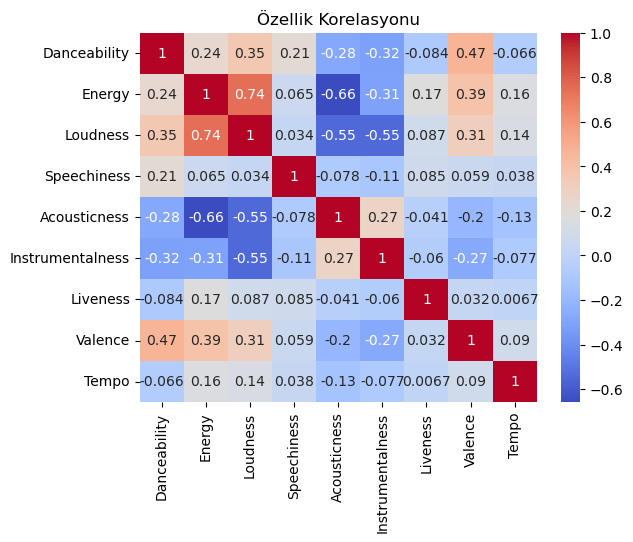

In [59]:
# Verisetinde korelasyon analizi yapmak için belirli özellikleri seçiyoruz
correlation_matrix = df_spotify[['Danceability', 'Energy', 'Loudness', 'Speechiness', 
                         'Acousticness', 'Instrumentalness', 'Liveness', 
                         'Valence', 'Tempo']].corr()

# Korelasyon matrisini görselleştirmek için bir ısı haritası oluşturuyoruz
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# Grafiğe bir başlık ekliyoruz
plt.title("Özellik Korelasyonu")
plt.show()

Oluşan ısı haritasına göre Tempo ve Danceability arasında güçlü bir pozitif korelasyon gözlemledik.

Popülerlik ve Müzikal Özellikler:

Hangi tür şarkılar daha popüler?:

Text(0, 0.5, 'Ortalama Akışlar')

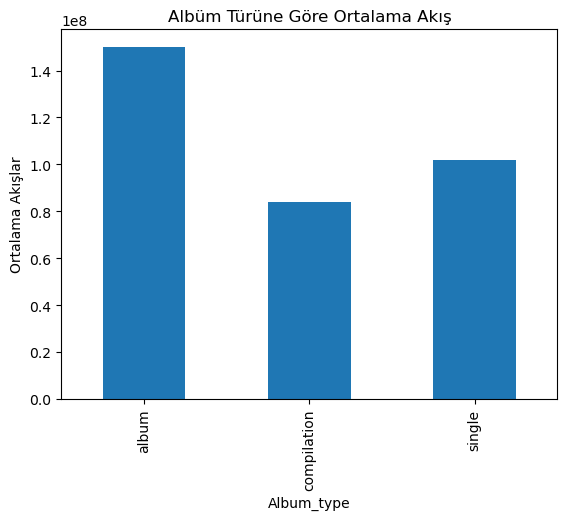

In [63]:
# Verisetini 'Album_type' sütununa göre gruplandırıp, 'Stream' sütununun ortalama değerlerini hesaplıyoruz
 # Ortalama stream değerlerini çubuk grafik olarak çiziyoruz
df_spotify.groupby('Album_type')['Stream'].mean().plot(kind='bar')

# Grafiğe bir başlık ekliyoruz
plt.title("Albüm Türüne Göre Ortalama Akış")
plt.ylabel("Ortalama Akışlar")

Buradan albümlerin daha çok akışta olduğunu görüyoruz.

Spotify platformunda şarkıları en çok beğeni alan ilk 10 sanatçıya bakalım.

In [65]:
#"Sanatçı" sütununu dizin olarak yapma
df_artist = df_spotify.set_index("Artist")
df_artist = df_artist[["Danceability","Views","Likes","Album_type"]]

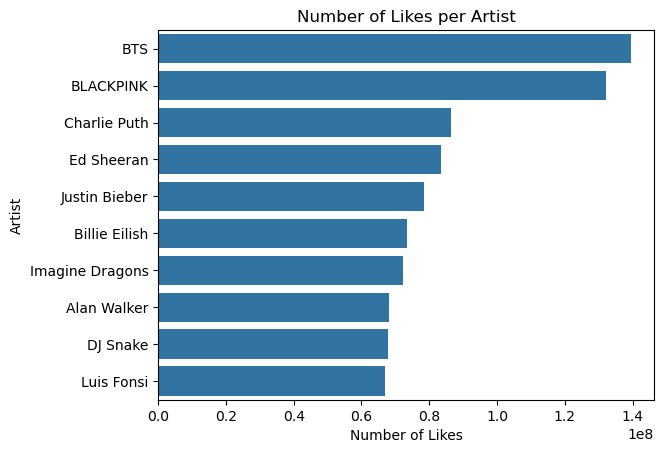

In [66]:
#Verileri sanatçıya göre gruplayın ve ortalama dans edilebilirlik puanını hesaplayın
df_artist_grouped = df_artist.groupby('Artist')['Likes'].sum().reset_index()

#Veriyi dans edilebilirlik puanına göre azalan sırada sıralayın
df_artist_sorted = df_artist_grouped.sort_values(by='Likes', ascending=False)

# Dans edilebilirlik puanı en yüksek olan ilk 10 sanatçıyı seçin
top_10_artists = df_artist_sorted.head(10)

# Seaborn'u kullanarak yatay çubuk grafiği oluşturma
sns.barplot(x='Likes', y='Artist', data=top_10_artists)

# Eksen etiketlerini ve başlığını ayarlayın
plt.xlabel('Number of Likes')
plt.ylabel('Artist')
plt.title('Number of Likes per Artist')

plt.show()

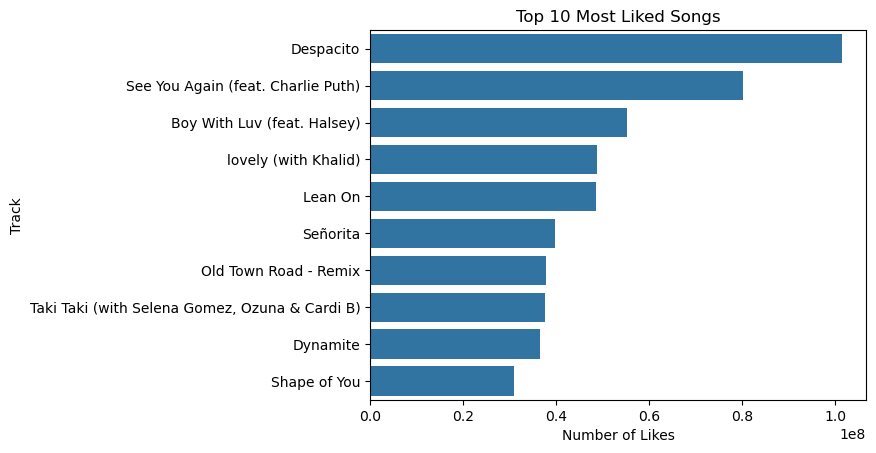

In [67]:
# Şarkıları beğeni sayısına göre gruplayın ve toplam beğeni sayısını hesaplayın
df_song_grouped = df_spotify.groupby('Track')['Likes'].sum().reset_index()

# Veriyi beğeni sayısına göre azalan sırada sıralayın
df_song_sorted = df_song_grouped.sort_values(by='Likes', ascending=False)

# En çok beğenilen 10 şarkıyı seçin
top_10_songs = df_song_sorted.head(10)

# Seaborn'u kullanarak yatay çubuk grafiği oluşturma
sns.barplot(x='Likes', y='Track', data=top_10_songs)

# Eksen etiketlerini ve başlığını ayarlayın
plt.xlabel('Number of Likes')
plt.ylabel('Track')
plt.title('Top 10 Most Liked Songs')

plt.show()

In [68]:
# İlk 10 şarkıyı yazdırma
top_10_songs[['Track', 'Likes']]

Track        Likes
3713                                        Despacito  101577278.0
12997              See You Again (feat. Charlie Puth)   80295292.0
2153                      Boy With Luv (feat. Halsey)   55176413.0
17549                            lovely (with Khalid)   48852042.0
8332                                          Lean On   48633206.0
13132                                        Señorita   39692236.0
10871                           Old Town Road - Remix   37889373.0
14413  Taki Taki (with Selena Gomez, Ozuna & Cardi B)   37552053.0
4200                                         Dynamite   36609928.0
13160                                    Shape of You   31047780.0

4. Youtube Verileri Analiz

Görüntülenme, Beğeni ve Yorum Analizi

Hangi videolar en çok izlenmiş?

In [71]:
# En çok görüntüleme alan ilk 10 videoyu seçiyoruz
  # 'Views' sütununa göre azalan sırada sıralayıp ilk 10 videoyu alıyoruz
top_videos = df_spotify.sort_values(by='Views', ascending=False).head(10)

In [72]:
# En popüler videoların başlığını, kanalını ve görüntüleme sayılarını yazdırıyoruz
top_videos[['Title', 'Channel', 'Views']].T

1147   \
Title    Luis Fonsi - Despacito ft. Daddy Yankee   
Channel                            LuisFonsiVEVO   
Views                               8079649362.0   

                                           365    \
Title    Luis Fonsi - Despacito ft. Daddy Yankee   
Channel                            LuisFonsiVEVO   
Views                               8079646911.0   

                                                    12452  \
Title    Ed Sheeran - Shape of You (Official Music Video)   
Channel                                        Ed Sheeran   
Views                                        5908398479.0   

                                                     14580  \
Title    Wiz Khalifa - See You Again ft. Charlie Puth [...   
Channel                                  Wiz Khalifa Music   
Views                                         5773798407.0   

                                                     12469  \
Title    Wiz Khalifa - See You Again ft. Charlie Puth [...   
Channel                                  Wiz Khalifa Music   
Views                                         5773797147.0   

                                                     20303  \
Title    Wheels on the Bus | CoComelon Nursery Rhymes &...   
Channel                         Cocomelon - Nursery Rhymes   
Views                                         4898831101.0   

                                                     10686  \
Title    Mark Ronson - Uptown Funk (Official Video) ft....   
Channel                                     MarkRonsonVEVO   
Views                                         4821016218.0   

                                  8937   \
Title    PSY - GANGNAM STYLE(강남스타일) M/V   
Channel                     officialpsy   
Views                      4679767471.0   

                                           9569                          13032  
Title    Maroon 5 - Sugar (Official Music Video)  Katy Perry - Roar (Official)  
Channel                              Maroon5VEVO                 KatyPerryVEVO  
Views                               3817733132.0                  3725748519.0

<Axes: xlabel='Views', ylabel='Likes'>

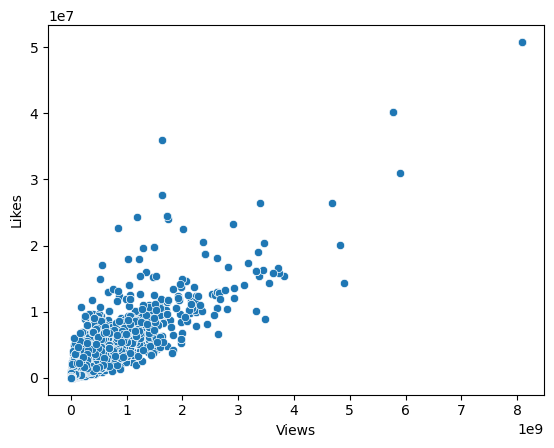

In [73]:
# 'Views' ve 'Likes' arasındaki ilişkiyi görselleştiren bir scatterplot (dağılım) grafiği oluşturuyoruz
sns.scatterplot(data=df_spotify, x='Views', y='Likes')

Kanal Performansı:

En yüksek görüntülenme ortalamasına sahip kanallar:

In [75]:
# 'Channel' sütununa göre gruplama yaparak her kanalın ortalama görüntülenme sayısını hesaplıyoruz
# Hesaplanan ortalamaları azalan sırayla sıralayıp ilk 10 kanalın ortalama görüntülenme sayısını alıyoruz
df_spotify.groupby('Channel')['Views'].mean().sort_values(ascending=False).head(10)

Channel
Wiz Khalifa Music             3.962261e+09
LuisFonsiVEVO                 3.100360e+09
T-Series Bhakti Sagar         1.550413e+09
Cocomelon - Nursery Rhymes    1.460167e+09
RahatFAKhanVEVO               1.415112e+09
capoVEVO                      1.395119e+09
Major Lazer Official          1.384308e+09
KatyPerryVEVO                 1.247680e+09
Jack Ü                        1.234561e+09
6ix9ineVEVO                   1.199610e+09
Name: Views, dtype: float64

5.Spotify ve YouTube Verilerinin Karşılaştırılması

Dinlenme ve Görüntülenme İlişkisi:

In [78]:
# Şarkıları sanatçıya ve görüntülemelere göre gruplayalım izlenme - youtube, akış - spotify
artist_grouped = df_spotify.groupby('Artist')[['Views', 'Stream']].sum()

# Sanatçıları görüntüleme ve akışların toplamına göre azalan düzende sıralayalım
artist_sorted = artist_grouped.sort_values(['Views', 'Stream'], ascending=False)

# YouTube'da en çok izlenen ve Spotify'da dinlenen ilk 10 sanatçıyı öğrenelim
top_10 = artist_sorted.head(10)

top_10

Views        Stream
Artist                                             
Ed Sheeran               1.546021e+10  1.439488e+10
CoComelon                1.460167e+10  3.690822e+08
Katy Perry               1.312063e+10  6.607329e+09
Charlie Puth             1.216759e+10  7.041187e+09
Luis Fonsi               1.162811e+10  5.054326e+09
Justin Bieber            1.099106e+10  1.209777e+10
Daddy Yankee             1.087193e+10  5.135462e+09
Bruno Mars               1.024092e+10  1.089786e+10
Macklemore & Ryan Lewis  1.012206e+10  3.982978e+09
Coldplay                 9.997278e+09  1.177848e+10

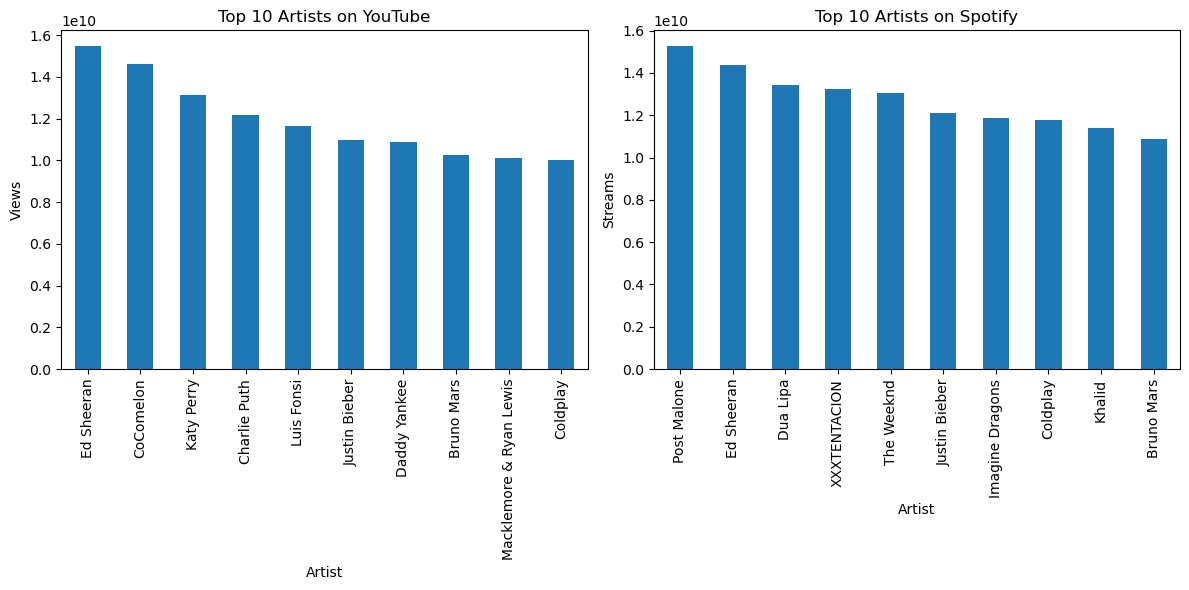

In [79]:
# İzlenme ve akışlar için iki ayrı DataFrame oluşturalım
df_views = df_spotify.groupby('Artist')['Views'].sum().sort_values(ascending=False)[:10]
df_streams = df_spotify.groupby('Artist')['Stream'].sum().sort_values(ascending=False)[:10]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# ilk 10 yt
ax1.set_title('Top 10 Artists on YouTube')
df_views.plot(kind='bar', ax=ax1)

# ilk 10 spotify
ax2.set_title('Top 10 Artists on Spotify')
df_streams.plot(kind='bar', ax=ax2)

ax1.set_xlabel('Artist')
ax1.set_ylabel('Views')
ax2.set_xlabel('Artist')
ax2.set_ylabel('Streams')
fig.tight_layout()
plt.show()

Ed Sheeran, youtube'da 15 milyara yakın izlenme ile en çok izlenen sanatçı oldu. 
CoComelon ve Katy Perry sırasıyla 14 milyar ve 13 milyar izlenme ile ikinci ve üçüncü en çok izlenen sanatçılardır. 
Charlie Puth ve Luis Fonsi sırasıyla 12 milyar ve 11 milyar izlenmeyle ilk beşte yer alıyor.

Spotify'da Post Malone 15 milyar ile en çok dinlenen sanatçı oldu. 
İkinci sırada yaklaşık 14 milyar dinlenme ile Ed Sheeran var. 
Dua Lipa ve XXXTENTACION sırasıyla 13,5 milyar ve 13 milyar ile en çok dinlenen üçüncü ve dördüncü sanatçılar.
The Weeknd 13 milyar dinlenmeyle beşinci sırada yer alıyor.

Bu rakamlar, bu sanatçıların ve müziklerinin farklı çevrimiçi platformlardaki popülerliğini vurguluyor.

En Popüler Şarkıların İki Platformdaki Durumu:

In [82]:
# Spotify ve YouTube için en popüler 10 şarkıyı ve videoyu alıyoruz
top_spotify = df_spotify.sort_values(by="Stream", ascending=False).head(10)[['Artist', 'Track', 'Stream']]
top_youtube = df_spotify.sort_values(by="Views", ascending=False).head(10)[['Artist', 'Title', 'Views']]

# Platform adını ekliyoruz
top_spotify['Platform'] = 'Spotify'
top_youtube['Platform'] = 'YouTube'

# İki tabloyu birleştiriyoruz
top_combined = pd.concat([top_spotify, top_youtube], ignore_index=True)

# Eksik değerleri '-' ile dolduruyoruz
top_combined = top_combined.fillna('-')

# Metinleri biraz kısaltabiliriz, uzun oldukları için
top_combined['Track'] = top_combined['Track'].apply(lambda x: x[:20] if len(x) > 20 else x)
top_combined['Title'] = top_combined['Title'].apply(lambda x: x[:20] if len(x) > 20 else x)

# tabulate ile tabloyu yazdırıyoruz
print(tabulate(top_combined, headers='keys', tablefmt='pipe', showindex=False, numalign="center", stralign="center"))


|      Artist      |        Track         |    Stream    |  Platform  |        Title         |    Views     |
|:----------------:|:--------------------:|:------------:|:----------:|:--------------------:|:------------:|
|    The Weeknd    |   Blinding Lights    | 3386520288.0 |  Spotify   |          -           |      -       |
|    Ed Sheeran    |     Shape of You     | 3362005201.0 |  Spotify   |          -           |      -       |
|  Lewis Capaldi   |  Someone You Loved   | 2634013335.0 |  Spotify   |          -           |      -       |
|   Post Malone    | rockstar (feat. 21 S | 2594926619.0 |  Spotify   |          -           |      -       |
|     Swae Lee     | Sunflower - Spider-M | 2538329799.0 |  Spotify   |          -           |      -       |
|   Post Malone    | Sunflower - Spider-M | 2538329799.0 |  Spotify   |          -           |      -       |
|      Drake       |      One Dance       | 2522431995.0 |  Spotify   |          -           |      -       |
| The Chai

In [83]:
# İzlenme sayısına göre en iyi 10 şarkı
top10_views = df_spotify.nlargest(10, 'Views')

# Yorum sayısına göre en iyi 10 şarkı
top10_comments = df_spotify.nlargest(10, 'Comments')

# Beğenme sayısına göre en iyi 10 şarkı
top10_likes = df_spotify.nlargest(10, 'Likes')

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_i

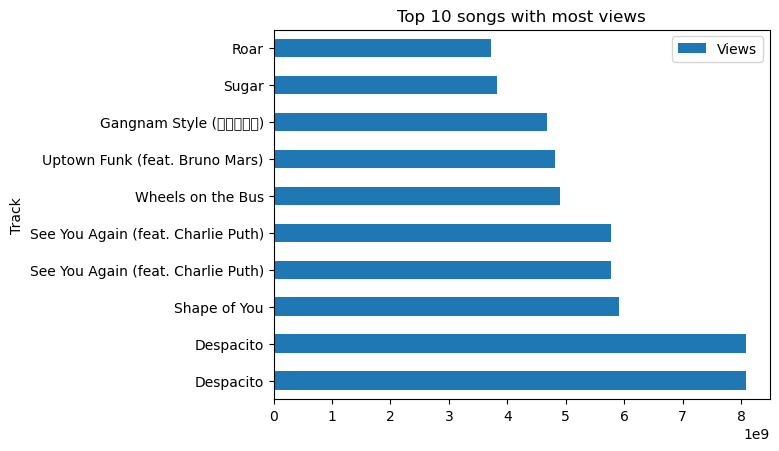

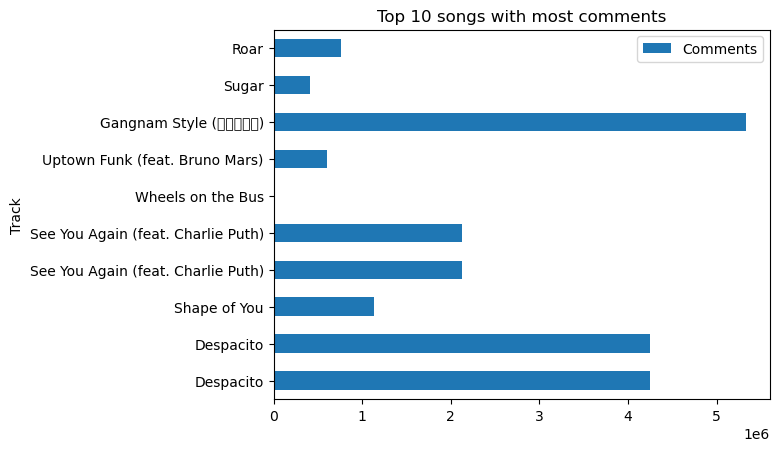

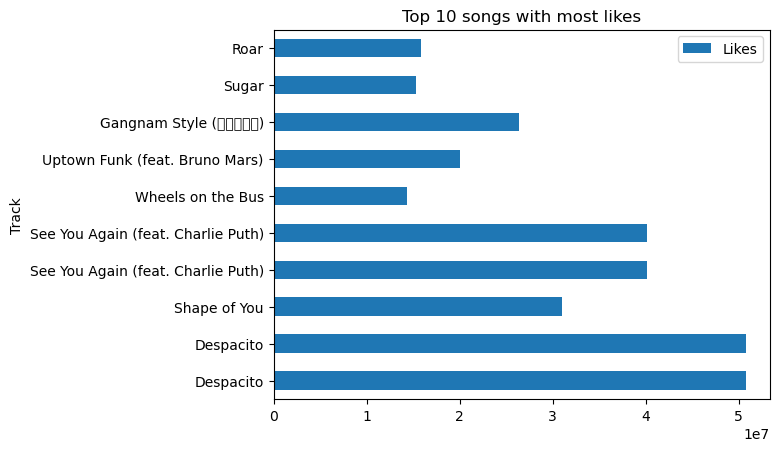

In [84]:
# En çok izlenen ilk 10 şarkı
top10_views.plot(kind='barh', x='Track', y='Views', title='Top 10 songs with most views')

# En çok yorum alan ilk 10 şarkı
top10_views.plot(kind='barh', x='Track', y='Comments', title='Top 10 songs with most comments')

# En çok beğeni alan ilk 10 şarkı
top10_views.plot(kind='barh', x='Track', y='Likes', title='Top 10 songs with most likes')
plt.show()

Görüldüğü gibi Despacito en çok beğenilen, izlenen ve yorumlanan müzik olup 80 milyon kişi tarafından beğenilmiş ve 50 milyon kişi tarafından beğenilmiştir.

İki platformdaki ortak şarkıları bulur ve listeler:

In [87]:
# Ortak şarkıları bulma ve Stream ile Views arasında karşılaştırma yapma
common_songs = df_spotify[df_spotify['Track'] == df_spotify['Title']]

#NaN Değerlerini Kaldırma: dropna() ile Stream ve Views değerlerinden NaN (eksik) olanları kaldırıyoruz. 
#Bu işlem, karşılaştırmaların doğru yapılabilmesi için önemlidir.
common_songs = common_songs.dropna(subset=['Stream', 'Views'])

# Platform karşılaştırması yapıyoruz
common_songs['Platform'] = common_songs.apply(
    lambda row: 'Spotify' if row['Stream'] > row['Views'] else 'YouTube' if row['Stream'] < row['Views'] else 'Equal',
    axis=1)

# Sonuçları yazdırma
common_songs[['Artist', 'Track', 'Stream', 'Views', 'Platform']]

Artist                           Track       Stream  \
42              Coldplay                          Sparks  475353044.0   
74             Radiohead         Exit Music (For A Film)  146857863.0   
138    Pharrell Williams               Just A Cloud Away  105629259.0   
334           Kanye West   Father Stretch My Hands Pt. 1  627167330.0   
336           Kanye West                        I Wonder  302891517.0   
...                  ...                             ...          ...   
20713        SICK LEGEND            JUST DANCE HARDSTYLE    9227144.0   
20714        SICK LEGEND  SET FIRE TO THE RAIN HARDSTYLE   10898176.0   
20715        SICK LEGEND       OUTSIDE HARDSTYLE SPED UP    6226110.0   
20716        SICK LEGEND             ONLY GIRL HARDSTYLE    6873961.0   
20717        SICK LEGEND              MISS YOU HARDSTYLE    5695584.0   

            Views Platform  
42     73201019.0  Spotify  
74     10644157.0  Spotify  
138     2672481.0  Spotify  
334    47207589.0  Spotify  
336    13652003.0  Spotify  
...           ...      ...  
20713     71678.0  Spotify  
20714    164741.0  Spotify  
20715     35646.0  Spotify  
20716      6533.0  Spotify  
20717    158697.0  Spotify  

[582 rows x 5 columns]

Bu tabloda iki platformda da aynı şarkıların stream ve views değerleri vardır. Son kolonda ise her bir şarkının Stream ve Views değerlerini karşılaştırıyoruz. Eğer Stream sayısı büyükse, şarkı Spotify'da daha fazla izlenmiş olarak etiketleniyor. Eğer Views sayısı büyükse, şarkı YouTube'da daha fazla izlenmiş olarak etiketleniyor. Eğer her ikisi eşitse, "Equal" olarak işaretleniyor.

In [89]:
# Spotify'daki en popüler 10 şarkıyı seçiyoruz
spotify_top = df_spotify.nlargest(10, "Stream")[['Artist', 'Track', 'Stream']]
spotify_top['Platform'] = 'Spotify'

# YouTube'daki en popüler 10 videoyu seçiyoruz
youtube_top = df_spotify.nlargest(10, "Views")[['Artist', 'Title', 'Views']]
youtube_top['Platform'] = 'YouTube'

# Tabloları birleştiriyoruz
combined_top = pd.concat([spotify_top, youtube_top], ignore_index=True)

# Eksik alanları '-' ile dolduruyoruz
combined_top.fillna('-', inplace=True)

# Son tabloyu yazdırıyoruz
print(combined_top.to_markdown(index=False))


| Artist           | Track                                         | Stream       | Platform   | Title                                                                              | Views        |
|:-----------------|:----------------------------------------------|:-------------|:-----------|:-----------------------------------------------------------------------------------|:-------------|
| The Weeknd       | Blinding Lights                               | 3386520288.0 | Spotify    | -                                                                                  | -            |
| Ed Sheeran       | Shape of You                                  | 3362005201.0 | Spotify    | -                                                                                  | -            |
| Lewis Capaldi    | Someone You Loved                             | 2634013335.0 | Spotify    | -                                                                                  | -            |
| Post Malone  

C:\Users\sseli\AppData\Local\Temp\ipykernel_1448\1789082015.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  combined_top.fillna('-', inplace=True)


In [90]:
# İzlenme sayısına göre ilk 10 şarkıyı seçiyoruz
top10_views = df_spotify.sort_values('Views', ascending=False).head(10)

# Yorum sayısına göre ilk 10 şarkıyı seçiyoruz
top10_comments = df_spotify.sort_values('Comments', ascending=False).head(10)

# Beğenme sayısına göre ilk 10 şarkıyı seçiyoruz
top10_likes = df_spotify.sort_values('Likes', ascending=False).head(10)

C:\Users\sseli\AppData\Local\Temp\ipykernel_1448\1414398108.py:17: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sseli\AppData\Local\Temp\ipykernel_1448\1414398108.py:17: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sseli\AppData\Local\Temp\ipykernel_1448\1414398108.py:17: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sseli\AppData\Local\Temp\ipykernel_1448\1414398108.py:17: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sseli\AppData\Local\Temp\ipykernel_1448\1414398108.py:17: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing f

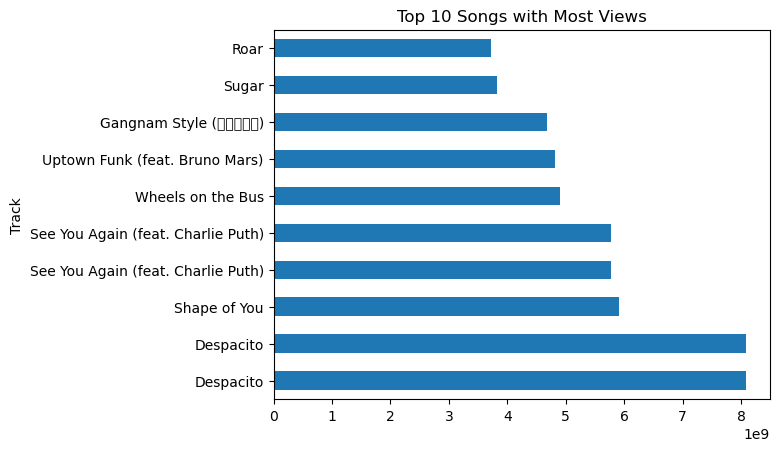

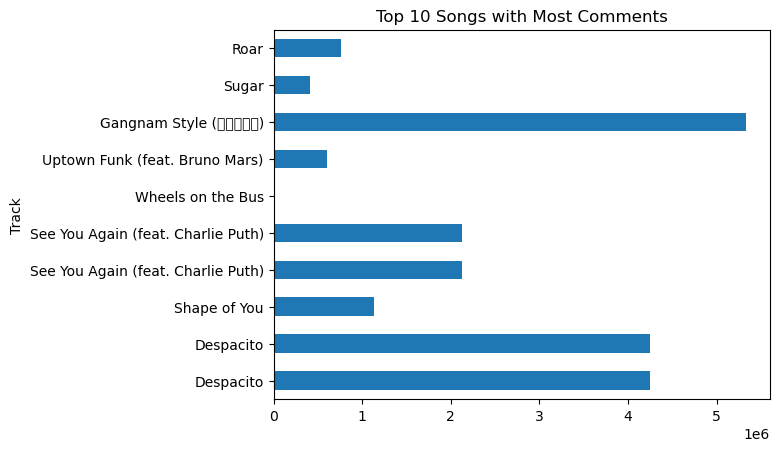

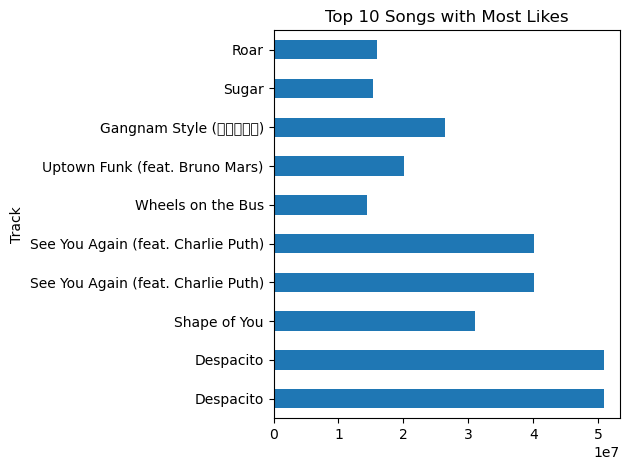

In [91]:
# En çok izlenen ilk 10 şarkı için yatay çubuk grafiği
top10_views[['Track', 'Views']].set_index('Track').plot.barh(
    legend=False, title='Top 10 Songs with Most Views'
)

# En çok yorum alan ilk 10 şarkı için yatay çubuk grafiği
top10_views[['Track', 'Comments']].set_index('Track').plot.barh(
    legend=False, title='Top 10 Songs with Most Comments'
)

# En çok beğeni alan ilk 10 şarkı için yatay çubuk grafiği
top10_views[['Track', 'Likes']].set_index('Track').plot.barh(
    legend=False, title='Top 10 Songs with Most Likes'
)

# Tüm grafikleri gösteriyoruz
plt.tight_layout()
plt.show()

In [92]:
# Ortak şarkıları bulma: Track ve Title sütunlarını karşılaştırıyoruz
common_songs = df_spotify[df_spotify['Track'] == df_spotify['Title']]

# NaN değerleri Stream ve Views sütunlarından kaldırıyoruz
common_songs = common_songs.dropna(subset=['Stream', 'Views'])

# Platform karşılaştırması yapıyoruz
common_songs['Platform'] = common_songs.apply(
    lambda row: 'Spotify' if row['Stream'] > row['Views'] else 'YouTube' if row['Stream'] < row['Views'] else 'Equal',
    axis=1
)

# Tabloyu stillendirerek gösterme
styled_table = common_songs[['Artist', 'Track', 'Stream', 'Views', 'Platform']].style.set_table_styles(
    [{'selector': 'th', 'props': [('font-weight', 'bold'), ('text-align', 'center')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}]
).highlight_max(subset=['Stream', 'Views'], color='lightgreen')

styled_table

Bu tablo, iki platformda da bulunan aynı şarkıları ve bu şarkıların Stream (Spotify) ile Views (YouTube) değerlerini içermektedir. Son sütunda, her şarkının Stream ve Views değerleri karşılaştırılarak bir değerlendirme yapılmıştır. Eğer Stream değeri daha büyükse şarkı "Spotify'da daha popüler" olarak etiketlenmiştir. Eğer Views değeri daha büyükse şarkı "YouTube'da daha popüler" olarak işaretlenmiştir. Her iki değer eşitse, şarkı "Equal" etiketiyle belirtilmiştir.

Şarkıları Enerji ve Dans Edilebilirlik temelinde analiz etme

In [95]:
top_songs = df_spotify.sort_values('Stream', ascending=False).head(10)
top_songs[['Track', 'Energy', 'Danceability', 'Acousticness']]

Track  Energy  Danceability  \
15250                                Blinding Lights   0.730         0.514   
12452                                   Shape of You   0.652         0.825   
19186                              Someone You Loved   0.405         0.501   
17937                     rockstar (feat. 21 Savage)   0.520         0.585   
17445  Sunflower - Spider-Man: Into the Spider-Verse   0.522         0.755   
17938  Sunflower - Spider-Man: Into the Spider-Verse   0.522         0.755   
13503                                      One Dance   0.625         0.792   
16099                                         Closer   0.524         0.748   
16028                                         Closer   0.524         0.748   
14030                                       Believer   0.780         0.776   

       Acousticness  
15250       0.00146  
12452       0.58100  
19186       0.75100  
17937       0.12400  
17445       0.53300  
17938       0.53300  
13503       0.00776  
16099       0.41400  
16028       0.41400  
14030       0.06220

Görselleştirme

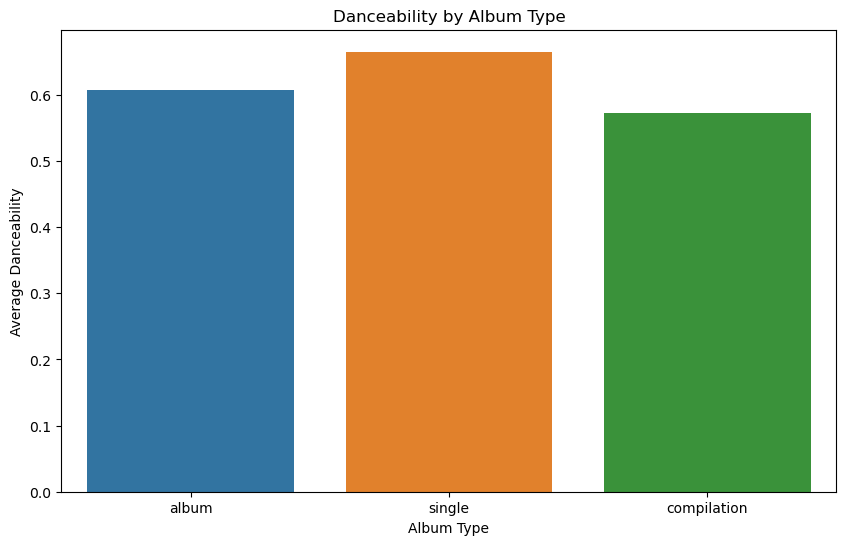

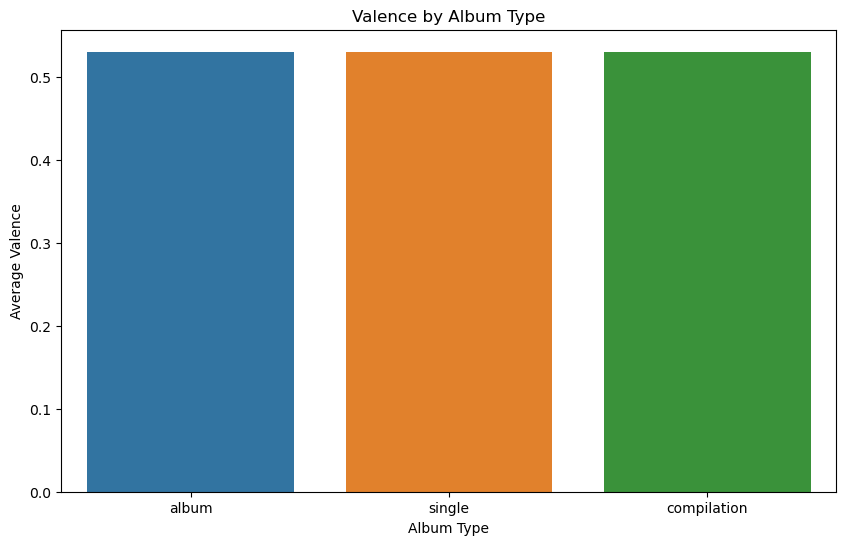

In [97]:
# Danceability by Album Type
plt.figure(figsize=(10, 6))  # Grafik boyutu ayarlanıyor
sns.barplot(data=df_spotify, x='Album_type', y='Danceability', errorbar=None, hue='Album_type', dodge=False)  # Danceability ortalamaları
plt.title("Danceability by Album Type")  # Başlık
plt.xlabel("Album Type")  # X ekseni adı
plt.ylabel("Average Danceability")  # Y ekseni adı
plt.legend([],[], frameon=False)  # Legend'ı kaldırır
plt.show()

# Valence by Album Type
plt.figure(figsize=(10, 6))  # Grafik boyutu ayarlanıyor
sns.barplot(data=df_spotify, x='Album_type', y='Valence', errorbar=None, hue='Album_type', dodge=False)  # Valence ortalamaları
plt.title("Valence by Album Type")  # Başlık
plt.xlabel("Album Type")  # X ekseni adı
plt.ylabel("Average Valence")  # Y ekseni adı
plt.legend([],[], frameon=False)  # Legend'ı kaldırır
plt.show()

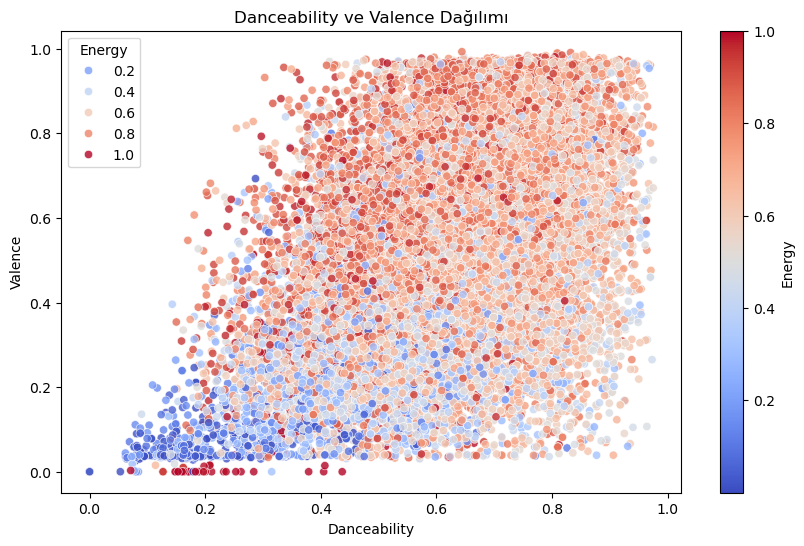

In [98]:
# Scatter Plot (Danceability vs Valence with Energy Hue)
plt.figure(figsize=(10, 6))  # Grafik boyutu ayarlanıyor
scatter = sns.scatterplot(
    x='Danceability', 
    y='Valence', 
    data=df_spotify, 
    hue='Energy', 
    palette='coolwarm', 
    alpha=0.8
)
plt.title("Danceability ve Valence Dağılımı")  # Başlık
plt.xlabel("Danceability")  # X ekseni adı
plt.ylabel("Valence")  # Y ekseni adı

# Colorbar Ekleme
norm = mpl.colors.Normalize(vmin=df_spotify['Energy'].min(), vmax=df_spotify['Energy'].max())  # Doğru argümanlar
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])

# Scatterplot ile uygun eksene colorbar eklenmesi
cbar = plt.colorbar(sm, ax=scatter.figure.axes[0])
cbar.set_label("Energy")  # Colorbar için etiket

plt.show()

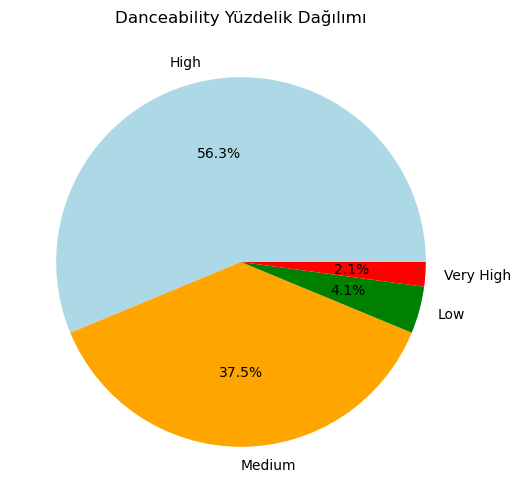

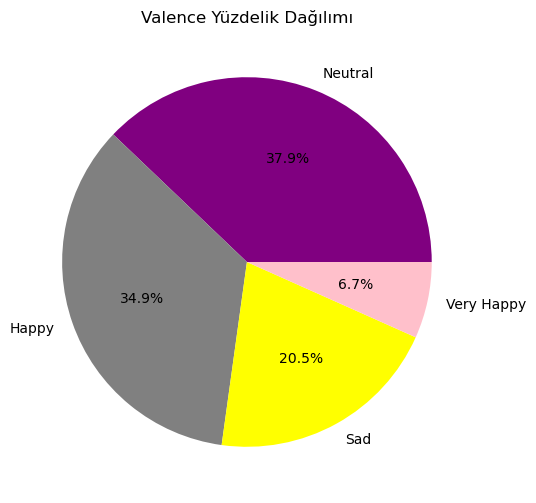

In [99]:
# Danceability Yüzdelik Dağılımı
danceability_bins = pd.cut(df_spotify['Danceability'], bins=[0, 0.3, 0.6, 0.9, 1.0], labels=['Low', 'Medium', 'High', 'Very High'])
danceability_percentage = danceability_bins.value_counts(normalize=True) * 100

# Pie Chart (Danceability)
danceability_percentage.plot.pie(autopct='%1.1f%%', colors=['lightblue', 'orange', 'green', 'red'], figsize=(6, 6))
plt.title('Danceability Yüzdelik Dağılımı')
plt.ylabel('')
plt.show()

# Valence Yüzdelik Dağılımı
valence_bins = pd.cut(df_spotify['Valence'], bins=[0, 0.3, 0.6, 0.9, 1.0], labels=['Sad', 'Neutral', 'Happy', 'Very Happy'])
valence_percentage = valence_bins.value_counts(normalize=True) * 100

# Pie Chart (Valence)
valence_percentage.plot.pie(autopct='%1.1f%%', colors=['purple', 'gray', 'yellow', 'pink'], figsize=(6, 6))
plt.title('Valence Yüzdelik Dağılımı')
plt.ylabel('')
plt.show()

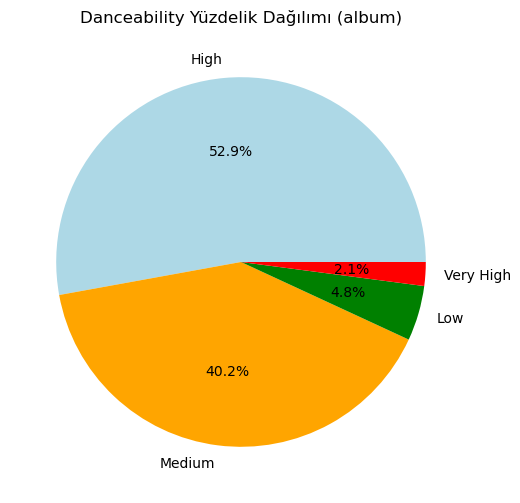

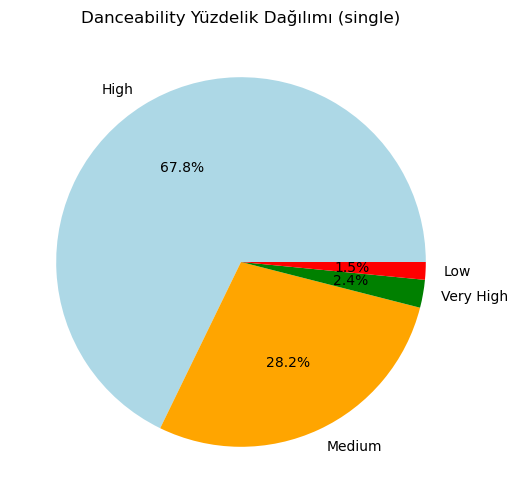

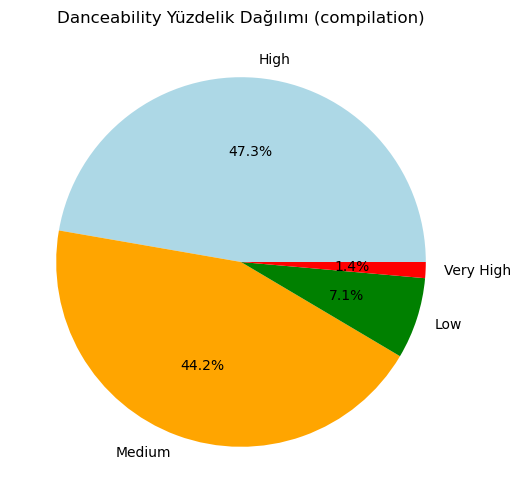

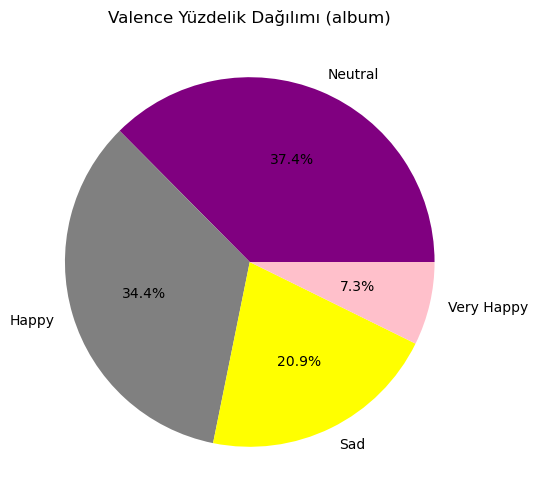

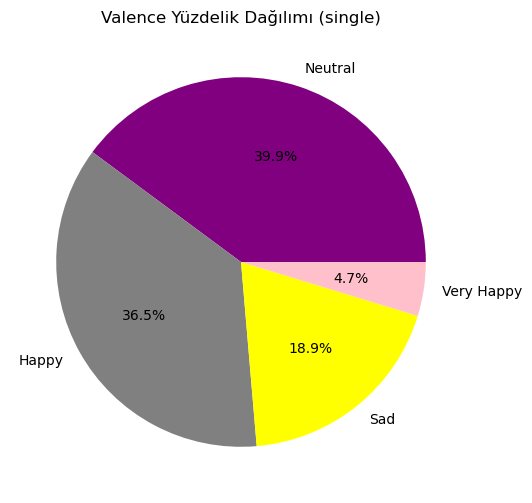

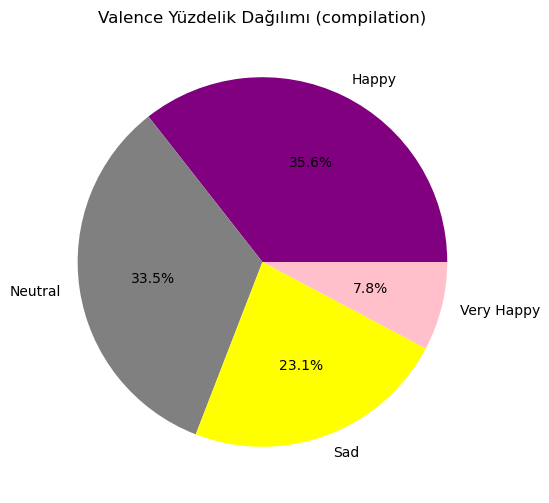

In [100]:
# Albüm türlerine göre Danceability Yüzdelik Dağılımı
album_types = df_spotify['Album_type'].unique()  # Albüm türlerini al
for album in album_types:
    subset = df_spotify[df_spotify['Album_type'] == album]  # Albüm türüne göre filtreleme
    
    # Danceability Yüzdelik Dağılımı
    danceability_bins = pd.cut(subset['Danceability'], bins=[0, 0.3, 0.6, 0.9, 1.0], labels=['Low', 'Medium', 'High', 'Very High'])
    danceability_percentage = danceability_bins.value_counts(normalize=True) * 100
    
    # Pie Chart (Danceability)
    plt.figure(figsize=(6, 6))
    danceability_percentage.plot.pie(autopct='%1.1f%%', colors=['lightblue', 'orange', 'green', 'red'])
    plt.title(f'Danceability Yüzdelik Dağılımı ({album})')
    plt.ylabel('')
    plt.show()

# Albüm türlerine göre Valence Yüzdelik Dağılımı
for album in album_types:
    subset = df_spotify[df_spotify['Album_type'] == album]  # Albüm türüne göre filtreleme
    
    # Valence Yüzdelik Dağılımı
    valence_bins = pd.cut(subset['Valence'], bins=[0, 0.3, 0.6, 0.9, 1.0], labels=['Sad', 'Neutral', 'Happy', 'Very Happy'])
    valence_percentage = valence_bins.value_counts(normalize=True) * 100
    
    # Pie Chart (Valence)
    plt.figure(figsize=(6, 6))
    valence_percentage.plot.pie(autopct='%1.1f%%', colors=['purple', 'gray', 'yellow', 'pink'])
    plt.title(f'Valence Yüzdelik Dağılımı ({album})')
    plt.ylabel('')
    plt.show()


POPÜLERLİK ENDEKSİ

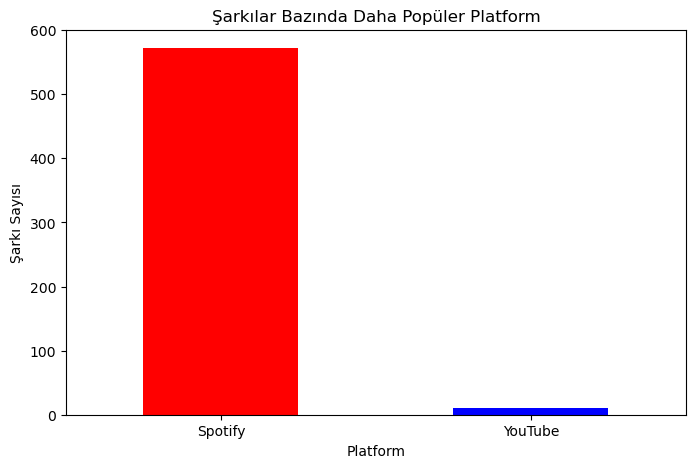

Detaylı Popülerlik Analizi:
                  Artist                           Track  YouTube_Popularity  \
42              Coldplay                          Sparks          36837039.8   
74             Radiohead         Exit Music (For A Film)           5373808.9   
138    Pharrell Williams               Just A Cloud Away           1355175.0   
334           Kanye West   Father Stretch My Hands Pt. 1          23781425.3   
336           Kanye West                        I Wonder           6874571.6   
...                  ...                             ...                 ...   
20713        SICK LEGEND            JUST DANCE HARDSTYLE             36172.9   
20714        SICK LEGEND  SET FIRE TO THE RAIN HARDSTYLE             82976.2   
20715        SICK LEGEND       OUTSIDE HARDSTYLE SPED UP             17921.7   
20716        SICK LEGEND             ONLY GIRL HARDSTYLE              3292.9   
20717        SICK LEGEND              MISS YOU HARDSTYLE             80093.7   

       Spot

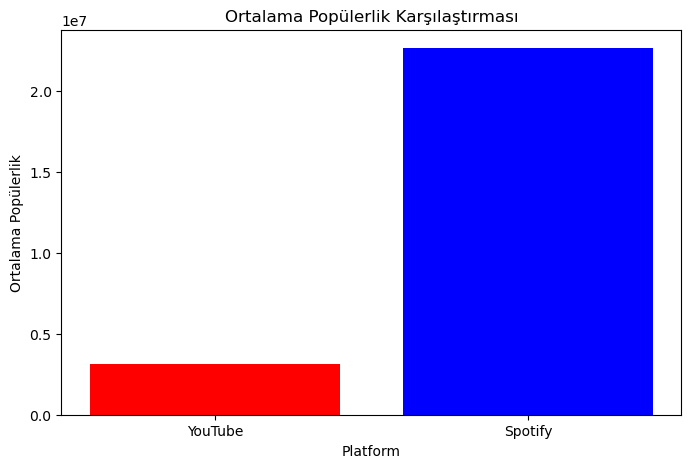

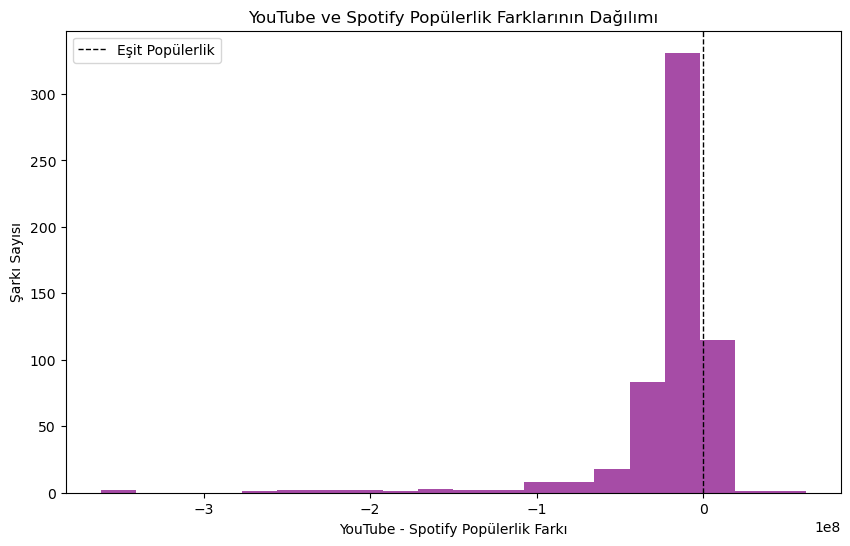

In [102]:
# Örnek ağırlıkları tanımlıyoruz
w1, w2, w3 = 0.5, 0.3, 0.2  # YouTube için: Views, Likes, Comments ağırlıkları
w4, w5 = 0.6, 0.4  # Spotify için: Stream, Likes ağırlıkları

# Popülerlik Endekslerini Hesaplama
common_songs['YouTube_Popularity'] = (
    (common_songs['Views'] * w1) + 
    (common_songs['Likes'] * w2) + 
    (common_songs['Comments'] * w3)
)

common_songs['Spotify_Popularity'] = (
    (common_songs['Stream'] * w4) + 
    (common_songs['Likes'] * w5)
)

# Hangi Platform Daha Popüler?
common_songs['Platform_With_Higher_Popularity'] = common_songs.apply(
    lambda row: 'YouTube' if row['YouTube_Popularity'] > row['Spotify_Popularity'] else 'Spotify', axis=1
)

# Genel Sonuçları Görselleştirme
platform_counts = common_songs['Platform_With_Higher_Popularity'].value_counts()

plt.figure(figsize=(8, 5))
platform_counts.plot(kind='bar', color=['red', 'blue'])
plt.title("Şarkılar Bazında Daha Popüler Platform")
plt.ylabel("Şarkı Sayısı")
plt.xlabel("Platform")
plt.xticks(rotation=0)
plt.show()

# Detaylı Tabloyu Görüntüleme
print("Detaylı Popülerlik Analizi:")
print(common_songs[['Artist', 'Track', 'YouTube_Popularity', 'Spotify_Popularity', 'Platform_With_Higher_Popularity']])

# Ortalama Popülerlik Hesaplama
platform_avg_popularity = {
    'YouTube': common_songs['YouTube_Popularity'].mean(),
    'Spotify': common_songs['Spotify_Popularity'].mean()
}

# Ortalama Popülerlik Görselleştirme
plt.figure(figsize=(8, 5))
plt.bar(platform_avg_popularity.keys(), platform_avg_popularity.values(), color=['red', 'blue'])
plt.title("Ortalama Popülerlik Karşılaştırması")
plt.ylabel("Ortalama Popülerlik")
plt.xlabel("Platform")
plt.xticks(rotation=0)
plt.show()

# Popülerlik Farklarını Dağılım Grafiği ile Görselleştirme
common_songs['Popularity_Difference'] = (
    common_songs['YouTube_Popularity'] - common_songs['Spotify_Popularity']
)

plt.figure(figsize=(10, 6))
plt.hist(common_songs['Popularity_Difference'], bins=20, color='purple', alpha=0.7)
plt.title("YouTube ve Spotify Popülerlik Farklarının Dağılımı")
plt.xlabel("YouTube - Spotify Popülerlik Farkı")
plt.ylabel("Şarkı Sayısı")
plt.axvline(0, color='black', linestyle='--', linewidth=1, label="Eşit Popülerlik")
plt.legend()
plt.show()


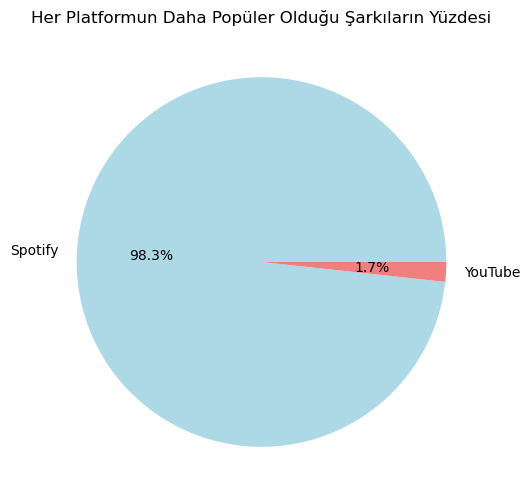

In [103]:
# Her platformun daha popüler olduğu şarkı sayısını yüzdelik olarak hesaplama
platform_percentage = common_songs['Platform_With_Higher_Popularity'].value_counts(normalize=True) * 100

# Grafikle yüzdelik gösterim
plt.figure(figsize=(6, 6))
platform_percentage.plot.pie(
    autopct='%1.1f%%', 
    colors=['lightblue', 'lightcoral'], 
    labels=platform_percentage.index
)
plt.title("Her Platformun Daha Popüler Olduğu Şarkıların Yüzdesi")
plt.ylabel('')  # Y ekseni etiketini kaldırıyoruz
plt.show()

Bu grafikten, şarkıların Spotify'da YouTube'a kıyasla daha popüler olduğunu ve daha fazla dinlenme aldığını görebiliyoruz. Bu durum, Spotify'ın müzik odaklı bir platform olarak kullanıcılar tarafından şarkı dinleme amacıyla daha sık tercih edildiğini göstermektedir. 

Veri setindeki şarkıların belirli özelliklerini ("Energy", "Danceability", "Acousticness") karşılaştıralım ve bunları bir çubuk grafikle görselleştirelim.

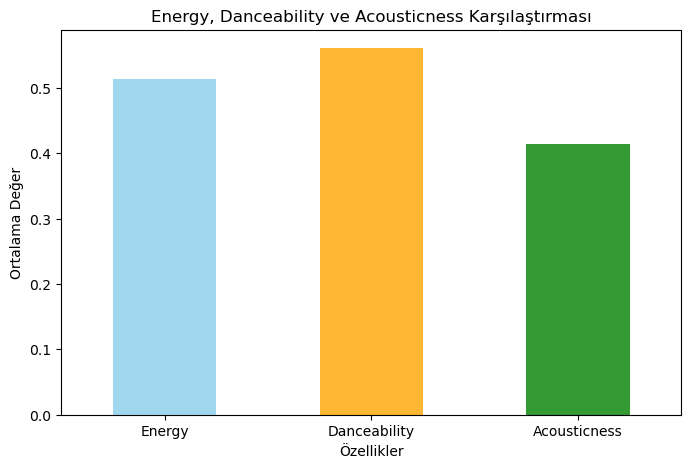

In [106]:
# Özelliklerin ortalama değerlerini hesaplama
feature_means = common_songs[['Energy', 'Danceability', 'Acousticness']].mean()

# Çubuk grafik oluşturma
plt.figure(figsize=(8, 5))
feature_means.plot(kind='bar', color=['skyblue', 'orange', 'green'], alpha=0.8)
plt.title("Energy, Danceability ve Acousticness Karşılaştırması")
plt.ylabel("Ortalama Değer")
plt.xlabel("Özellikler")
plt.xticks(rotation=0)
plt.show()


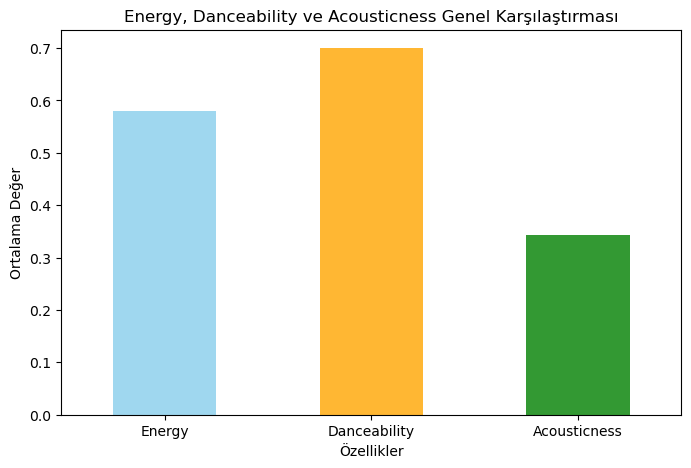

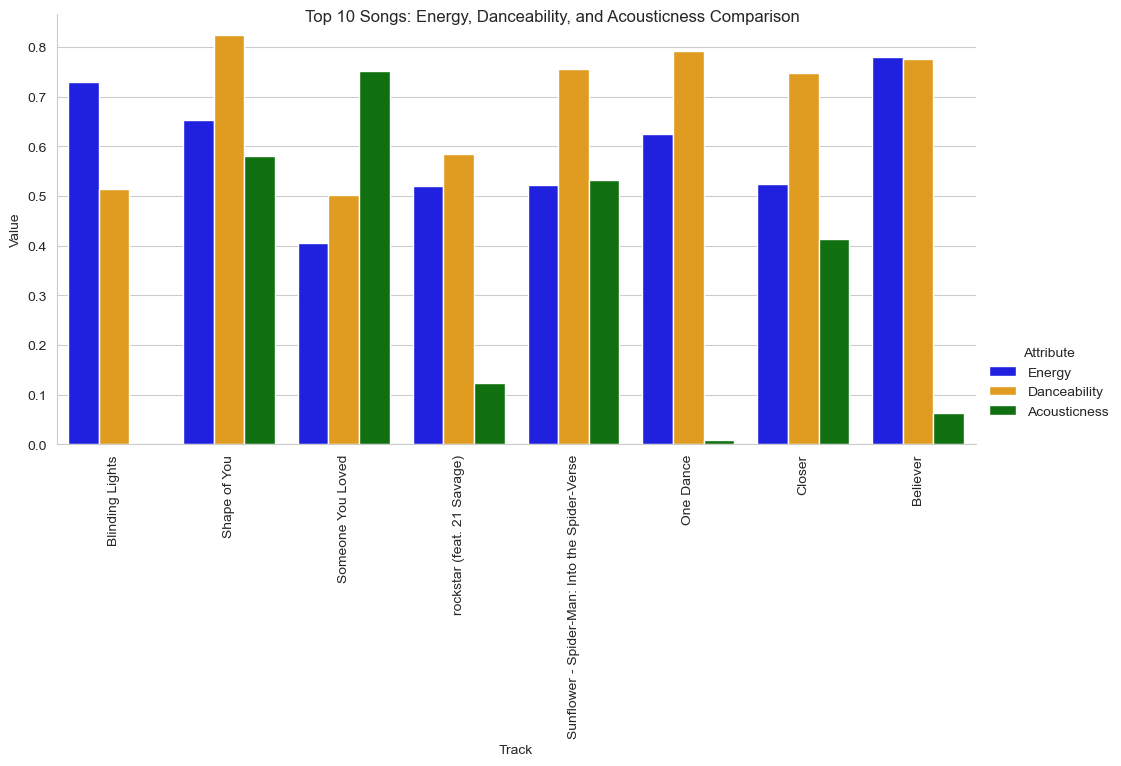

In [107]:
# Özelliklerin ortalama değerlerini hesaplayarak genel çubuk grafiği oluşturma
feature_means = top_songs[['Energy', 'Danceability', 'Acousticness']].mean()

plt.figure(figsize=(8, 5))
feature_means.plot(kind='bar', color=['skyblue', 'orange', 'green'], alpha=0.8)
plt.title("Energy, Danceability ve Acousticness Genel Karşılaştırması")
plt.ylabel("Ortalama Değer")
plt.xlabel("Özellikler")
plt.xticks(rotation=0)
plt.show()

# Veri setini uzun forma dönüştürme (Melt işlemi)
top_songs_melt = top_songs.melt(id_vars=['Track'], 
                                value_vars=['Energy', 'Danceability', 'Acousticness'], 
                                var_name='Attribute', 
                                value_name='Value')

# Her şarkı için çubuk grafiği oluşturma
sns.set_style('whitegrid')

# Şarkılar için çubuk grafiği oluşturma
g = sns.catplot(
    x='Track', y='Value', hue='Attribute', data=top_songs_melt, kind='bar',
    palette={'Energy': 'blue', 'Danceability': 'orange', 'Acousticness': 'green'},
    aspect=2
)

# Legend otomatik olarak eklenir
g._legend.set_title('Attribute')  # Legend başlığı
g.fig.suptitle('Top 10 Songs: Energy, Danceability, and Acousticness Comparison')  # Başlık
g.set_axis_labels('Track', 'Value')  # Eksen etiketleri
plt.xticks(rotation=90)
plt.show()

Görselleştirilen verilere göre, enerjisi ve dans ritimleri yüksek olan şarkılar insanlar arasında daha fazla ilgi çekiyor. Bu durum, insanların müzik seçimlerinde ritmik ve yüksek tempolu melodilere yöneldiğini gösteriyor. Energy ve Danceability gibi özellikler, özellikle eğlence odaklı etkinliklerde ve günlük motivasyon için tercih edilen şarkıların temel belirleyicileri olarak öne çıkıyor.

Müzik Veri Seti Görselleştirme

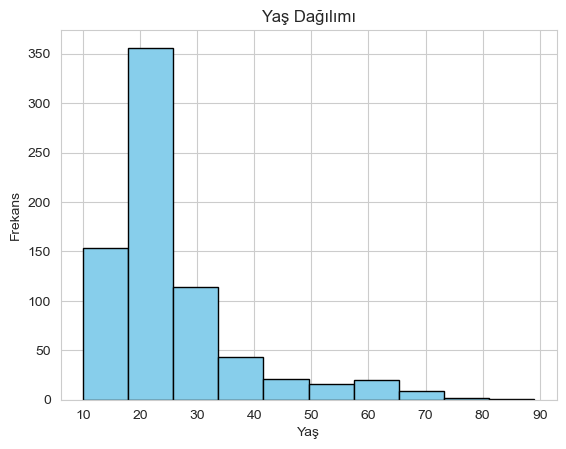

In [110]:
plt.hist(df_music['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.show()

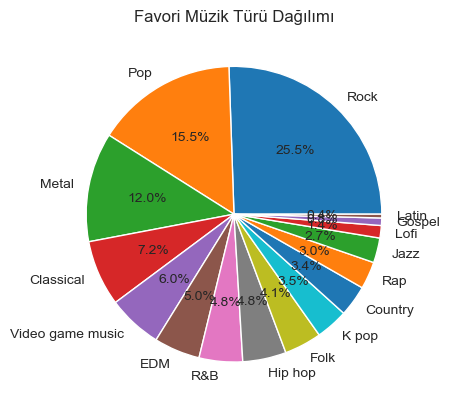

In [111]:
# Favori Müzik Türü Dağılımı
genre_counts = df_music['Fav genre'].value_counts()  # 'Fav genre' sütunundaki değerleri say
plt.pie(genre_counts, 
        labels=genre_counts.index, 
        autopct='%1.1f%%', 
        colors=plt.cm.tab10.colors[:len(genre_counts)])  # Farklı renk paletleri için tab10 kullanıldı
plt.title('Favori Müzik Türü Dağılımı')
plt.show()

Favori müzik türü en fazla %25.5 oranla Rock müzik türüdür.
Daha sonra %15.5 oranla Pop müzik türü 2.sıradadır.
Daha sonra ise %12 oranla Metal müzik türü 3.sıradadır.

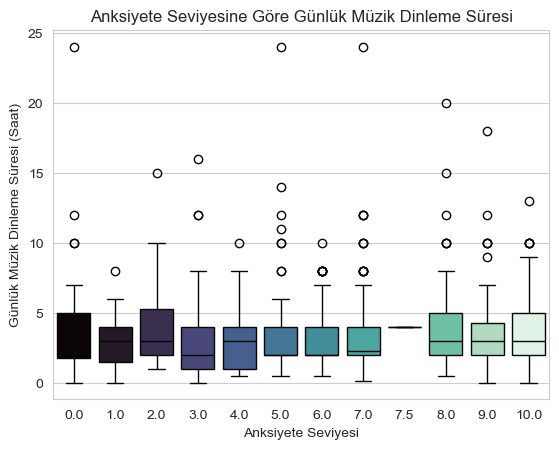

In [113]:
sns.boxplot(x='Anxiety', y='Hours per day', data=df_music, palette='mako', hue='Anxiety', dodge=False)
plt.title('Anksiyete Seviyesine Göre Günlük Müzik Dinleme Süresi')
plt.xlabel('Anksiyete Seviyesi')
plt.ylabel('Günlük Müzik Dinleme Süresi (Saat)')
plt.legend([],[], frameon=False)  # Ekstra bir legend oluşmasını önler
plt.show()

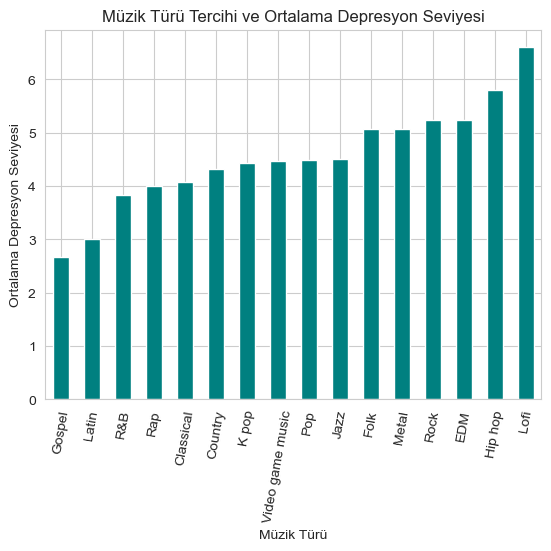

In [114]:
music_depression = df_music.groupby('Fav genre')['Depression'].mean().sort_values()
music_depression.plot(kind='bar', color='teal')
plt.title('Müzik Türü Tercihi ve Ortalama Depresyon Seviyesi')
plt.xlabel('Müzik Türü')
plt.ylabel('Ortalama Depresyon Seviyesi')
plt.xticks(rotation=80)
plt.show()

Depresyon seviyesi en yüksek olan kişiler Lofi müzik türünü tercih etmişlerdir.
Daha sonra 2. olarak Hip hop türünü tercih etmişlerdir.
Daha sonra ise Rock ve EDM müzik türünün aynı oranda tercih edildiği görülmüştür.
Depresyon seviyesi en düşük olan kişiler ise Gospel müzik türünü tercih etmişlerdir.
Bu sırayı da Latin, R&B, Classical takip etmektedir.

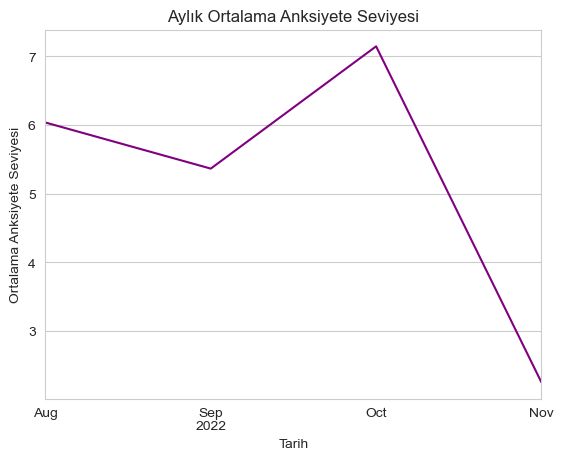

In [116]:
df_music['Timestamp'] = pd.to_datetime(df_music['Timestamp'])
df_music.set_index('Timestamp', inplace=True)

df_music['Anxiety'].resample('ME').mean().plot(kind='line', color='purple')

plt.title('Aylık Ortalama Anksiyete Seviyesi')
plt.xlabel('Tarih')
plt.ylabel('Ortalama Anksiyete Seviyesi')
plt.show()

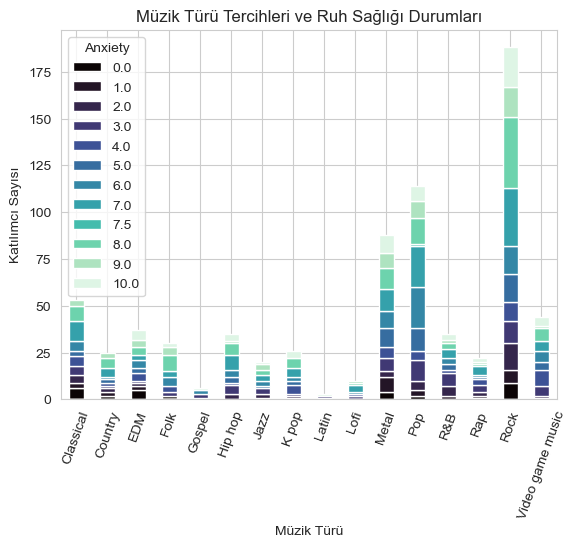

In [117]:
# Müzik türü ve ruh sağlığı durumu gruplaması
genre_mental_health = df_music.groupby(['Fav genre', 'Anxiety']).size().unstack()

# Stacked bar plot oluşturma
genre_mental_health.plot(kind='bar', stacked=True, colormap='mako')

# Başlık ve etiketler
plt.title('Müzik Türü Tercihleri ve Ruh Sağlığı Durumları')
plt.xlabel('Müzik Türü')
plt.ylabel('Katılımcı Sayısı')
plt.xticks(rotation=70)
plt.show()

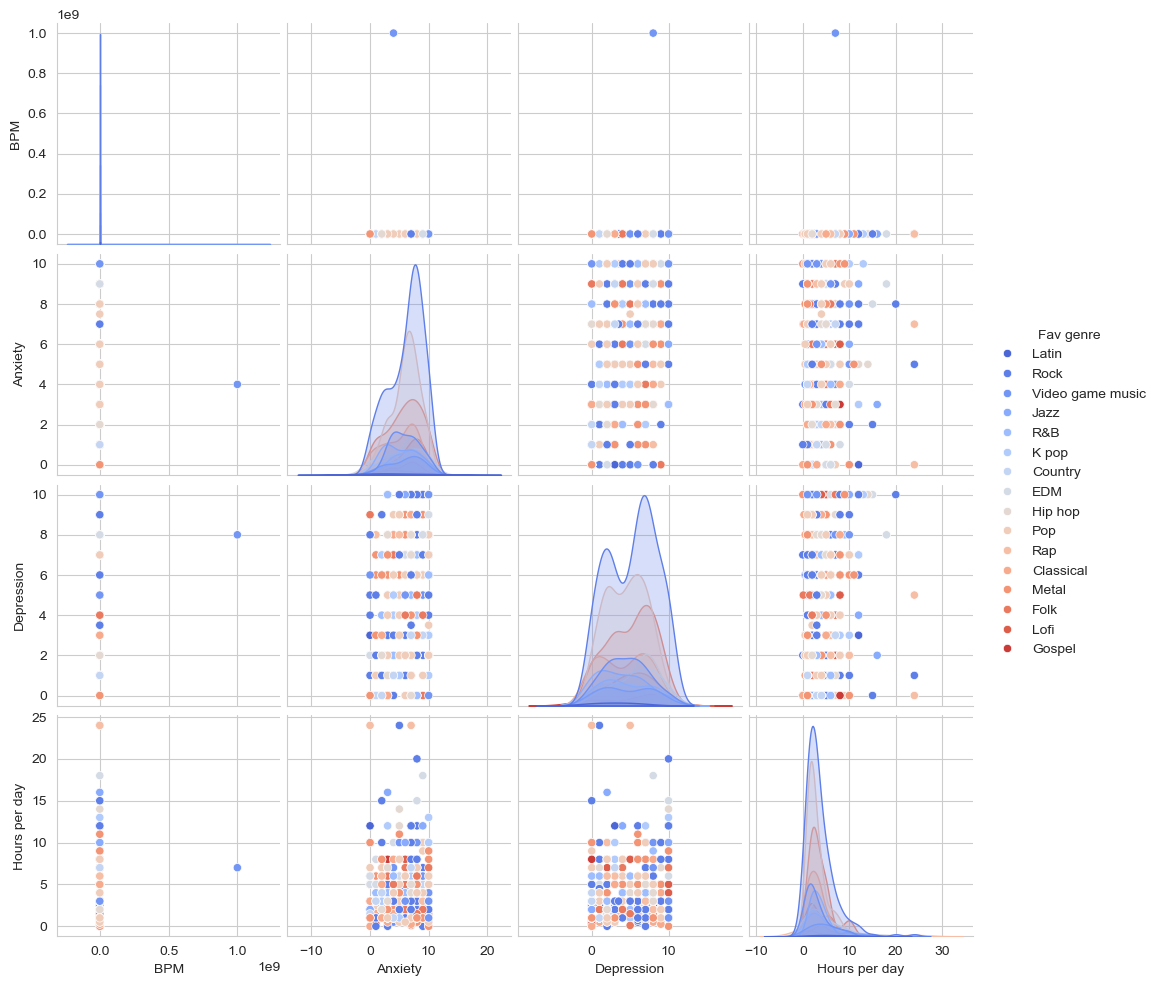

In [118]:
sns.pairplot(df_music, vars=['BPM', 'Anxiety', 'Depression', 'Hours per day'], hue='Fav genre', palette='coolwarm')
plt.show()

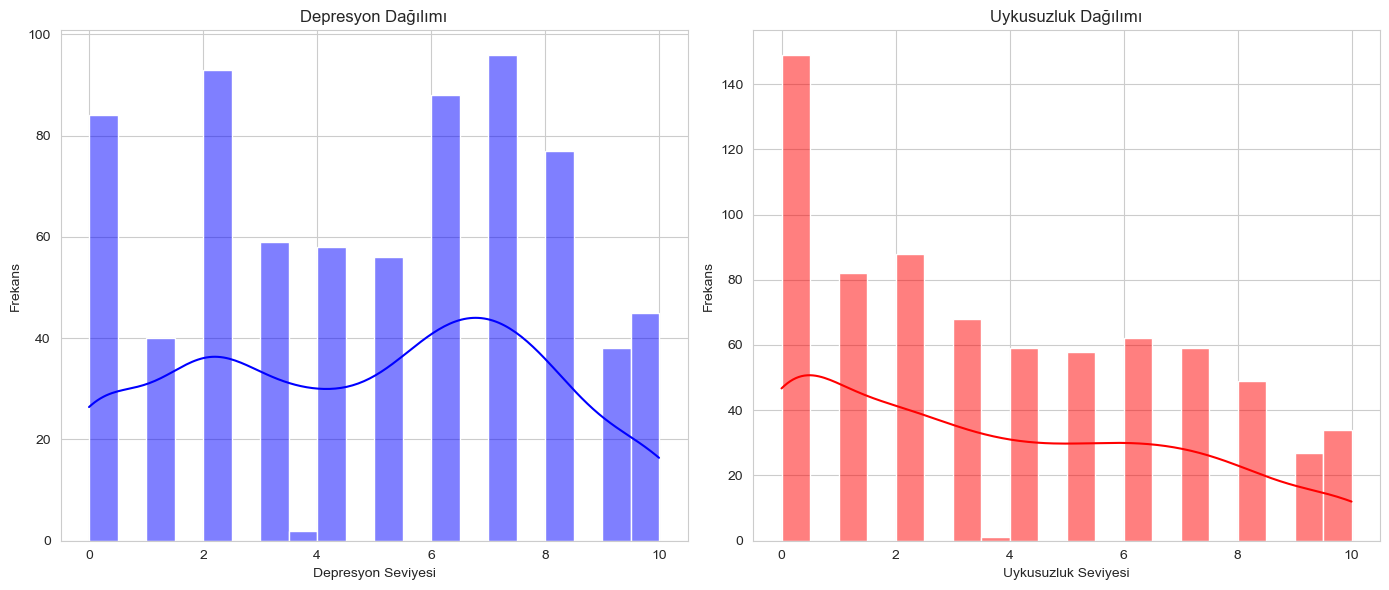

In [119]:
plt.figure(figsize=(14, 6))

# Depression için histogram
plt.subplot(1, 2, 1)
sns.histplot(df_music['Depression'], kde=True, color='blue', bins=20)
plt.title('Depresyon Dağılımı')
plt.xlabel('Depresyon Seviyesi')
plt.ylabel('Frekans')

# Insomnia için histogram
plt.subplot(1, 2, 2)
sns.histplot(df_music['Insomnia'], kde=True, color='red', bins=20)
plt.title('Uykusuzluk Dağılımı')
plt.xlabel('Uykusuzluk Seviyesi')
plt.ylabel('Frekans')

plt.tight_layout()
plt.show()


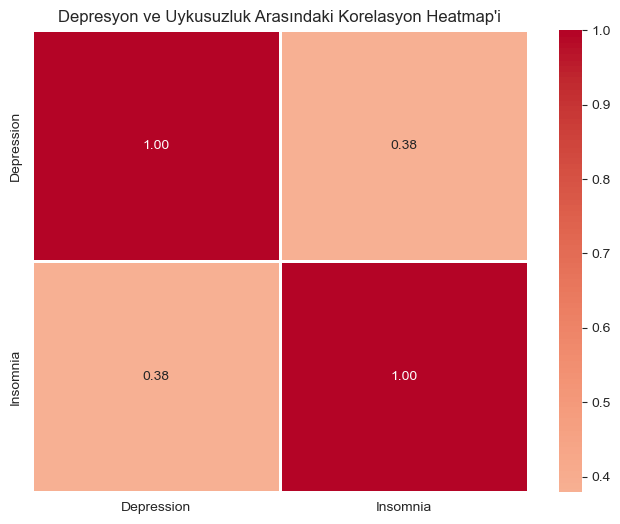

In [120]:
# Korelasyon matrisi
corr_matrix = df_music[['Depression', 'Insomnia']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=1)
plt.title('Depresyon ve Uykusuzluk Arasındaki Korelasyon Heatmap\'i')
plt.show()


Depresyon (Depression) ve uykusuzluk (Insomnia) arasındaki ilişkinin 0.38 olması, iki değişken arasında orta derecede pozitif bir ilişki olduğunu gösteriyor. Yani, depresyon seviyesi arttıkça uykusuzluk seviyesi de hafifçe artıyor, ancak bu ilişki oldukça güçlü değil.

Korelasyon katsayısının 0.38 olması, doğrusal bir ilişki olduğunu ancak bu ilişkinin çok belirgin olmadığını gösterir. Başka bir deyişle, depresyon ile uykusuzluk arasında bir bağlantı bulunsa da, bu bağlantı tek başına depresyonun uykusuzluk üzerinde belirleyici bir etkiye sahip olduğu anlamına gelmez.

In [122]:
# İndekslerin kontrol edilmesi
df_music = df_music.reset_index(drop=True)


In [123]:
# Sütun adlarını kontrol etme ve düzenleme
df_music.columns = df_music.columns.str.strip()

# Music effects ve OCD sütunlarını kontrol etme
print(df_music[['Music effects', 'OCD']].head())


  Music effects  OCD
0           NaN  0.0
1           NaN  1.0
2     No effect  2.0
3       Improve  3.0
4       Improve  9.0


In [124]:
#eksik verileri bir sabit değerle doldurmak
df_music['Music effects'] = df_music['Music effects'].fillna('Unknown')

In [125]:
from sklearn.preprocessing import LabelEncoder

# Kategorik veriyi sayısal verilere dönüştürme
label_encoder = LabelEncoder()
df_music['Music effects'] = label_encoder.fit_transform(df_music['Music effects'])

# Kontrol et
print(df_music[['Music effects', 'OCD']].head())


   Music effects  OCD
0              2  0.0
1              2  1.0
2              1  2.0
3              0  3.0
4              0  9.0


Bu veri setinde, müzik etkilerinin OCD üzerindeki etkisiyle ilgili çok çeşitli durumlar var:

Müzik, bazı insanlar için faydalı olabilir, ancak OCD belirtileri mevcut.
Bazı insanlar için müzik etkisi hiç yoktur ve OCD belirtileri şiddetli olabilir.
Müzik etkisi olmayan kişilerde OCD'nin şiddetli olması daha belirgindir.

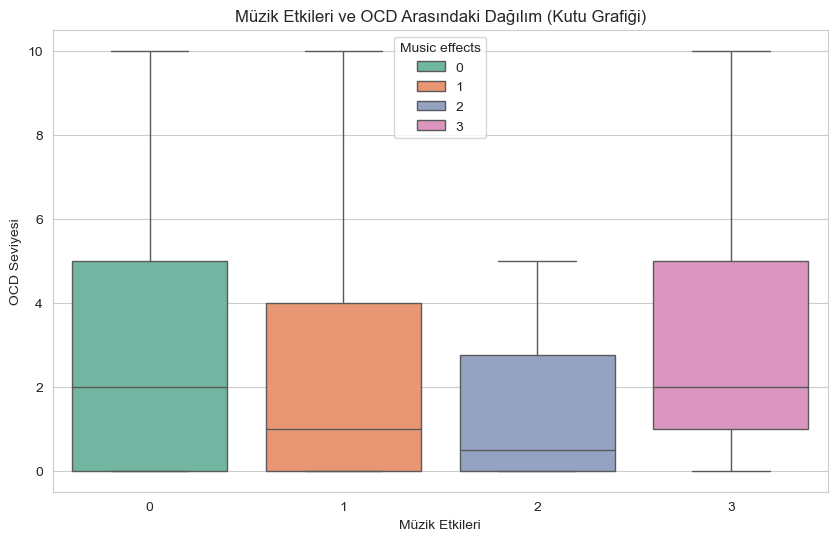

In [127]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_music, x='Music effects', y='OCD', hue='Music effects', palette='Set2', showfliers=False)

plt.title('Müzik Etkileri ve OCD Arasındaki Dağılım (Kutu Grafiği)')
plt.xlabel('Müzik Etkileri')
plt.ylabel('OCD Seviyesi')
plt.show()


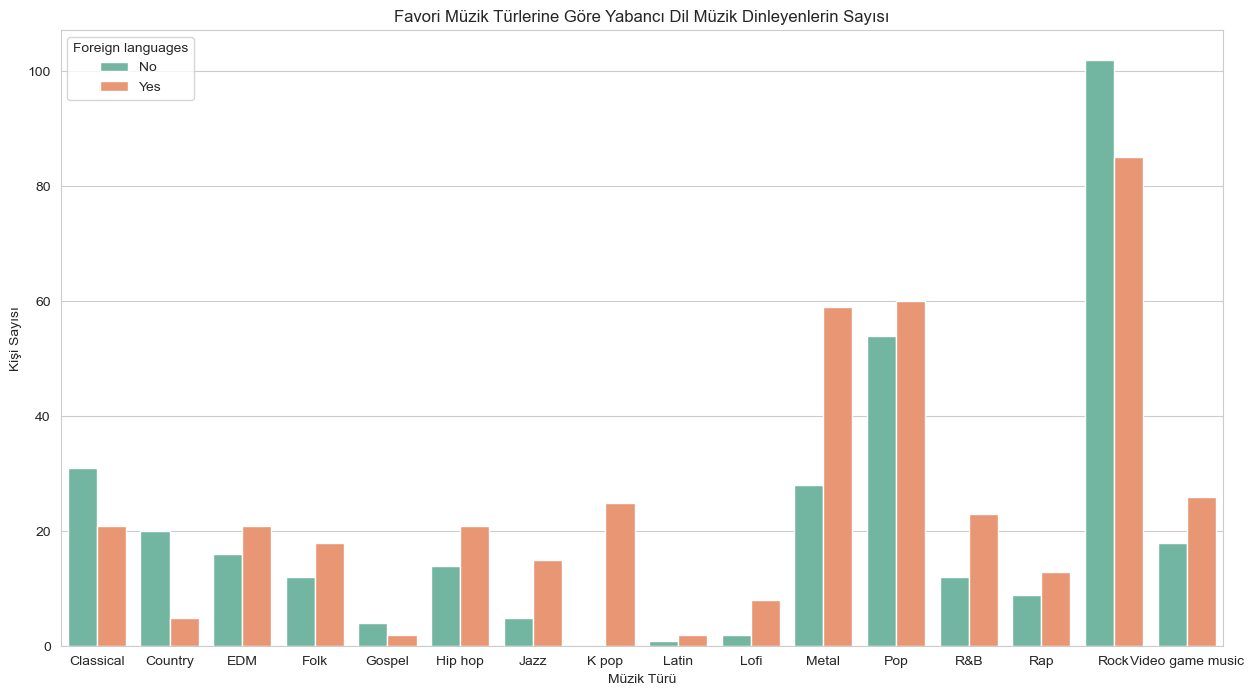

In [128]:
# Müzik türü ve yabancı dilde müzik dinleyip dinlemeyenleri sayalım
genre_language_count = df_music.groupby(['Fav genre', 'Foreign languages']).size().reset_index(name='Count')

# Bar grafik oluşturma
plt.figure(figsize=(15, 8))
sns.barplot(x='Fav genre', y='Count', hue='Foreign languages', data=genre_language_count, palette='Set2')

plt.title('Favori Müzik Türlerine Göre Yabancı Dil Müzik Dinleyenlerin Sayısı')
plt.xlabel('Müzik Türü')
plt.ylabel('Kişi Sayısı')
plt.show()

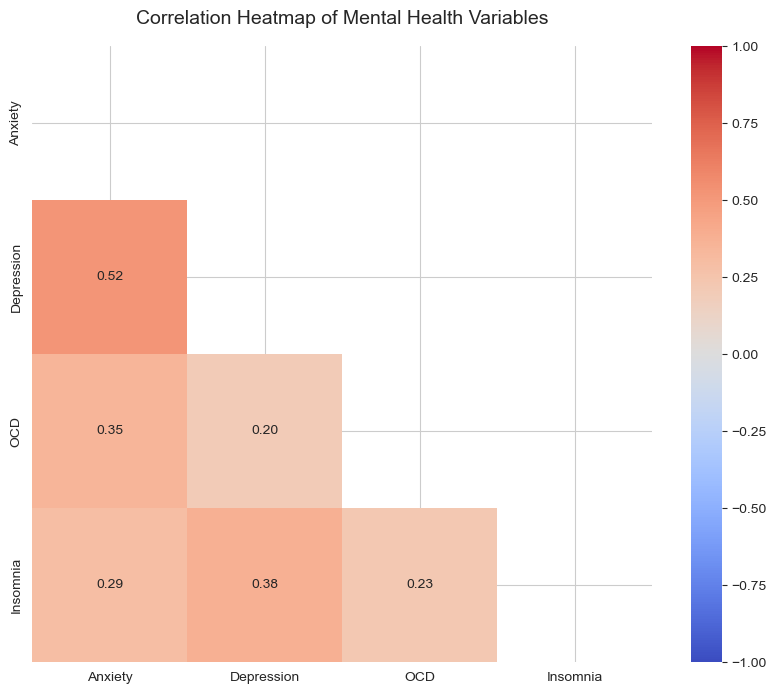

Anxiety and Depression, Depression and Anxiety are positively correlated. Other numerical variables are not correlated, indicating no linear relationship.


In [129]:
# Hedef sütunlar (Anxiety, Depression, OCD, Insomnia)
target_columns = ['Anxiety', 'Depression', 'OCD', 'Insomnia']

# Sadece hedef sütunların alt kümesini seçiyoruz
df_subset = df_music[target_columns]

# Korelasyon matrisini hesapla
corr = df_subset.corr()

# Görselleştirme için maskeleme ve filtreleme
f, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Mental Health Variables", fontsize=14, pad=16)
plt.show()

# Pozitif korelasyon analizi
cut_off = 0.5
positive_corr = corr[(corr > cut_off) & (corr < 1.0)].stack()

# Sonuç açıklaması
if not positive_corr.empty:
    correlated_pairs = positive_corr.index.tolist()
    correlated_vars = ', '.join([f'{x[0]} and {x[1]}' for x in correlated_pairs])
    result = f"{correlated_vars} are positively correlated. Other numerical variables are not correlated, indicating no linear relationship."
else:
    result = "No strong positive correlations found among the selected variables."

print(result)

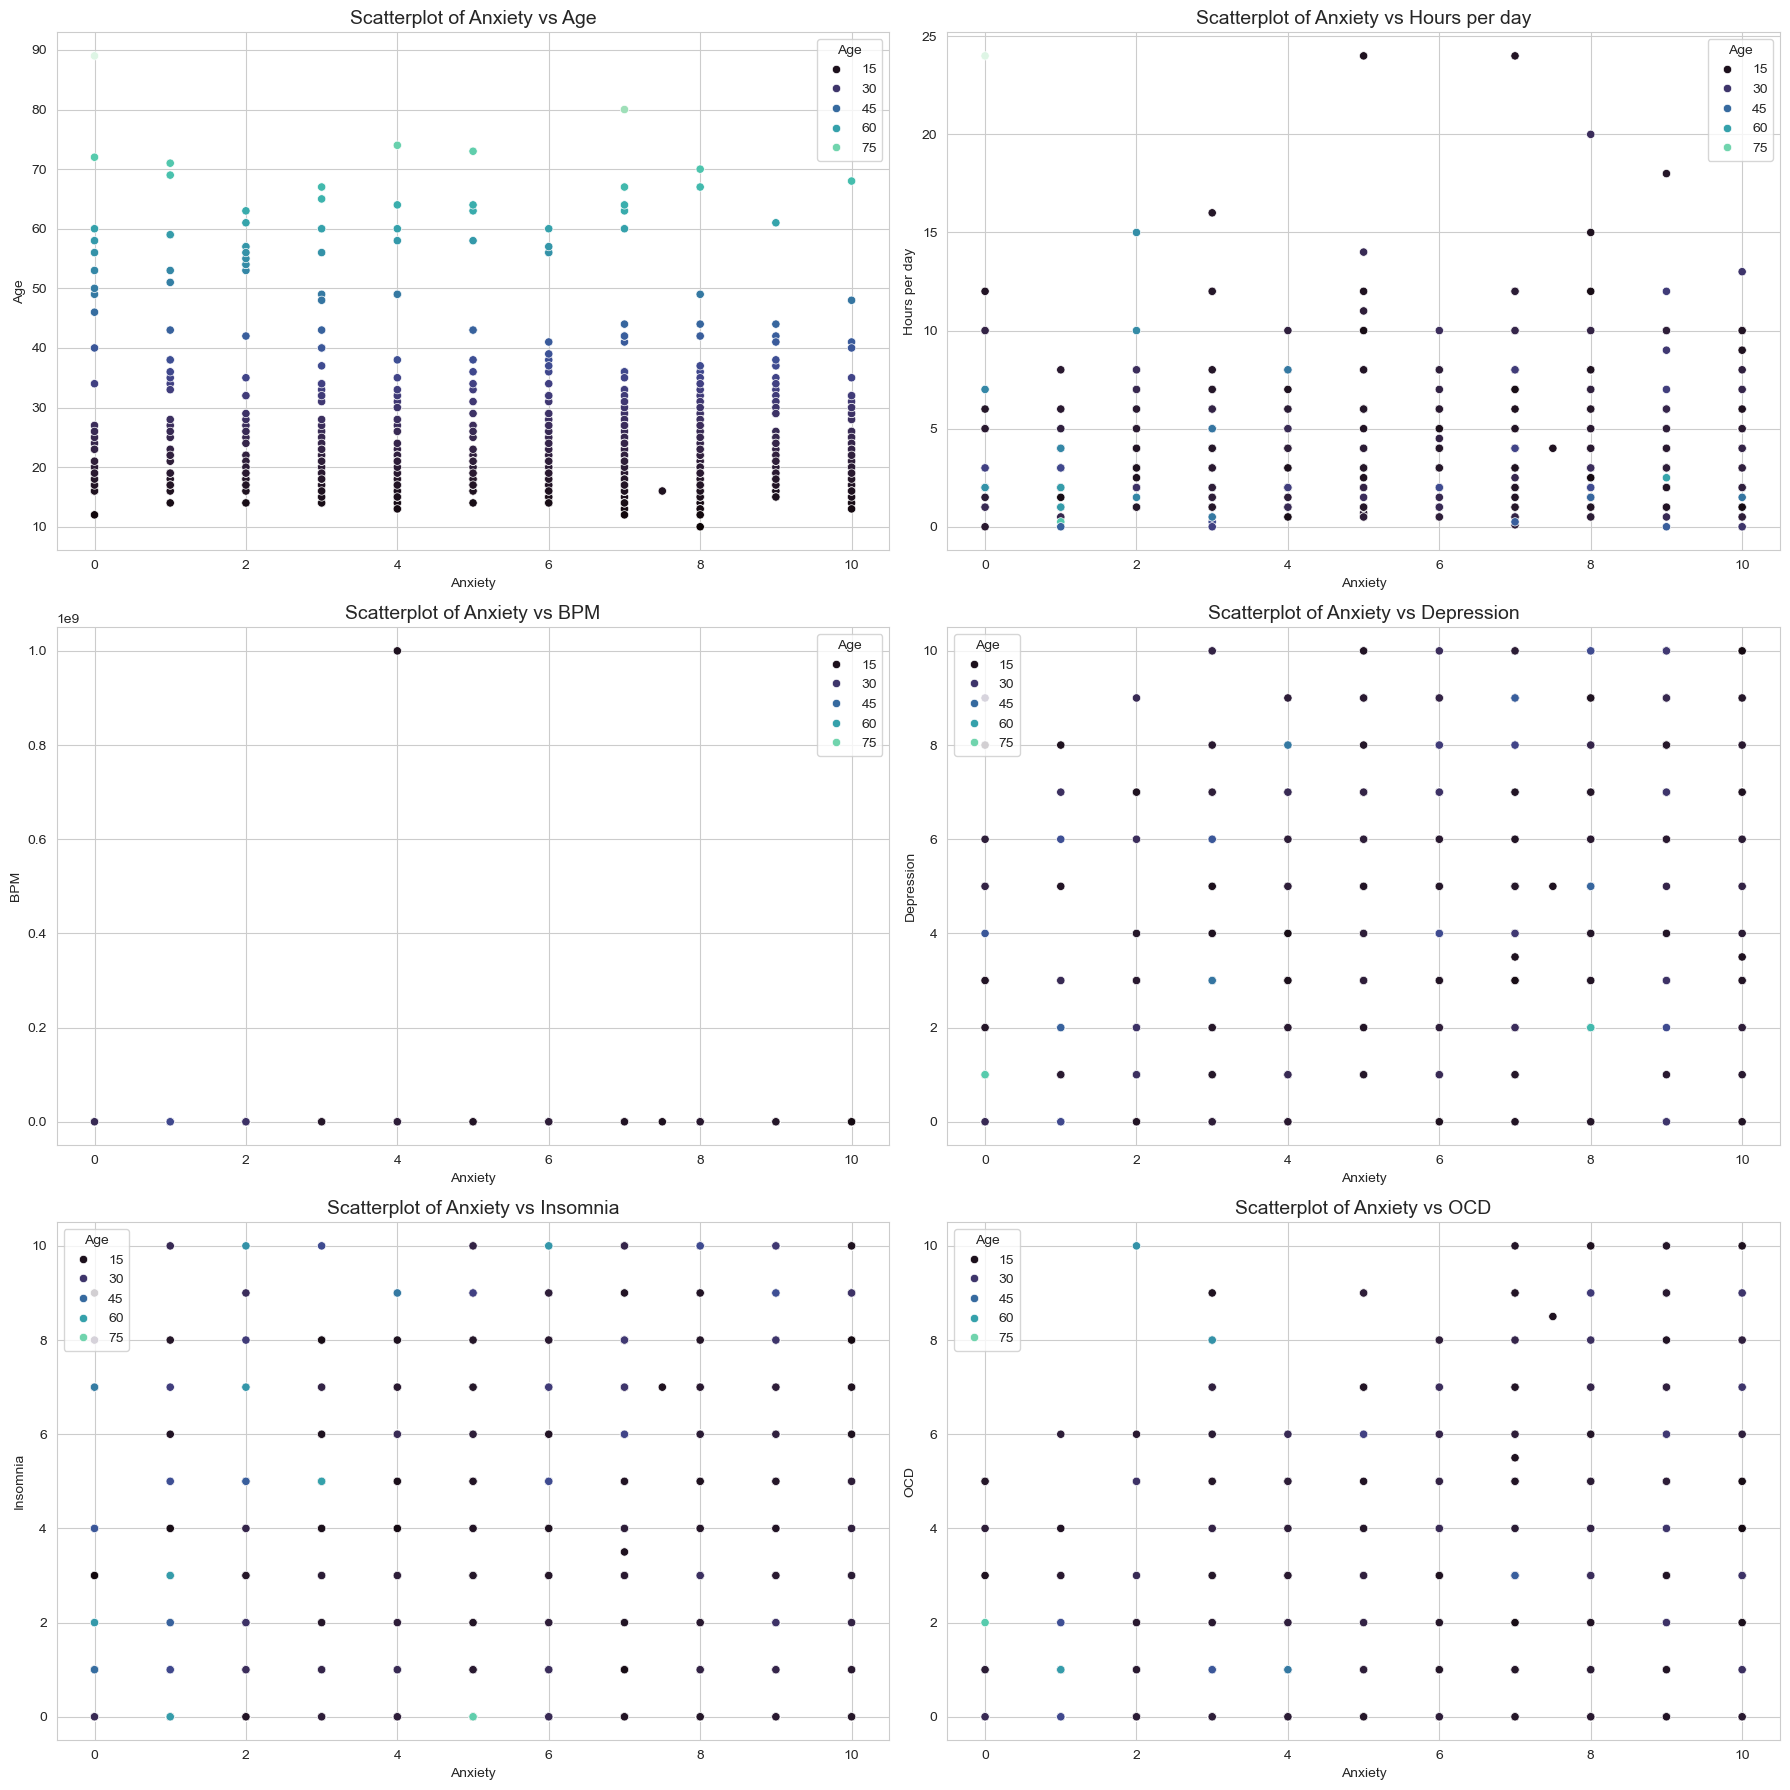

In [131]:
# Scatterplot için sütunlar
columns_to_plot = ['Age', 'Hours per day', 'BPM', 'Depression', 'Insomnia', 'OCD']

# Grafik boyutu ve düzeni
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))  # 3 satır, 2 sütun düzeni

# Her bir sütun için scatterplot çiz
for col, ax in zip(columns_to_plot, axes.flat):
    sns.scatterplot(
        x='Anxiety', 
        y=col, 
        hue='Age', 
        data=df_music, 
        palette="mako", 
        ax=ax
    )
    ax.set_title(f"Scatterplot of Anxiety vs {col}", fontsize=14)  # Her grafik için başlık
    ax.set_xlabel("Anxiety")  # X ekseni etiketi
    ax.set_ylabel(col)        # Y ekseni etiketi

# Alt grafikler arasında boşluk bırakma
plt.tight_layout()
plt.show()


Anxiety değerleri tüm yaş gruplarında yaygın olarak gözlemlenmiş.
Genç yaş grubunda (özellikle 15-25) Anxiety daha sık görünüyor.
İleri yaşlarda (55 ve üzeri) Anxiety daha seyrek.
Farklı yaş grupları için Hours per day (günlük saat bazlı veri) arasında belirgin bir ilişki yok gibi görünüyor.
BPM ile Anxiety arasında görünür bir ilişki bulunmuyor.
Çoğu gözlem düşük BPM değerlerinde yoğunlaşmış (muhtemelen sakin durum).
Anxiety seviyesi yüksek olan bireylerin bir kısmında Insomnia değerlerinin de yüksek olduğu görülmekte.
Anxiety ile OCD (Obsesif Kompulsif Bozukluk) arasında dikkat çekici bir ilişki görünmüyor.

In [133]:
# 12 saatten fazla müzik dinleyen kayıtları listele
print('Günde 12 saatten fazla müzik dinleyen kayıtlar:\n')
records_over_12_hours = df_music[df_music["Hours per day"] > 12]
print(f'{len(records_over_12_hours)} kayıt')
print("{:.2f}% veri".format((len(records_over_12_hours) / df_music.shape[0]) * 100))

# 12 saatten fazla müzik dinleyen kayıtların detaylarına ulaş
outliers = df_music.query('`Hours per day` > 12')
outliers

Günde 12 saatten fazla müzik dinleyen kayıtlar:

10 kayıt
1.36% veri


Age Primary streaming service  Hours per day While working  \
18   17.0                   Spotify           24.0           Yes   
290  27.0                   Spotify           20.0           Yes   
347  18.0                   Spotify           16.0           Yes   
359  16.0                   Spotify           15.0           Yes   
366  16.0                   Spotify           24.0           Yes   
407  26.0                   Spotify           14.0           Yes   
426  30.0                   Spotify           13.0           NaN   
485  55.0             YouTube Music           15.0           Yes   
695  89.0                   Spotify           24.0           Yes   
726  18.0               Apple Music           18.0           Yes   

    Instrumentalist Composer Fav genre Exploratory Foreign languages    BPM  \
18               No       No       Rap         Yes                No   99.0   
290              No       No      Rock         Yes               Yes    NaN   
347              No      Yes      Jazz         Yes               Yes   90.0   
359             Yes      Yes       EDM         Yes                No   85.0   
366              No       No      Rock         Yes               Yes  120.0   
407              No       No   Hip hop         Yes               Yes  158.0   
426              No       No     K pop         Yes               Yes  145.0   
485              No       No      Rock          No                No  156.0   
695             Yes      Yes       Rap          No                No  143.0   
726              No       No       EDM         Yes                No   90.0   

     ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
18   ...        Sometimes  Very frequently  Very frequently   
290  ...            Never           Rarely  Very frequently   
347  ...  Very frequently  Very frequently  Very frequently   
359  ...            Never  Very frequently  Very frequently   
366  ...           Rarely           Rarely        Sometimes   
407  ...  Very frequently  Very frequently  Very frequently   
426  ...  Very frequently        Sometimes  Very frequently   
485  ...            Never            Never  Very frequently   
695  ...        Sometimes  Very frequently           Rarely   
726  ...        Sometimes        Sometimes        Sometimes   

    Frequency [Video game music] Anxiety Depression Insomnia   OCD  \
18                         Never     7.0        5.0      0.0   3.0   
290                    Sometimes     8.0       10.0     10.0   8.0   
347                       Rarely     3.0        2.0      5.0   6.0   
359                    Sometimes     8.0       10.0      9.0   2.0   
366                       Rarely     5.0        1.0      9.0   1.0   
407                       Rarely     5.0       10.0      8.0   0.0   
426                    Sometimes    10.0       10.0     10.0   7.0   
485                        Never     2.0        0.0      3.0   0.0   
695                        Never     0.0        0.0      0.0   0.0   
726                    Sometimes     9.0        8.0      5.0  10.0   

    Music effects    Permissions  
18              0  I understand.  
290             1  I understand.  
347             0  I understand.  
359             0  I understand.  
366             0  I understand.  
407             1  I understand.  
426             0  I understand.  
485             1  I understand.  
695             1  I understand.  
726             0  I understand.  

[10 rows x 32 columns]

In [134]:
# 12 saatten az dinleyenlerin ruh hali ortalamaları
anx = df_music.loc[df_music["Hours per day"] < 12, 'Anxiety'].mean()
dep = df_music.loc[df_music["Hours per day"] < 12, 'Depression'].mean()
ins = df_music.loc[df_music["Hours per day"] < 12, 'Insomnia'].mean()
ocd = df_music.loc[df_music["Hours per day"] < 12, 'OCD'].mean()

# 12 saatten fazla dinleyenlerin ruh hali ortalamaları
anx1 = outliers['Anxiety'].mean()
dep1 = outliers['Depression'].mean()
ins1 = outliers['Insomnia'].mean()
ocd1 = outliers['OCD'].mean()

In [135]:
# 12 saatten fazla müzik dinleyenlerin ruh hali ortalamaları
print('\033[96m 12 Saatten Fazla Müzik Dinleyenlerin Ruh Hali Ortalamaları:')
print(f'\033[0mAnxiety: {anx:.2f}')
print(f'Depression: {dep:.2f}')
print(f'Insomnia: {ins:.2f}')
print(f'OCD: {ocd:.2f}\n')

# 12 saatten az müzik dinleyenlerin ruh hali ortalamaları
print('\033[95m 12 Saatten Az Müzik Dinleyenlerin Ruh Hali Ortalamaları:')
print(f'\033[0mAnxiety: {anx1:.1f}')
print(f'Depression: {dep1:.1f}')
print(f'Insomnia: {ins1:.1f}')
print(f'OCD: {ocd1:.1f}')

 12 Saatten Fazla Müzik Dinleyenlerin Ruh Hali Ortalamaları:
Anxiety: 5.84
Depression: 4.76
Insomnia: 3.69
OCD: 2.61

 12 Saatten Az Müzik Dinleyenlerin Ruh Hali Ortalamaları:
Anxiety: 5.7
Depression: 5.6
Insomnia: 5.9
OCD: 3.7


12 saatten fazla müzik dinleyenlerin ruh hali ortalamaları, anksiyete, depresyon, uykusuzluk ve OKB gibi mental sağlık koşulları açısından daha yüksek değerler göstermektedir.12 saatten fazla dinleyenlerin uykusuzluk ortalaması (3.69), daha belirgin şekilde düşük ve değişkenlik gösteriyor. Bu durum, müzik dinleme süresinin uykusuzluk üzerinde etkili olduğunu düşündürüyor. Bu bulgular, müzik dinleme süresiyle mental sağlık durumu arasında potansiyel bir ilişkiyi ortaya koyuyor ve özellikle müzik dinlemenin uykusuzluk üzerindeki etkilerini vurguluyor. 12 saatten fazla müzik dinleyen bireylerin daha düşük depresyon seviyelerine sahip olması, bu bireylerin müziği bir rahatlama aracı olarak kullandıklarını gösterebilir.

In [137]:
# Müzik dinleme süresi 180 BPM'den fazla olan kayıtları filtreleyip, sayısını ve yüzdesini hesaplıyoruz
bpm_above_180 = df_music[df_music["BPM"] > 180]

# Sonuçları yazdırıyoruz
print('+180 BPMden oluşan kayıtlar:\n')
print(f'{len(bpm_above_180)} kayıtlar')
print("{:.2f}% of df_music".format((len(bpm_above_180) / df_music.shape[0]) * 100))

# BPM değeri 180'den büyük olan kayıtların belirli sütunlarını seçip, index'i sıfırlıyoruz
outre2 = bpm_above_180[
    ['Age', 'Primary streaming service', 'Hours per day', 'Instrumentalist', 
     'Fav genre','Exploratory', 'BPM','Anxiety', 'Depression','Insomnia', 
     'OCD', 'Music effects']
].reset_index(drop=True)

# Sonuçları görüntülüyoruz
outre2

+180 BPMden oluşan kayıtlar:

28 kayıtlar
3.80% of df_music


Age          Primary streaming service  Hours per day Instrumentalist  \
0   17.0                        Apple Music            1.0              No   
1   22.0                            Spotify           10.0              No   
2   31.0                            Spotify            2.0              No   
3   15.0                            Spotify            8.0              No   
4   29.0            Other streaming service            5.0              No   
5   27.0                            Spotify           10.0              No   
6   28.0  I do not use a streaming service.            4.0              No   
7   18.0                            Spotify            1.0             Yes   
8   27.0                            Spotify           10.0              No   
9   64.0  I do not use a streaming service.            4.0              No   
10  20.0                            Spotify            2.0             Yes   
11  20.0                        Apple Music            3.0             Yes   
12  30.0                            Spotify            1.0              No   
13  17.0                            Spotify            2.0              No   
14  27.0                            Spotify            3.0              No   
15  14.0                            Spotify            2.0             Yes   
16  32.0                            Spotify           12.0             Yes   
17  38.0                            Spotify            1.0              No   
18  48.0                            Spotify            1.5             Yes   
19  15.0                            Spotify            3.0              No   
20  18.0                            Spotify            3.0             Yes   
21  16.0                            Spotify            7.0              No   
22  26.0  I do not use a streaming service.            1.0              No   
23  56.0  I do not use a streaming service.            2.0              No   
24  16.0            Other streaming service            4.0              No   
25  32.0                            Spotify            1.0              No   
26  37.0                            Spotify            2.0              No   
27  19.0                            Spotify            5.0              No   

           Fav genre Exploratory          BPM  Anxiety  Depression  Insomnia  \
0                Pop         Yes        183.0      8.0         2.0       1.0   
1              Metal         Yes        189.0      9.0         6.0       0.0   
2               Rock         Yes        200.0      8.0         9.0       6.0   
3               Rock          No        193.0      8.0         7.0       5.0   
4               Jazz         Yes        200.0      7.0         2.0       3.0   
5              Metal         Yes        185.0      5.0         6.0       6.0   
6               Rock         Yes        194.0      6.0         8.0       1.0   
7              Metal         Yes        190.0      6.0         9.0       9.0   
8              Metal         Yes        194.0      8.0         8.0       3.0   
9               Rock          No        200.0      4.0         4.0       2.0   
10             Metal          No        220.0      0.0         0.0       0.0   
11             Metal         Yes        200.0      7.0         4.0       7.0   
12               EDM         Yes        200.0      4.0         4.0       4.0   
13               Pop         Yes        208.0      7.0         6.0       3.0   
14             Metal         Yes        200.0      4.0         0.0       0.0   
15         Classical         Yes        181.0      7.0         5.0       3.0   
16              Jazz         Yes        200.0      9.0         4.0       4.0   
17             Metal         Yes        191.0      1.0         1.0       5.0   
18             Metal          No        185.0     10.0         8.0       0.0   
19             K pop         Yes        204.0      4.0         0.0       0.0   
20             Metal         Yes        210.0      9.0        

Bazı katılımcıların favori müzik türlerinin BPM değerlerini yanlış bildirmiş olmaları, veri kalitesini etkileyebilir. Özellikle, metal gibi türlerin BPM değeri geniş bir aralıkta değişebilir, bu da katılımcıların tahmin yaparak veya rastgele sayılar girerek hatalı veri sağlamalarına neden olabilir. Örneğin, caz türü için 200 BPM gibi yüksek bir değer ve EDM için 624 BPM gibi alışılmadık bir BPM değeri, verilerin doğruluğunu sorgulamamıza yol açmaktadır. Bu tür hatalar, veri temizleme ve doğrulama sürecini gerektirir. Bu tür verilerin analize dahil edilmesi, sonuçları yanıltabilir.

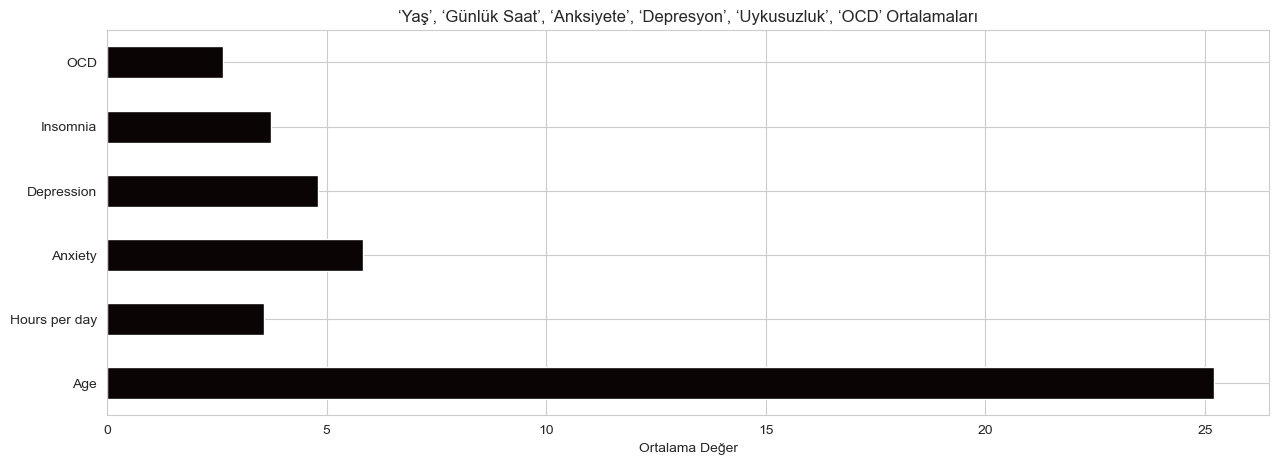

In [139]:
# İlgili sütunları seçiyoruz
selected_columns = ['Age', 'Hours per day', 'Anxiety', 'Depression', 'Insomnia', 'OCD']

# Ortalama hesaplamak için bu sütunları kullanıyoruz
average_values = df_music[selected_columns].mean()

# Bar grafiği çiziyoruz
average_values.plot(kind='barh', stacked=True, figsize=(15, 5), cmap="mako")

# Grafik başlıkları ve etiketleri
plt.xlabel('Ortalama Değer')
plt.title("‘Yaş’, ‘Günlük Saat’, ‘Anksiyete’, ‘Depresyon’, ‘Uykusuzluk’, ‘OCD’ Ortalamaları")

# Grafiği gösteriyoruz
plt.show()



Age Özet:
Count: 735.00, Mean: 25.21, Std: 12.05, Min: 10.00, 25%: 18.00, 50%: 21.00, 75%: 28.00, Max: 89.00


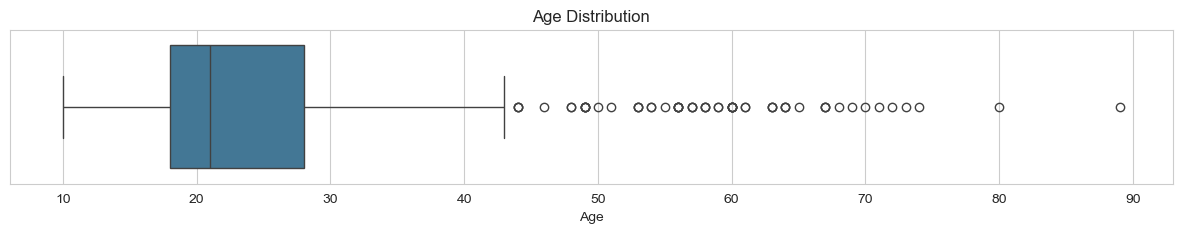


Hours per day Özet:
Count: 736.00, Mean: 3.57, Std: 3.03, Min: 0.00, 25%: 2.00, 50%: 3.00, 75%: 5.00, Max: 24.00


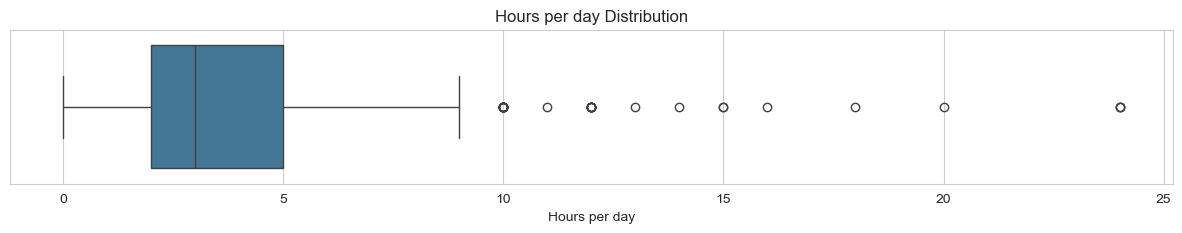


Anxiety Özet:
Count: 736.00, Mean: 5.84, Std: 2.79, Min: 0.00, 25%: 4.00, 50%: 6.00, 75%: 8.00, Max: 10.00


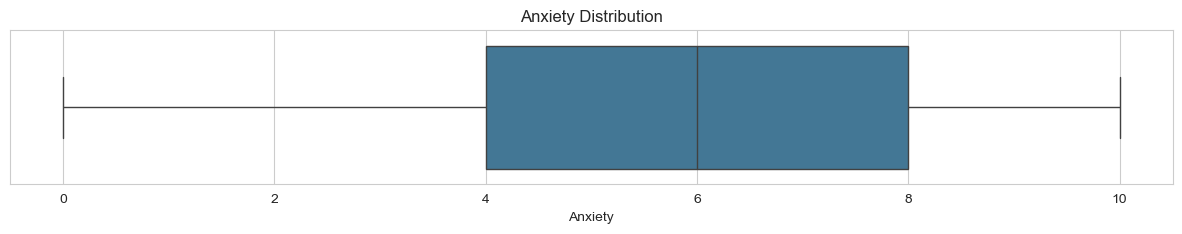


Depression Özet:
Count: 736.00, Mean: 4.80, Std: 3.03, Min: 0.00, 25%: 2.00, 50%: 5.00, 75%: 7.00, Max: 10.00


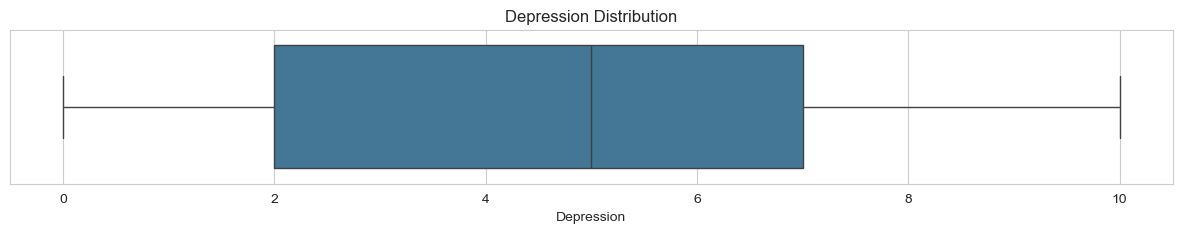


Insomnia Özet:
Count: 736.00, Mean: 3.74, Std: 3.09, Min: 0.00, 25%: 1.00, 50%: 3.00, 75%: 6.00, Max: 10.00


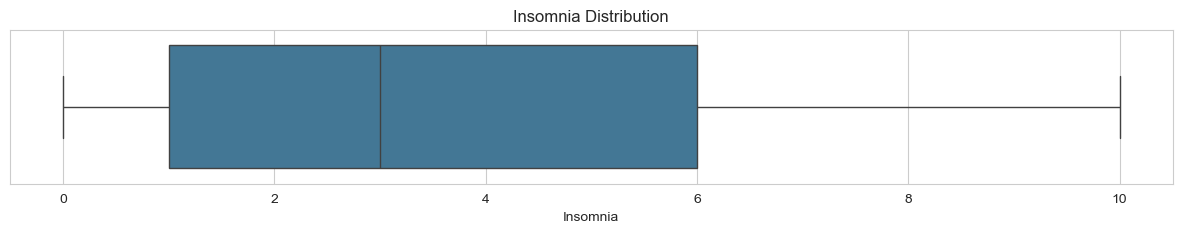


OCD Özet:
Count: 736.00, Mean: 2.64, Std: 2.84, Min: 0.00, 25%: 0.00, 50%: 2.00, 75%: 5.00, Max: 10.00


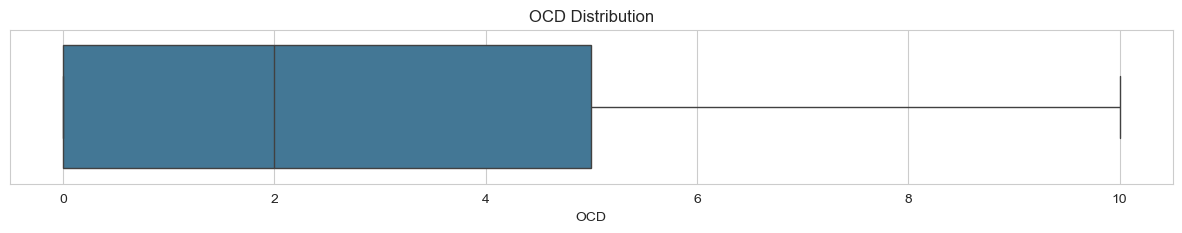

In [140]:
# Uyarıları gizliyoruz
warnings.filterwarnings("ignore", category=FutureWarning)

# İlgili sütunları seçiyoruz
columns_to_plot = selected_columns
palette = "mako"

# Her sütun için boxplot oluşturuyoruz
for column in columns_to_plot:
    plt.figure(figsize=(15, 2))
    
    # hue parametresini tamamen kaldırıyoruz ve sadece x parametresini kullanıyoruz
    sns.boxplot(x=df_music[column], palette=palette)
    
    # Başlık ekliyoruz
    plt.title(f'{column} Distribution')
    
    # İstatistikleri hesaplıyoruz
    stats = df_music[column].describe()
    
    # İstatistikleri yazdırıyoruz
    stats_summary = f"Count: {stats['count']:.2f}, Mean: {stats['mean']:.2f}, Std: {stats['std']:.2f}, Min: {stats['min']:.2f}, 25%: {stats['25%']:.2f}, 50%: {stats['50%']:.2f}, 75%: {stats['75%']:.2f}, Max: {stats['max']:.2f}"
    print(f"\n{column} Özet:\n{stats_summary}")
    
    # Grafiği gösteriyoruz
    plt.show()


In [141]:
print(f"Minimum yaş: {df_music['Age'].min()}")
print(f"Maximum yaş: {df_music['Age'].max()}")

Minimum yaş: 10.0
Maximum yaş: 89.0


In [142]:
df_music['Age group'] = pd.cut(df_music['Age'], bins=[9, 19, 59, 70], labels=['Gençler', 'Yetişkinler', 'Yaşlılar'])
df_music['Age group'].value_counts()

Age group
Yetişkinler    409
Gençler        299
Yaşlılar        21
Name: count, dtype: int64

In [143]:
stream = (df_music.groupby('Age group')['Primary streaming service']
           .agg(['value_counts'])
           .reset_index()
           .rename(columns={'value_counts': 'miktar'}))
stream

Age group          Primary streaming service  miktar
0       Gençler                            Spotify     212
1       Gençler                      YouTube Music      31
2       Gençler                        Apple Music      22
3       Gençler            Other streaming service      18
4       Gençler  I do not use a streaming service.      15
5       Gençler                            Pandora       1
6   Yetişkinler                            Spotify     240
7   Yetişkinler                      YouTube Music      58
8   Yetişkinler  I do not use a streaming service.      50
9   Yetişkinler            Other streaming service      29
10  Yetişkinler                        Apple Music      27
11  Yetişkinler                            Pandora       4
12     Yaşlılar                            Pandora       5
13     Yaşlılar                      YouTube Music       5
14     Yaşlılar  I do not use a streaming service.       3
15     Yaşlılar            Other streaming service       3
16     Yaşlılar                            Spotify       3
17     Yaşlılar                        Apple Music       2

Bu sonuç, her yaş grubunda hangi akış servisinin daha yaygın kullanıldığını gösterir. Örneğin, Gençler arasında en popüler akış servisi Spotify'dır, ardından YouTube Music ve Apple Music gelir. Yetişkinler için de Spotify başta gelirken, Yaşlılar arasında ise YouTube Music en çok tercih edilen servistir.

In [145]:
Teenagers, Adults, Seniors = [df_music.query(f'`Age group` == "{group}"') for group in ['Gençler', 'Yetişkinler', 'Yaşlılar']]

In [146]:
df_music['Age group'].unique()

['Gençler', 'Yaşlılar', 'Yetişkinler', NaN]
Categories (3, object): ['Gençler' < 'Yetişkinler' < 'Yaşlılar']

In [147]:
df_music = df_music.dropna(subset=['Age group'])

In [148]:
df_music['Age group'] = df_music['Age group'].replace({'Gençler': 'Teenager', 'Yetişkinler': 'Adult', 'Yaşlılar': 'Senior'})

In [149]:
teenagers_data = df_music[df_music['Age group'] == 'Teenager'].groupby('Primary streaming service').size().reset_index(name='count')
teenagers_data

Primary streaming service  count
0                        Apple Music     22
1  I do not use a streaming service.     15
2            Other streaming service     18
3                            Pandora      1
4                            Spotify    212
5                      YouTube Music     31

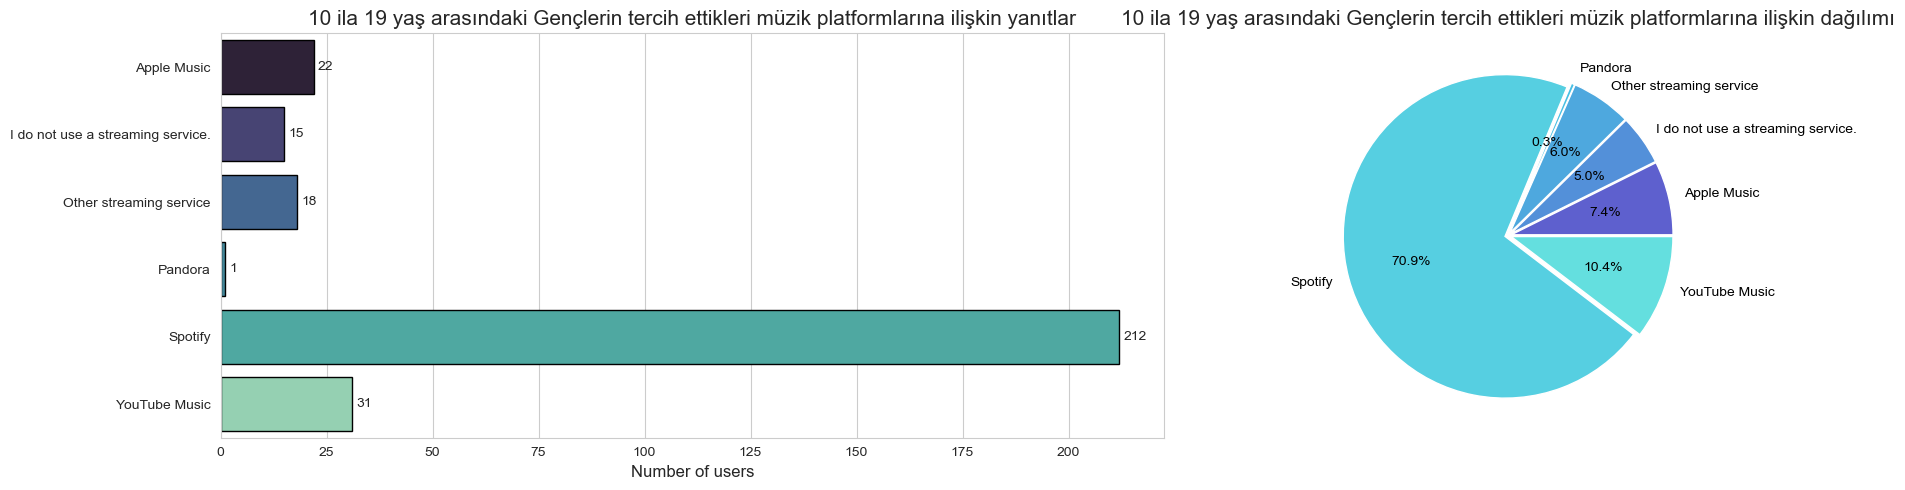

In [150]:
# Bar grafiği için
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# Bar grafiği
sns.barplot(
    x='count', 
    y='Primary streaming service',
    data=teenagers_data, 
    edgecolor='black', 
    palette='mako',
    ax=ax1)
for container in ax1.containers:
    ax1.bar_label(container, padding=3)
ax1.set_title('10 ila 19 yaş arasındaki Gençlerin tercih ettikleri müzik platformlarına ilişkin yanıtlar', fontsize=15)
ax1.set_xlabel('Number of users', fontsize=12)
ax1.set_ylabel('')

# Pasta grafiği için veriyi hazırlama
quantity = teenagers_data['count'].values
services = teenagers_data['Primary streaming service'].values
colors = ['#5e60ce', '#5390d9', '#4ea8de', '#48bfe3', '#56cfe1','#64dfdf']
explode = (0.02, 0.02, 0.02, 0.02, 0.02, 0.02)

# Pasta grafiği
wedges, texts, autotexts = ax2.pie(
    quantity,
    labels=services,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode)
ax2.set_title('10 ila 19 yaş arasındaki Gençlerin tercih ettikleri müzik platformlarına ilişkin dağılımı', fontsize=15)
for text in texts + autotexts:
    text.set_color('black')

# Görselleştirmeyi ayarlama ve gösterme
plt.tight_layout()
plt.show()

Spotify, gençler arasında en popüler müzik dinleme platformudur. Daha sonra Youtube Music ve Apple Music gelmektedir.

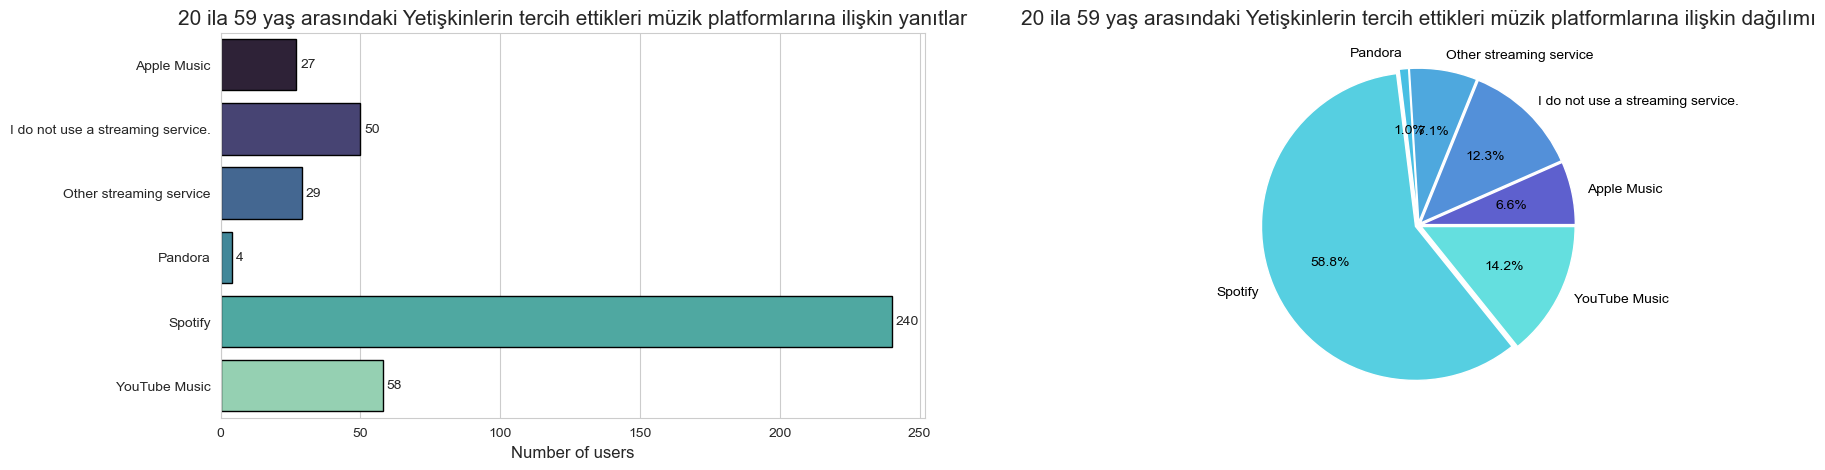

In [152]:
adults_data = df_music[df_music['Age group'] == 'Adult'].groupby('Primary streaming service').size().reset_index(name='count')

# Adults (Yetişkinler) için Barplot ve Pie Chart
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(20, 5))

sns.barplot(
    x='count', 
    y='Primary streaming service',
    data=adults_data, 
    edgecolor='black', 
    palette='mako',
    ax=ax3)
for container in ax3.containers:
    ax3.bar_label(container, padding=3)
ax3.set_title('20 ila 59 yaş arasındaki Yetişkinlerin tercih ettikleri müzik platformlarına ilişkin yanıtlar', fontsize=15)
ax3.set_xlabel('Number of users', fontsize=12)
ax3.set_ylabel('')

quantity = list(adults_data['count'].values)
services = list(adults_data['Primary streaming service'].values)
wedges, texts, autotexts = ax4.pie(
    quantity,
    labels=services,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode)
ax4.set_title('20 ila 59 yaş arasındaki Yetişkinlerin tercih ettikleri müzik platformlarına ilişkin dağılımı', fontsize=15)
for text in texts + autotexts:
    text.set_color('black')

Spotify, yetişkinler arasında en popüler müzik dinleme platformudur. Daha sonra Youtube Music gelmektedir.

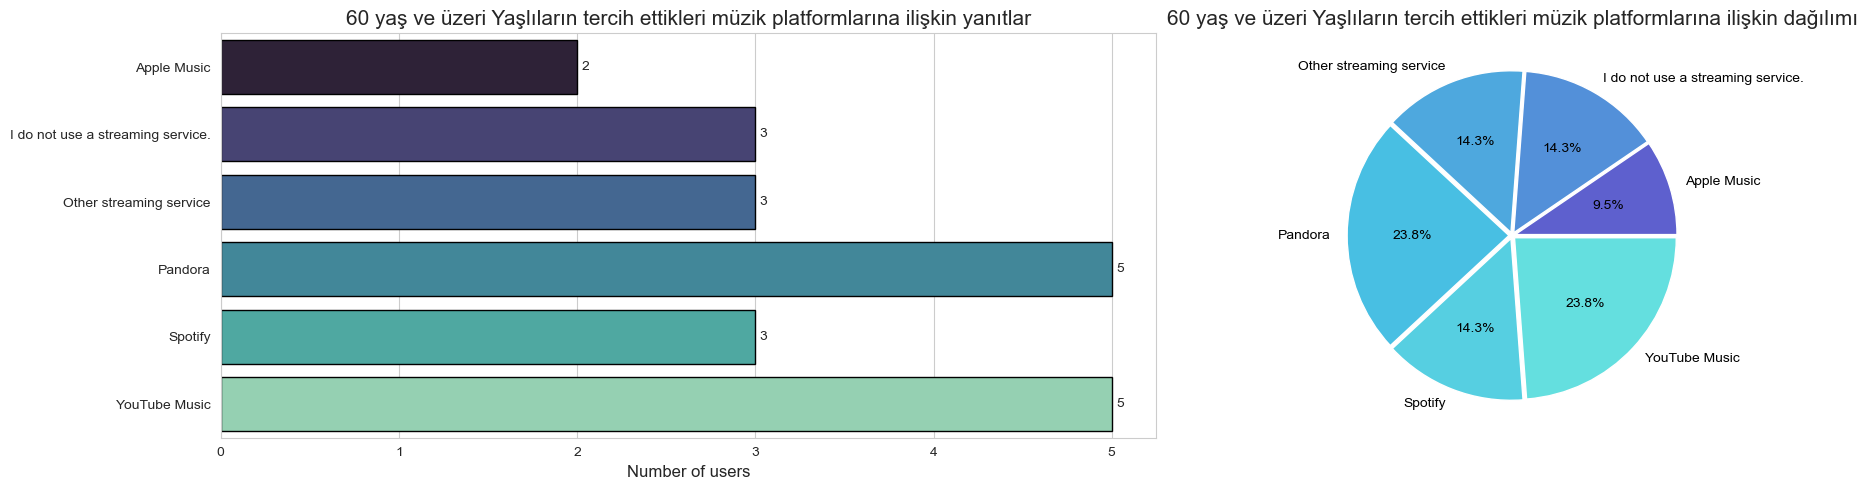

In [154]:
seniors_data = df_music[df_music['Age group'] == 'Senior'].groupby('Primary streaming service').size().reset_index(name='count')

fig, (ax5, ax6) = plt.subplots(1, 2, figsize=(20, 5))

sns.barplot(
    x='count', 
    y='Primary streaming service',
    data=seniors_data, 
    edgecolor='black', 
    palette='mako',
    ax=ax5)
for container in ax5.containers:
    ax5.bar_label(container, padding=3)
ax5.set_title('60 yaş ve üzeri Yaşlıların tercih ettikleri müzik platformlarına ilişkin yanıtlar', fontsize=15)
ax5.set_xlabel('Number of users', fontsize=12)
ax5.set_ylabel('')

quantity = list(seniors_data['count'].values)
services = list(seniors_data['Primary streaming service'].values)
wedges, texts, autotexts = ax6.pie(
    quantity,
    labels=services,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode)
ax6.set_title('60 yaş ve üzeri Yaşlıların tercih ettikleri müzik platformlarına ilişkin dağılımı', fontsize=15)
for text in texts + autotexts:
    text.set_color('black')

plt.tight_layout()
plt.show()

Youtube Music ve Pandora, yaşlılar arasında en popüler müzik dinleme platformudur.

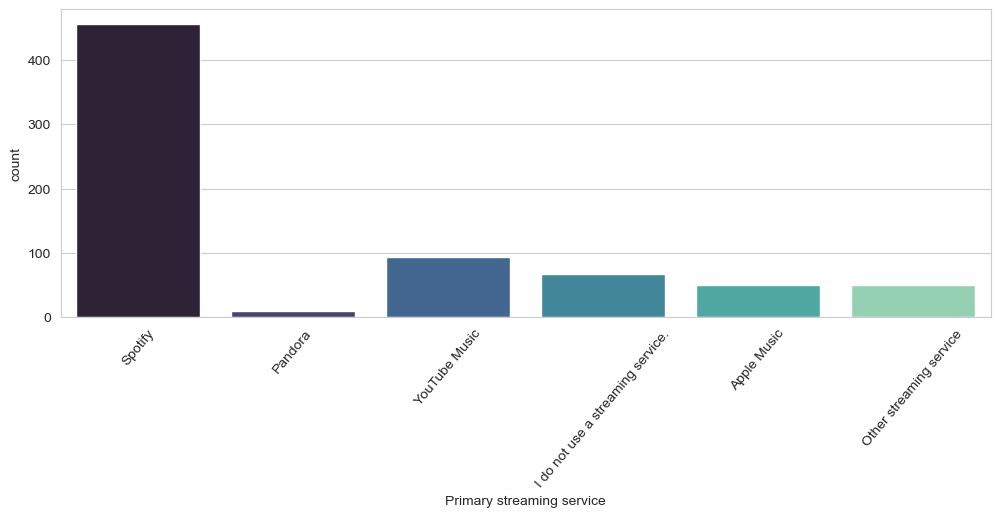

In [156]:
plt.figure(figsize=(12, 4))
sns.countplot(x='Primary streaming service', data=df_music, palette='mako')
plt.xticks(rotation=50)
plt.show()

Genel olarak bakıldığında en popüler streaming servisleri Spotify ve YouTube Music'tir.

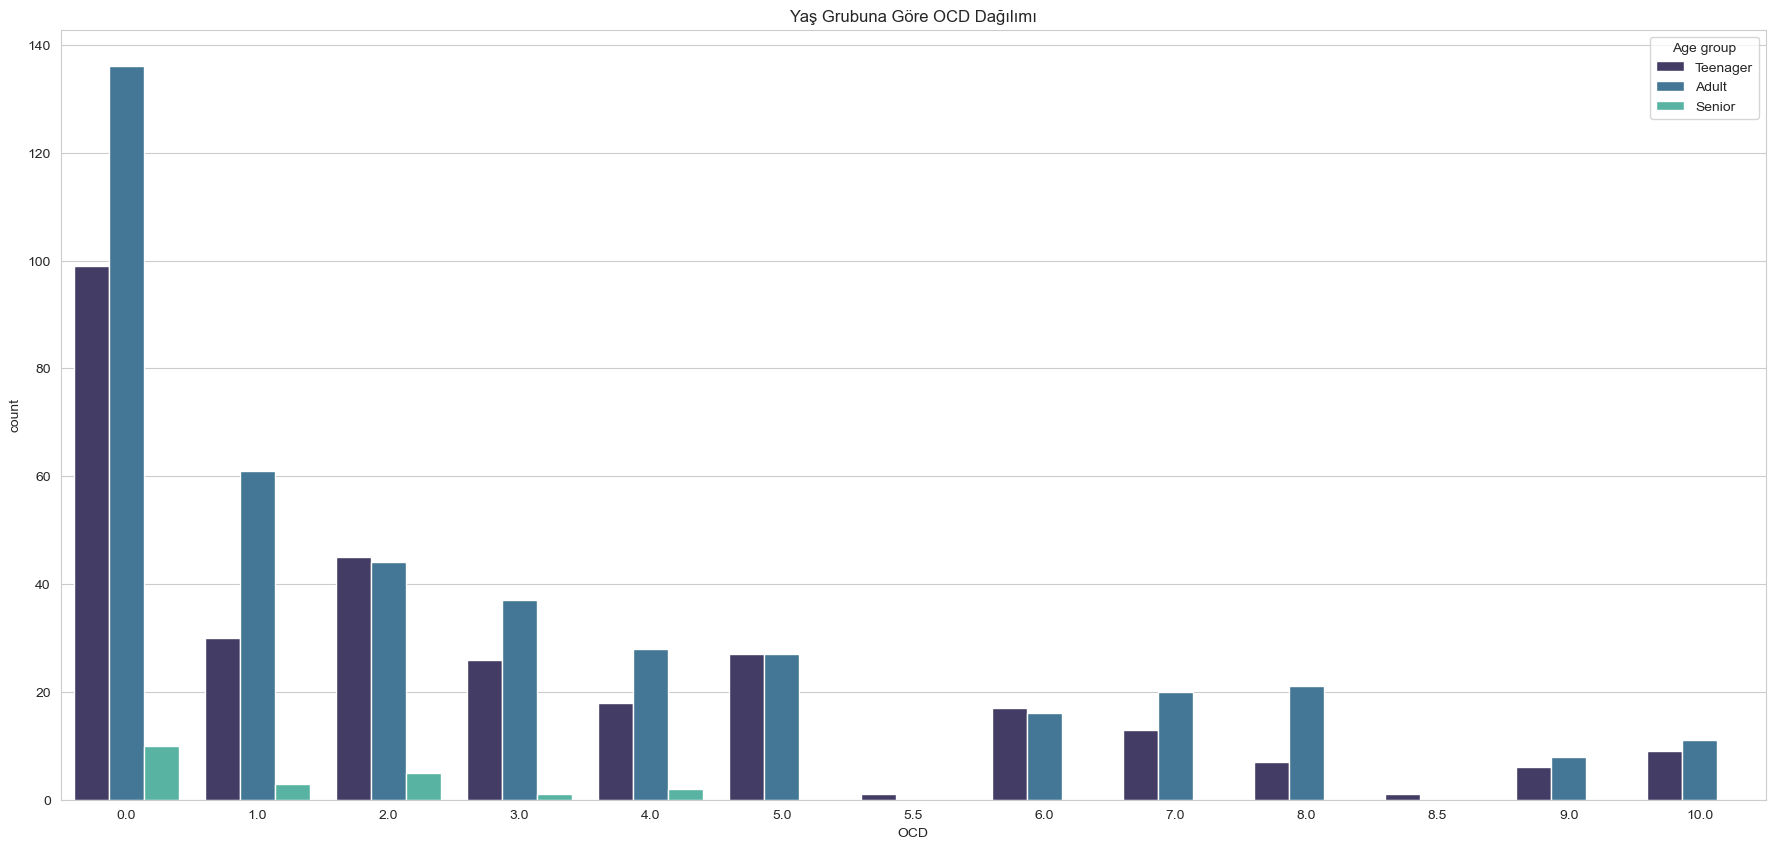

In [158]:
plt.figure(figsize=(22, 10))
sns.countplot(data=df_music, x="OCD", hue="Age group", palette='mako')
plt.title("Yaş Grubuna Göre OCD Dağılımı")
plt.show()

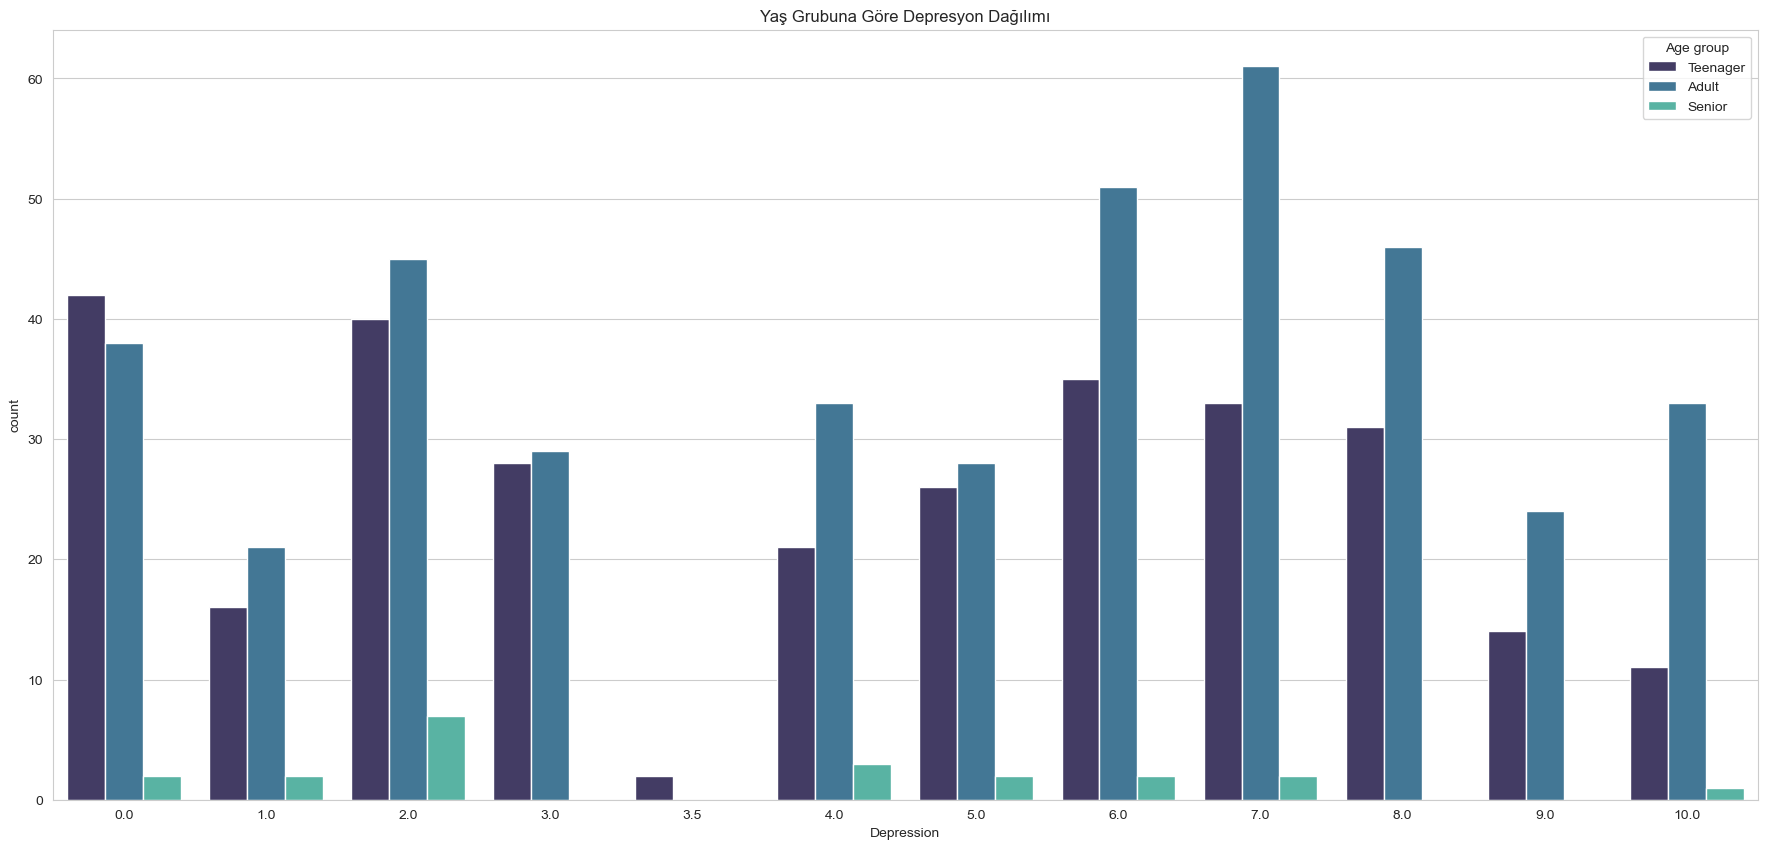

In [159]:
plt.figure(figsize=(22, 10))
sns.countplot(data=df_music, x="Depression", hue="Age group", palette='mako')
plt.title("Yaş Grubuna Göre Depresyon Dağılımı")
plt.show()

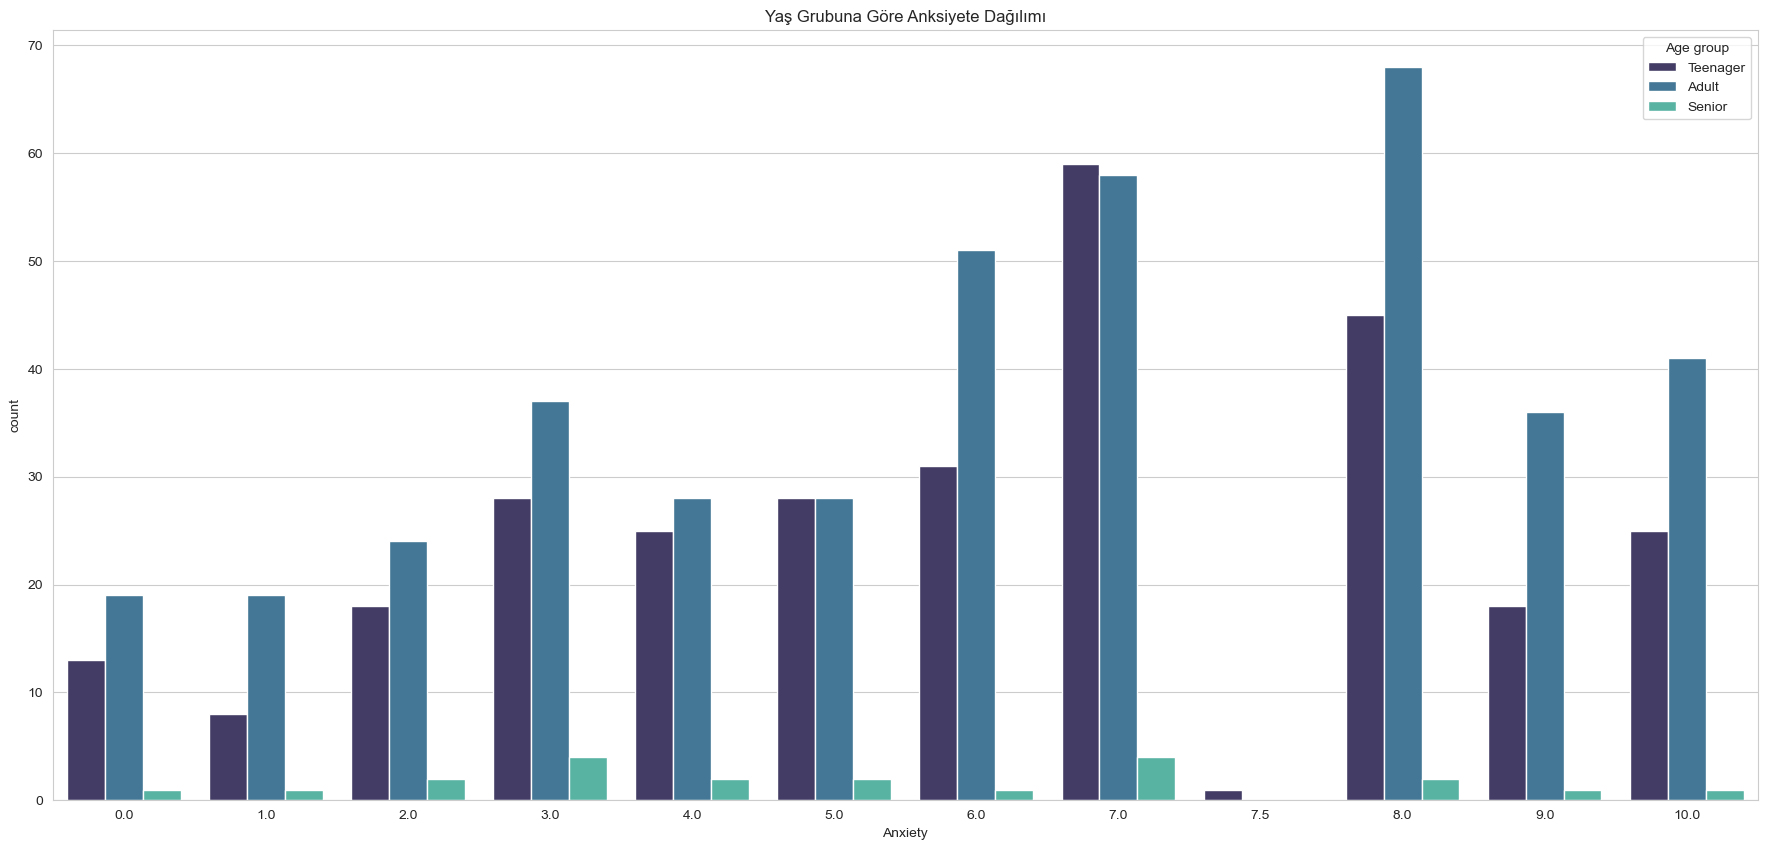

In [160]:
plt.figure(figsize=(22, 10))
sns.countplot(data=df_music, x="Anxiety", hue="Age group", palette='mako')
plt.title("Yaş Grubuna Göre Anksiyete Dağılımı")
plt.show()

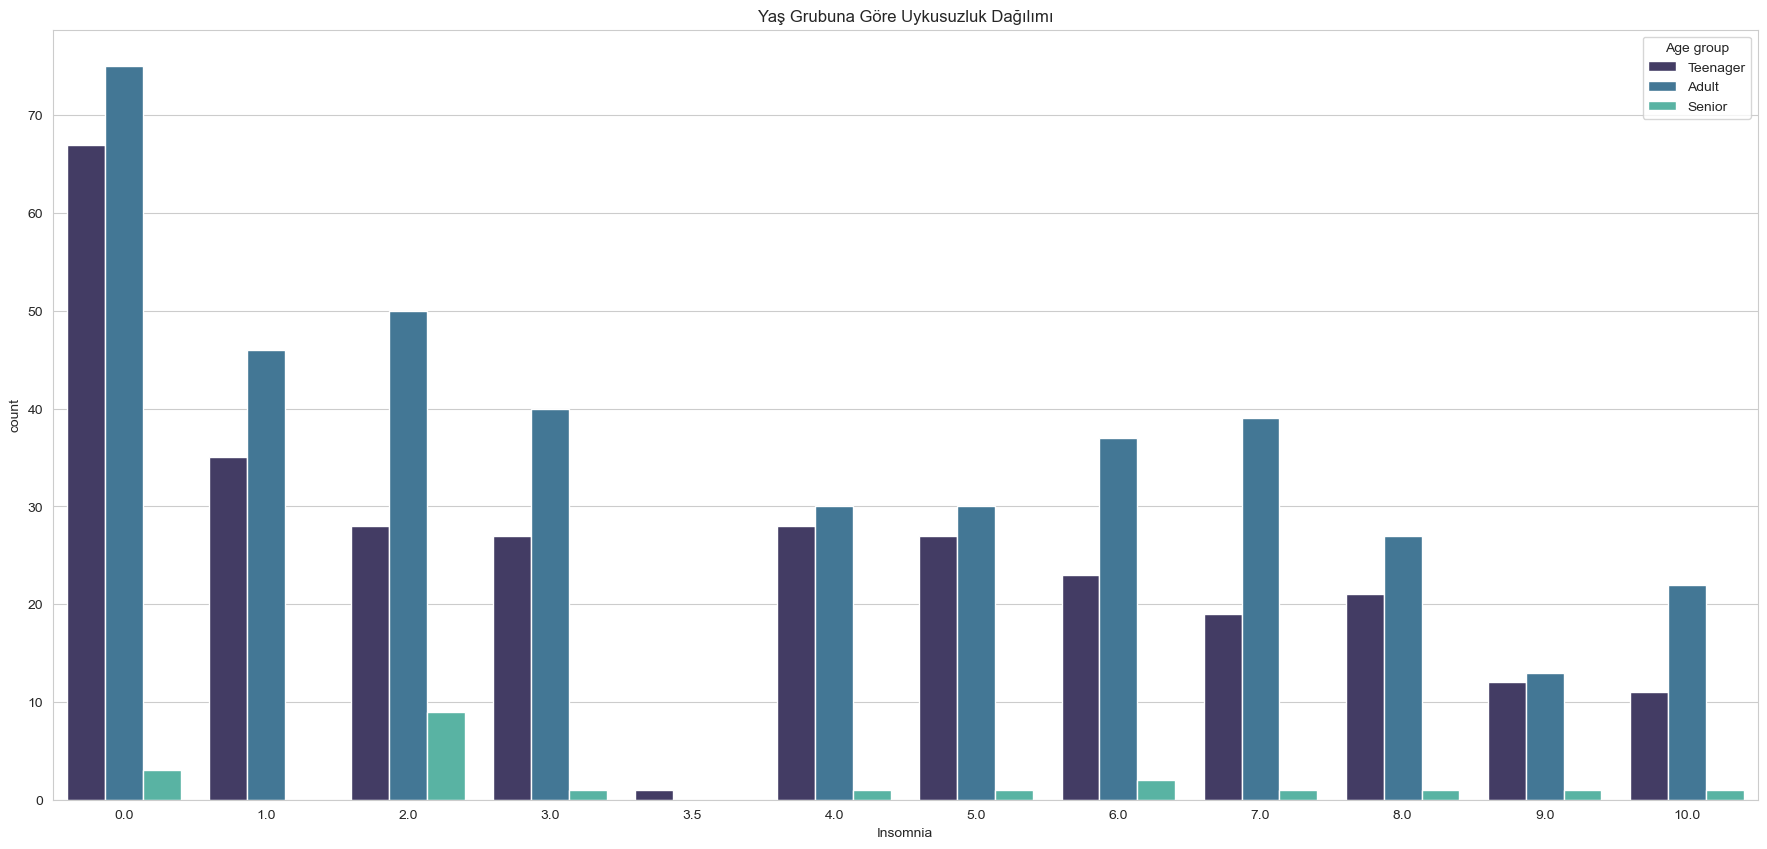

In [161]:
plt.figure(figsize=(22, 10))
sns.countplot(data=df_music, x="Insomnia", hue="Age group", palette='mako')
plt.title("Yaş Grubuna Göre Uykusuzluk Dağılımı")
plt.show()

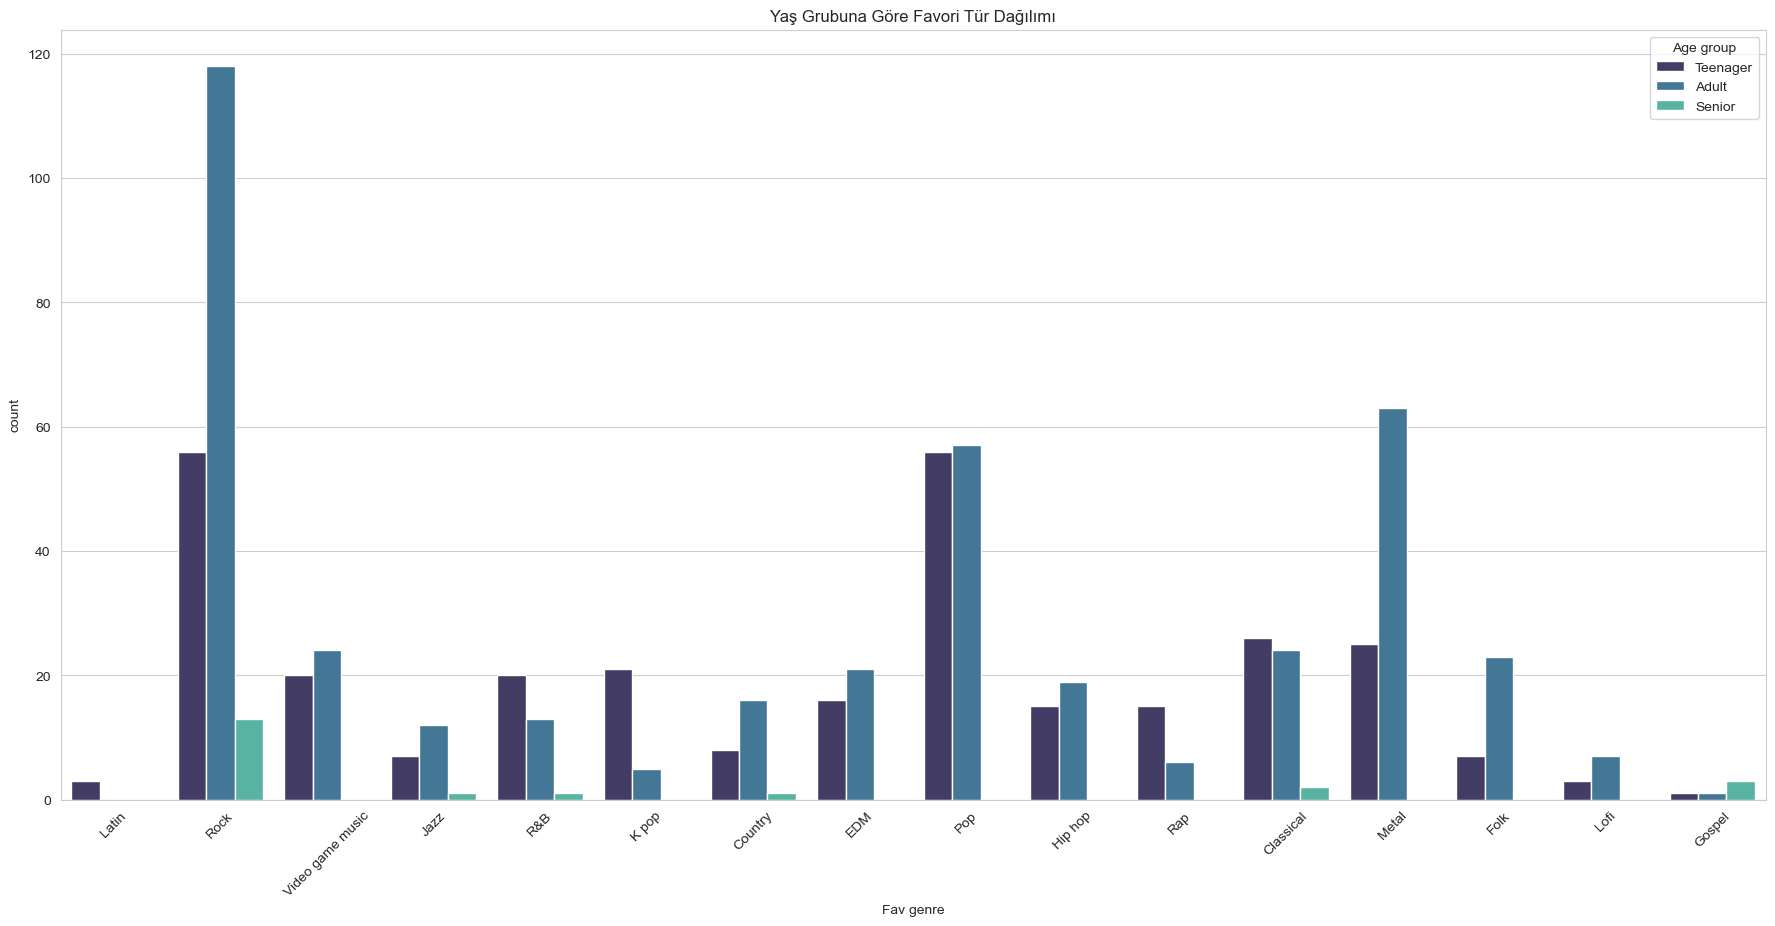

In [162]:
plt.figure(figsize=(22, 10))
sns.countplot(data=df_music, x="Fav genre", hue="Age group", palette='mako')
plt.title("Yaş Grubuna Göre Favori Tür Dağılımı")
plt.xticks(rotation=45)
plt.show()

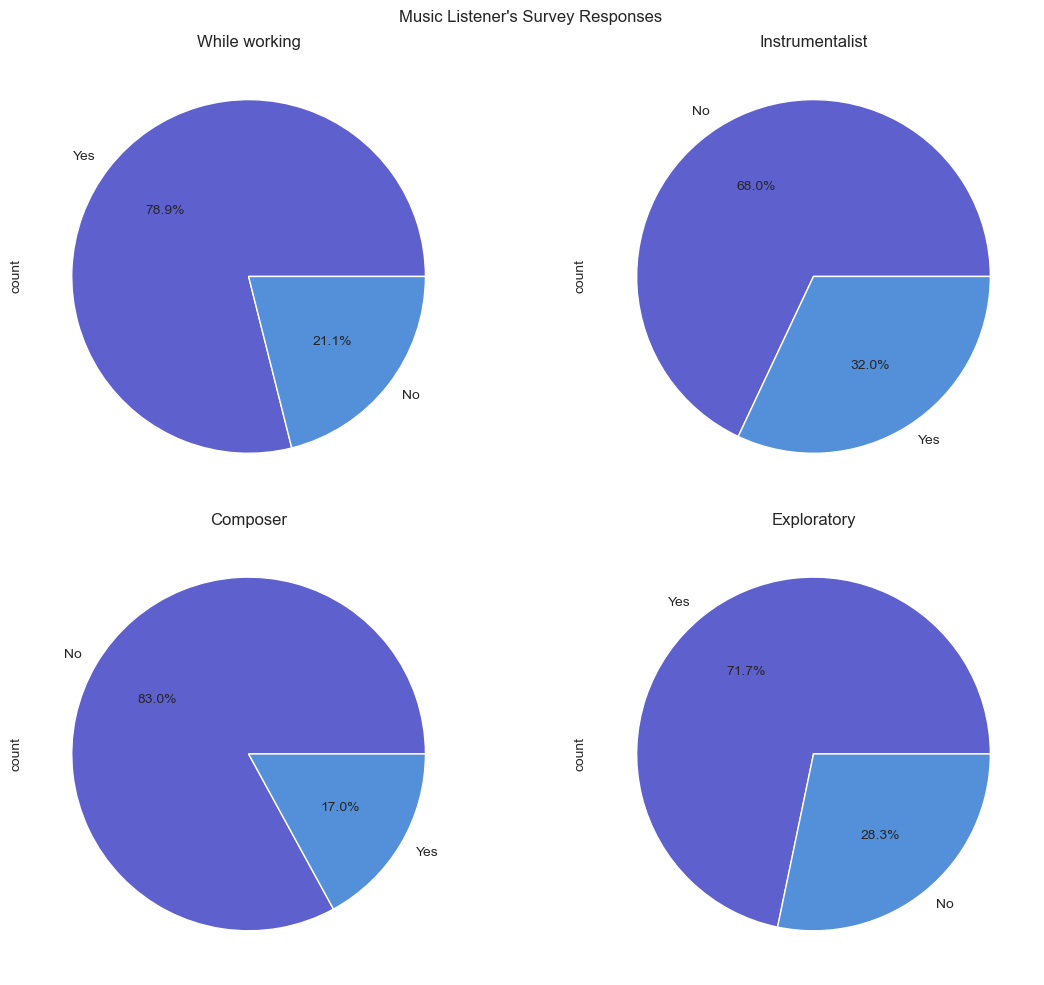

In [163]:
fig, ax = plt.subplots(figsize=(12, 10), nrows=2, ncols=2)
colors = ['#5e60ce', '#5390d9']

# 'While working' sütunundaki kategorilerin yüzdesel dağılımını pasta grafiğiyle göster
df_music['While working'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0, 0], colors=colors, title='While working')

# 'Instrumentalist' sütunundaki kategorilerin yüzdesel dağılımını pasta grafiğiyle göster
df_music['Instrumentalist'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0, 1], colors=colors, title='Instrumentalist')

# 'Composer' sütunundaki kategorilerin yüzdesel dağılımını pasta grafiğiyle göster
df_music['Composer'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1, 0], colors=colors, title='Composer')

# 'Exploratory' sütunundaki kategorilerin yüzdesel dağılımını pasta grafiğiyle göster
df_music['Exploratory'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1, 1], colors=colors, title='Exploratory')
plt.suptitle("Music Listener's Survey Responses")
plt.tight_layout()
plt.show()


Müzik, katılımcının ruh sağlığı koşullarını iyileştiriyor mu/kötüleştiriyor mu?

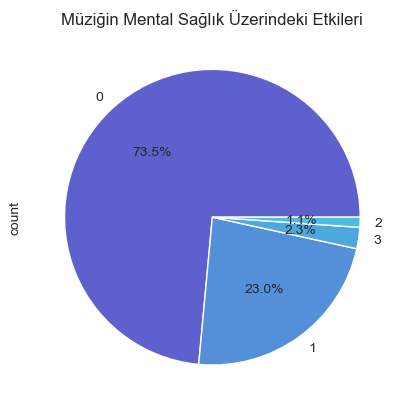

In [165]:
colors = ['#5e60ce', '#5390d9', '#4ea8de', '#48bfe3']

# 'Music effects' sütunundaki kategorilerin yüzdesel dağılımını pasta grafiğiyle göster
df_music['Music effects'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors)

plt.title('Müziğin Mental Sağlık Üzerindeki Etkileri')

plt.show()

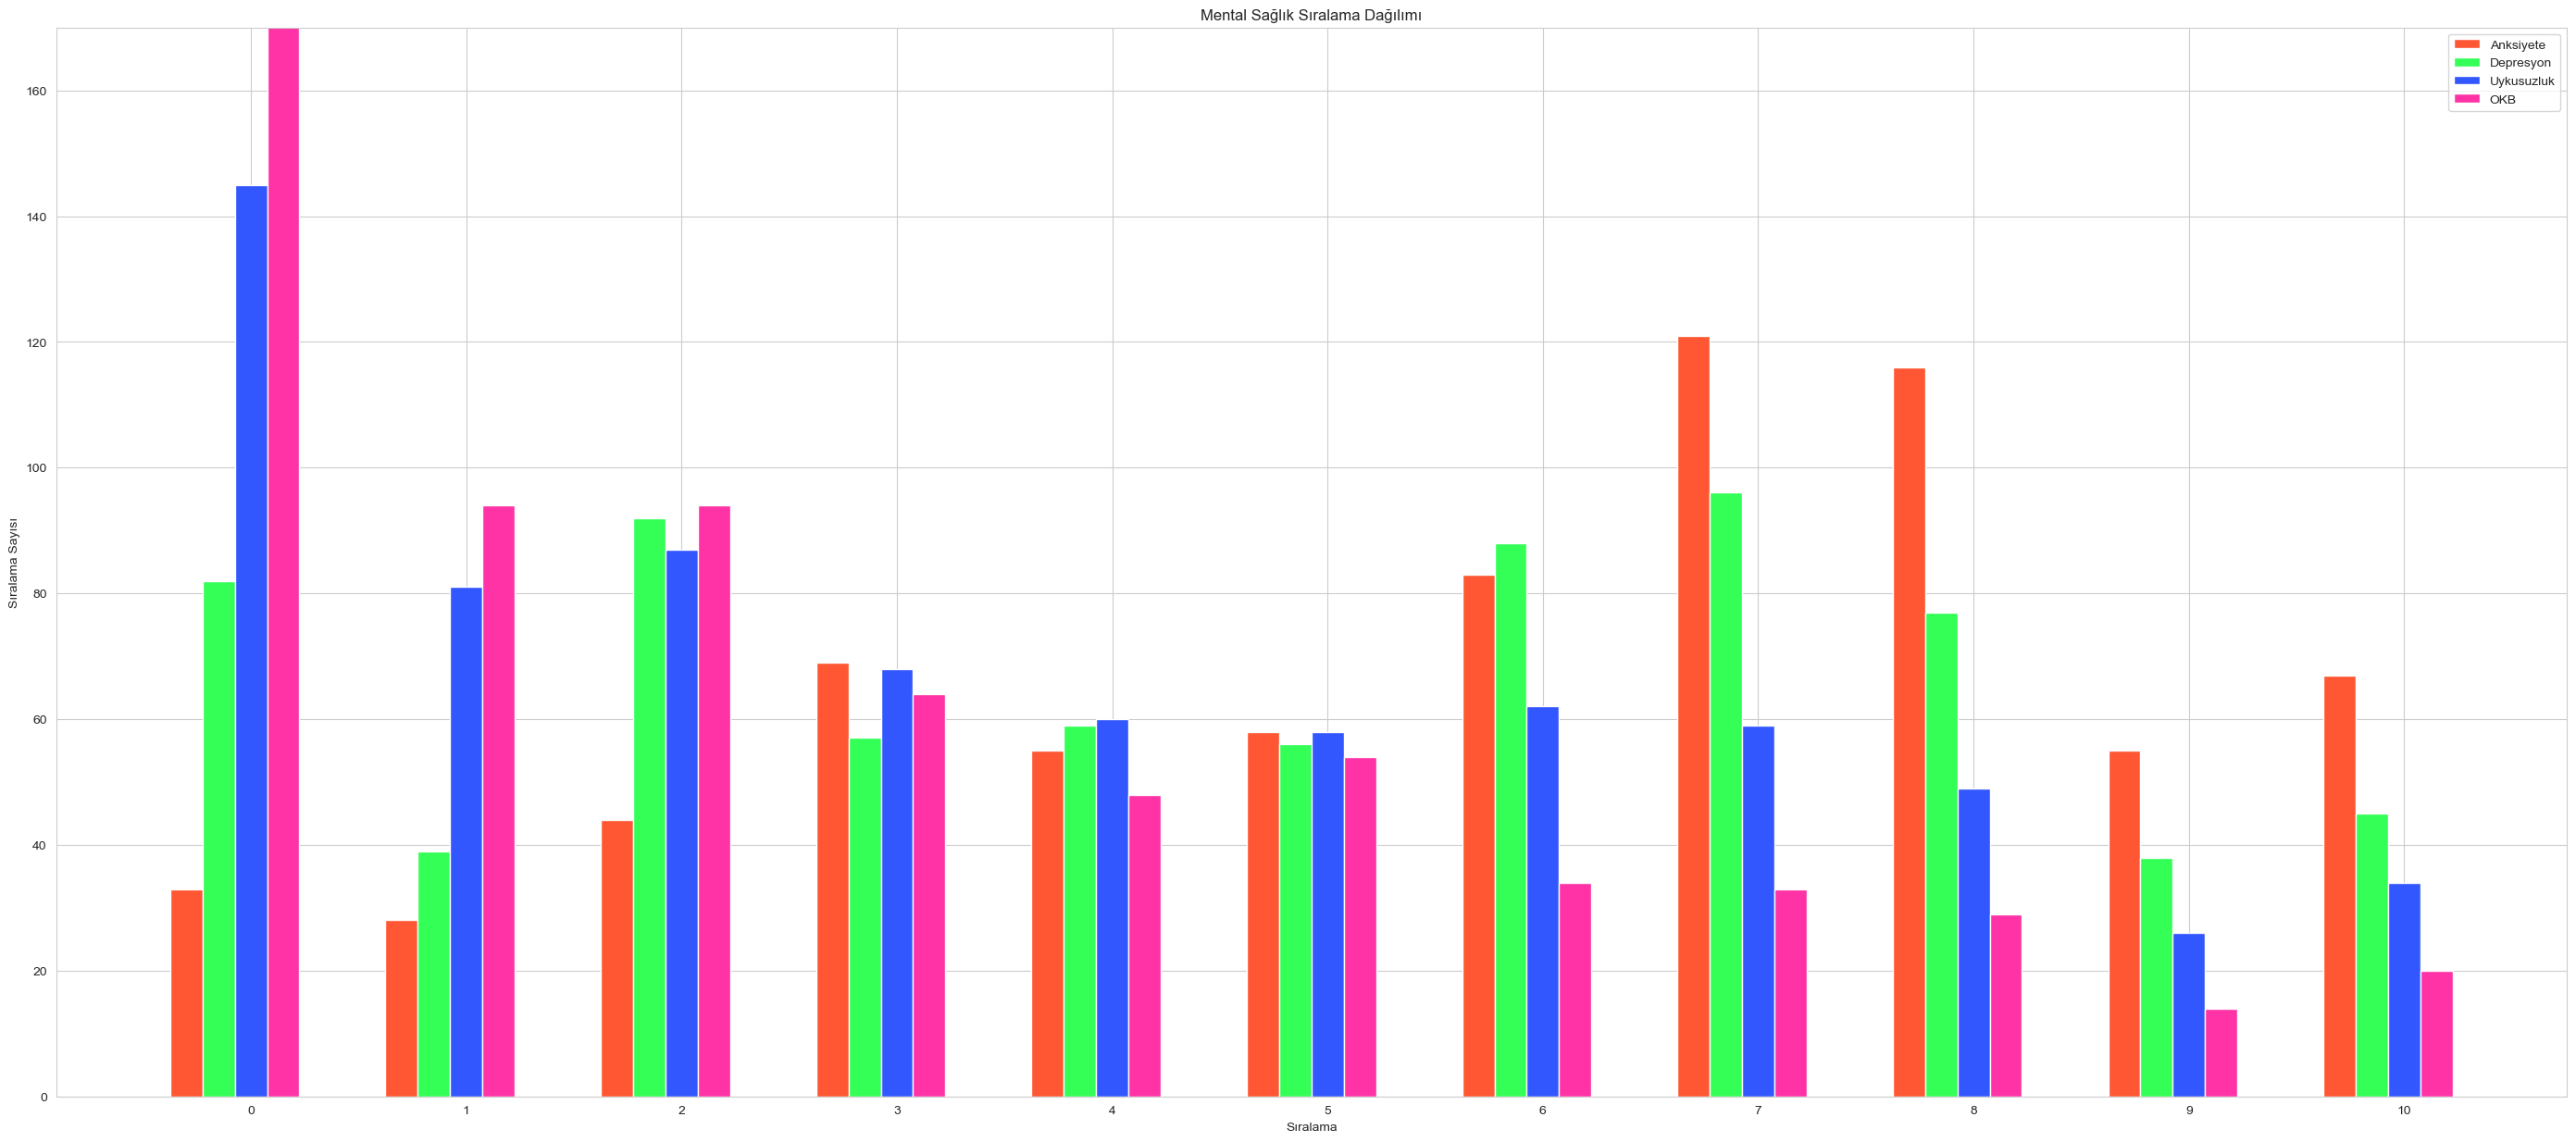

In [166]:
mentalsss = ["Anxiety", "Depression", "Insomnia", "OCD"]
mental = df_music[mentalsss]
mental = mental.round(0).astype(int)

# Her rahatsızlık için sıralama sayısı
disorder_count = []
for disorder in mentalsss:
    x = 0
    while x != 11:
        count = (mental[disorder].values == x).sum()
        disorder_count.append(count)
        x += 1

labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(35, 15))

# Her bir rahatsızlık için çubukları ekleme
ax.bar(x - 2 * width, disorder_count[0:11], width, label="Anksiyete", color='#FF5733')  # Kırmızı
ax.bar(x - width, disorder_count[11:22], width, label="Depresyon", color='#33FF57')  # Yeşil
ax.bar(x, disorder_count[22:33], width, label="Uykusuzluk", color='#3357FF')  # Mavi
ax.bar(x + width, disorder_count[33:], width, label="OKB", color='#FF33A6')  # Pembe

# Grafik ayarları
ax.set_ylim([0, 170])
ax.set_ylabel('Sıralama Sayısı')
ax.set_xlabel('Sıralama')
ax.set_title('Mental Sağlık Sıralama Dağılımı')
ax.set_xticks(x, labels)
ax.legend()

plt.show()

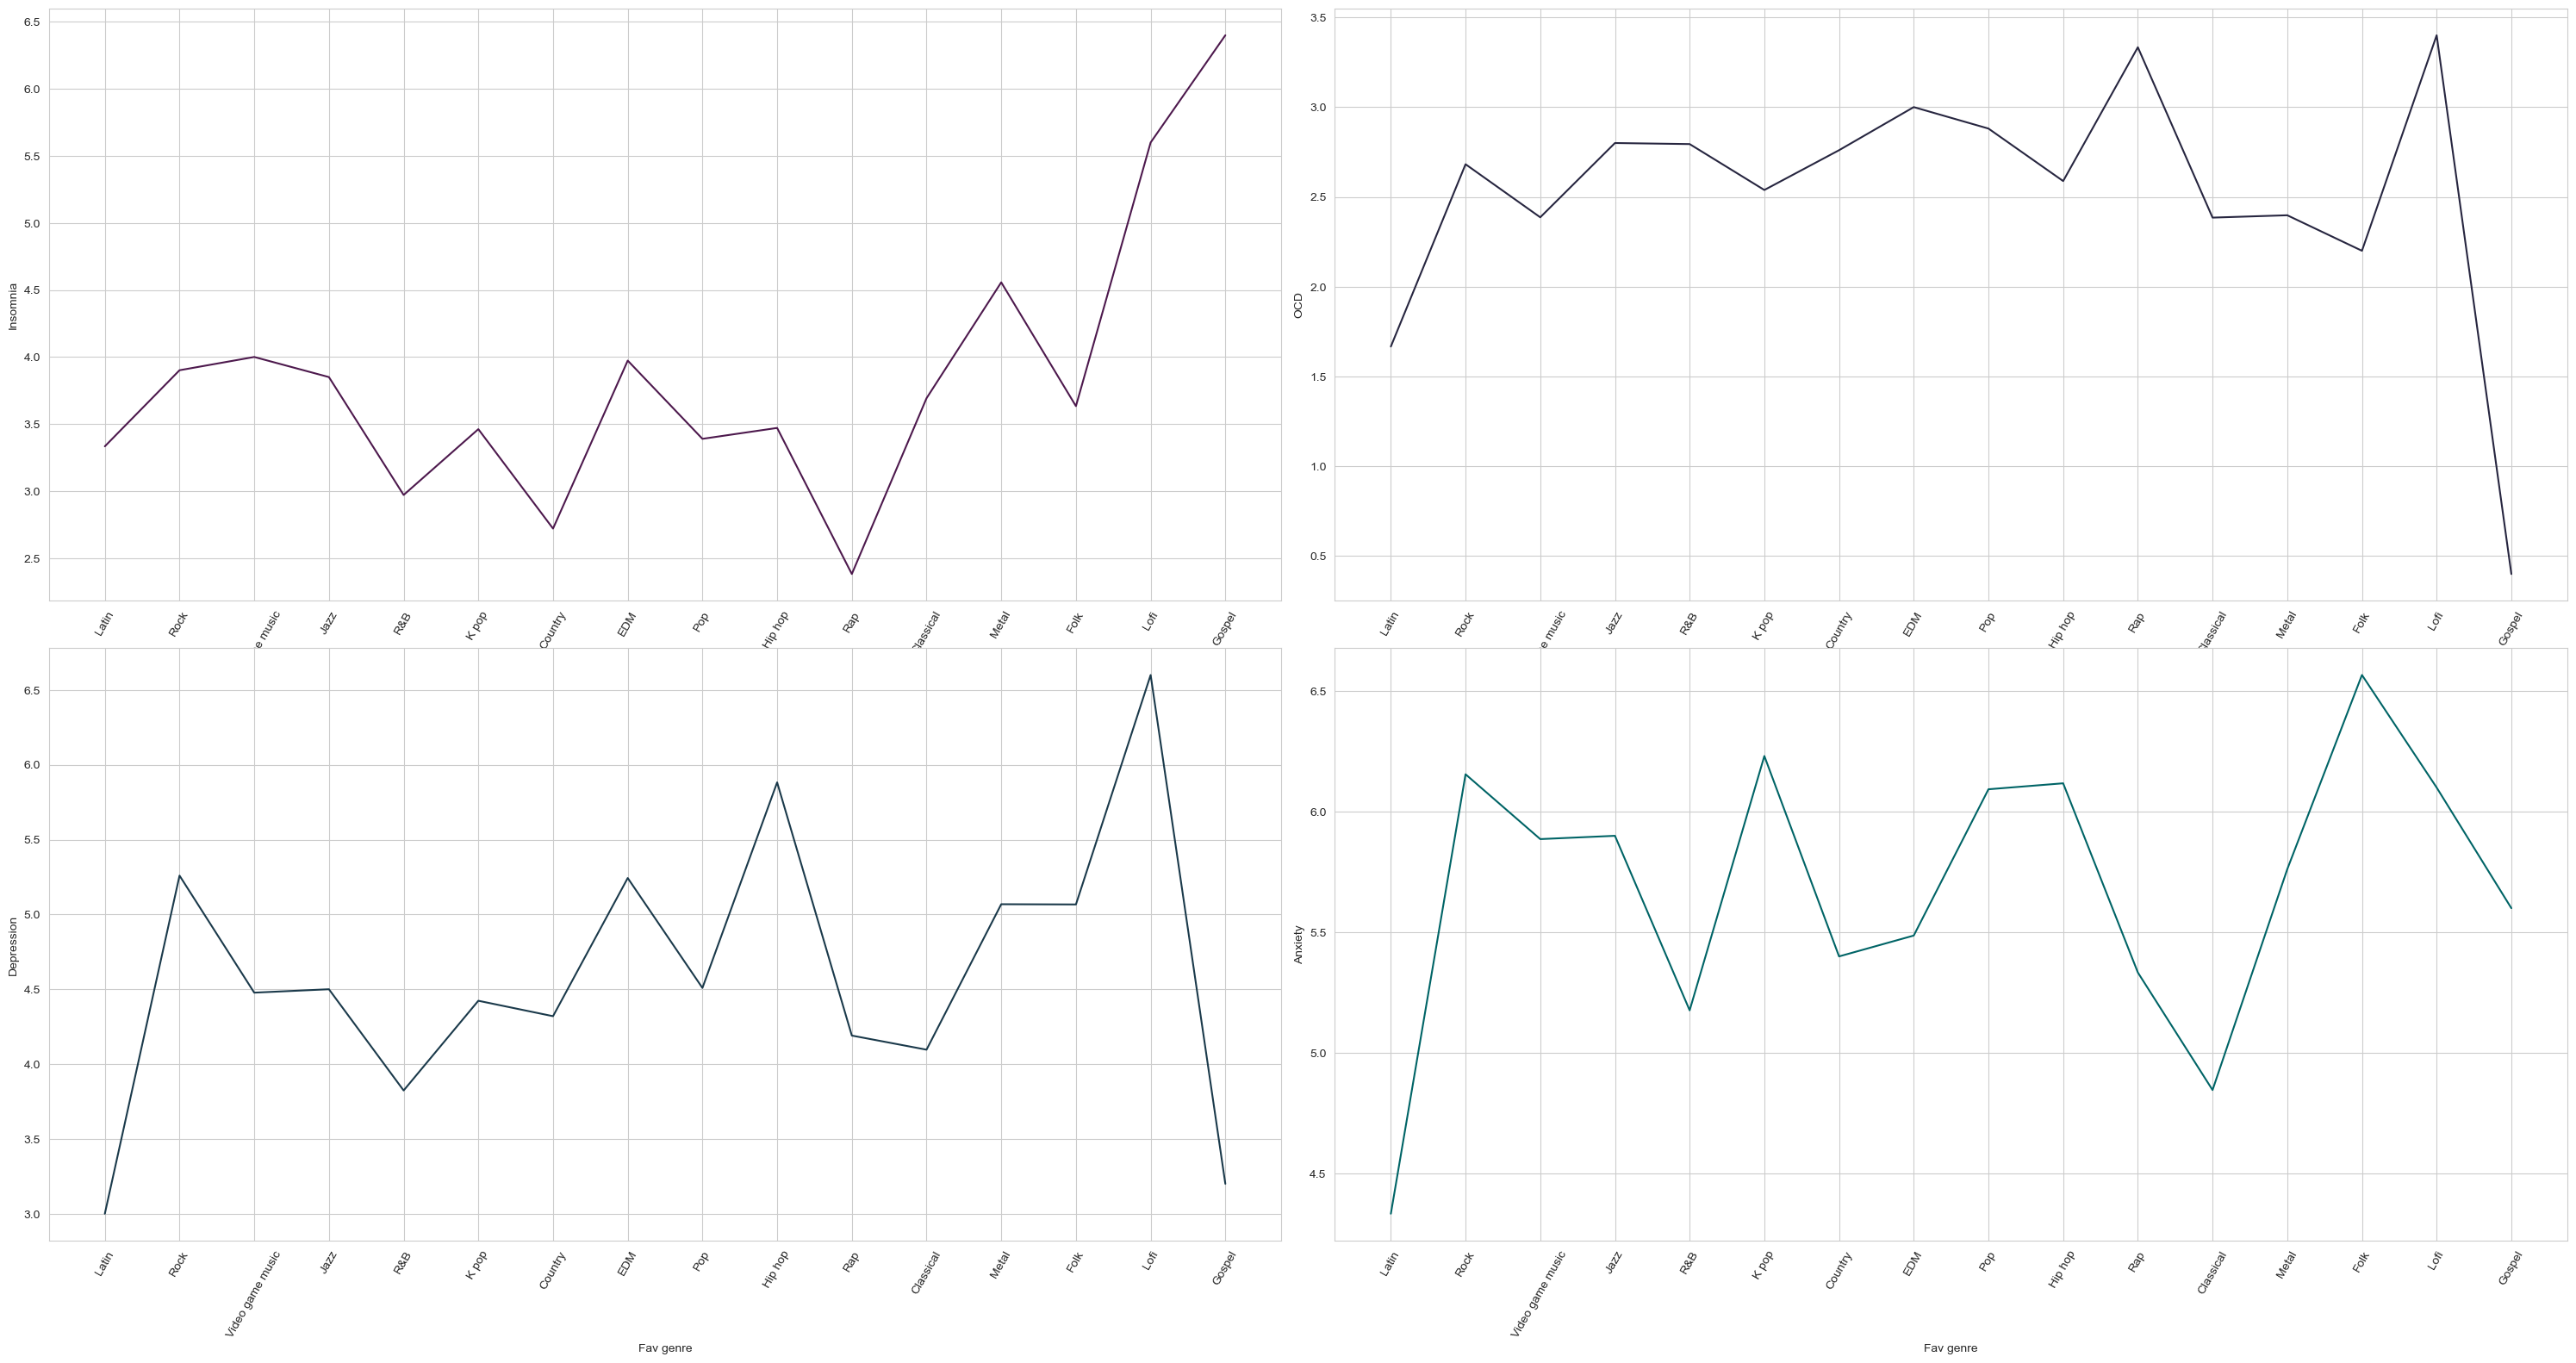

In [167]:
figure, axes = plt.subplots(2, 2, figsize=(30, 15))

# "Fav genre" ve diğer psikolojik durumların çizilmesi
sns.lineplot(ax=axes[0, 0], x=df_music['Fav genre'], y=df_music['Insomnia'], ci=None, color='#4D194D')
sns.lineplot(ax=axes[0, 1], x=df_music['Fav genre'], y=df_music['OCD'], ci=None, color='#272640')
sns.lineplot(ax=axes[1, 0], x=df_music['Fav genre'], y=df_music['Depression'], ci=None, color='#1B3A4B')
sns.lineplot(ax=axes[1, 1], x=df_music['Fav genre'], y=df_music['Anxiety'], ci=None, color='#006466')

# Layout'ı sıkıştırarak her şeyin düzgün görünmesini sağlıyoruz
plt.tight_layout()

# X eksenindeki etiketleri 60 derece döndürmeden önce, etiketlerin konumunu sabitleme
for ax in axes.flat:
    ax.set_xticks(range(len(df_music['Fav genre'].unique())))  # X ekseni için sabit etiketler
    ax.set_xticklabels(df_music['Fav genre'].unique(), rotation=60)  # Etiketleri döndürme

plt.show()

İnsomnia (Uykusuzluk): Uykusuzluk çeken bireyler, rahatlamalarına yardımcı olabilecek sakinleştirici ve huzur veren müziklere yönelme eğilimindedir. Gospel müziği, bu kişiler için rahatlama sağlamak veya uyku zorluklarından uzaklaşmak adına tercih edilebilir.

OCD (Obsesif Kompulsif Bozukluk): Yüksek OCD seviyeleri gösteren bireyler, tekrarlayan ritimler ve döngüler içeren Lofi ve Rap müziğini tercih edebilirler. Bu tür müzikler, yapılandırılmış ritimler arayan kişiler için rahatlatıcı olabilir.

Depresyon: Depresyon yaşayan bireyler, Lofi ve Hip hop müziği gibi, içsel temalar ve duyguları ifade eden müzik türlerine yönelir. Bu müzikler, duygusal bağ kurma ve içsel bir bağlantı sağlama konusunda kişilere yardımcı olabilir.

Anksiyete: Anksiyetesi olan bireyler, Folk, K-pop, Caz ve Rock gibi geniş bir müzik yelpazesinde yer alan türleri tercih edebilir. Bu türler, kişisel tercihlere bağlı olarak ritmik komplekslik, sözler veya enstrümantal unsurlar aracılığıyla duygusal rahatlama ve dikkat dağıtma sağlayabilir.

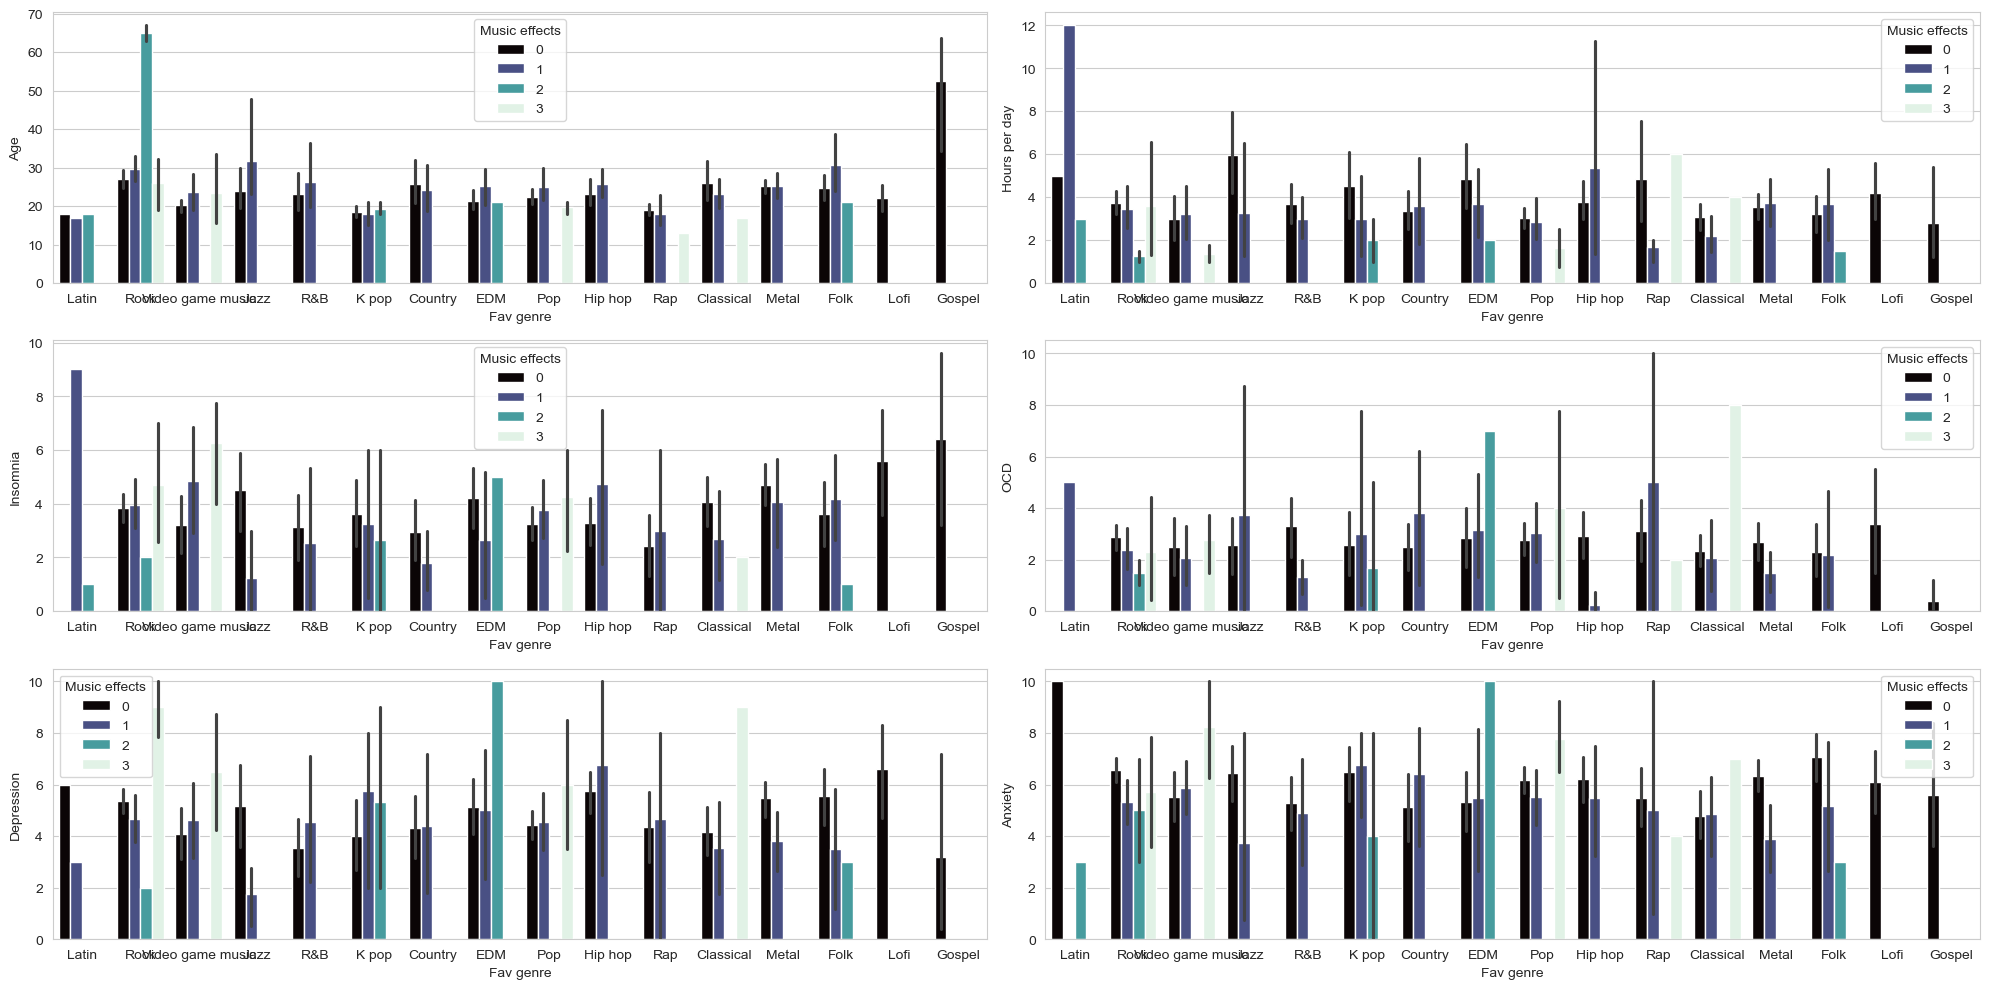

In [169]:
figure, axes = plt.subplots(3, 2, figsize=(20, 10))

# Yaş ve müzik etkileri arasında barplot
sns.barplot(ax=axes[0, 0], x=df_music['Fav genre'], y=df_music['Age'], hue=df_music['Music effects'], palette="mako")

# Günlük dinleme süresi ve müzik etkileri arasında barplot
sns.barplot(ax=axes[0, 1], x=df_music['Fav genre'], y=df_music['Hours per day'], hue=df_music['Music effects'], palette="mako")

# Uykusuzluk ve müzik etkileri arasında barplot
sns.barplot(ax=axes[1, 0], x=df_music['Fav genre'], y=df_music['Insomnia'], hue=df_music['Music effects'], palette="mako")

# Obsesif Kompulsif Bozukluk (OCD) ve müzik etkileri arasında barplot
sns.barplot(ax=axes[1, 1], x=df_music['Fav genre'], y=df_music['OCD'], hue=df_music['Music effects'], palette="mako")

# Depresyon ve müzik etkileri arasında barplot
sns.barplot(ax=axes[2, 0], x=df_music['Fav genre'], y=df_music['Depression'], hue=df_music['Music effects'], palette="mako")

# Anksiyete ve müzik etkileri arasında barplot
sns.barplot(ax=axes[2, 1], x=df_music['Fav genre'], y=df_music['Anxiety'], hue=df_music['Music effects'], palette="mako")

plt.tight_layout()
plt.show()

Gospel Müzik: Uykusuzluk yaşayan ve yaşça daha büyük bireyler tarafından en çok dinlenen müzik türüdür. Bu müzik türünün, uykusuzluk problemini iyileştirmede yardımcı olduğu bildirilmiştir.

Lofi Müzik: OCD (Obsesif Kompulsif Bozukluk), Anksiyete ve Depresyon ile mücadele eden, genellikle 20'li yaşlarının ortalarındaki bireyler tarafından tercih edilmektedir. Lofi müzik, bu durumlar üzerinde iyileştirici etkiler göstermiştir.

Video Oyun Müziği: Tüm mental sağlık durumları üzerinde olumsuz etkiler gösterdiği gözlemlenmiş ve bu tür müziklerin kaçınılması gerektiği belirtilmiştir. Dinleyiciler genellikle 20'li yaşlarının başında olup, bu durum sosyal işlevselliği etkileyebilir.

R&B, Jazz, K-pop, Country, EDM, Hip hop, Folk, Metal ve Latin Müzik: Bu müzik türleri genellikle mental sağlık üzerinde olumlu etkiler yapmakta ya da belirgin bir olumsuz etkisi bulunmamaktadır.

Rock Müzik: Uykusuzluk ve depresyon yaşayan bireyler tarafından kaçınılması gereken bir türdür, çünkü bu müzik türü, bu durumları iyileştirmekten çok daha fazla kötüleştirebilir.

Klasik Müzik: OCD, Anksiyete ve Depresyon ile mücadele eden bireyler tarafından kaçınılması gereken bir türdür, çünkü bu tür müzik, bu durumları iyileştirmekten çok daha fazla kötüleştirme olasılığı taşımaktadır. Ancak, uykusuzluk problemi olan bireyler için potansiyel bir iyileşme gösterebilir.

Dinleme Alışkanlıkları: Lofi ve Gospel müziklerinin 4-6 saat dinlenmesi, belirtilen durumlarda iyileşme ile ilişkilendirilmiştir. Aksine, Video Oyun Müziği ve Pop müzik gibi türlere yalnızca 2 saatlik maruz kalma, bazı katılımcılarda kötüleşmelere yol açmıştır.

Anksiyete Seviyeleri:

Tüm dinleyicilerin belirli bir anksiyete düzeyine sahip olduğu gözlemlenmiştir. Ancak, Rock, Jazz, K-pop, Hip hop, Pop ve Folk müziğini tercih eden bireyler, özellikle 6'nın üzerinde anksiyete seviyelerine sahip olmaktadır. Bu durum, bu tür müziklerin stres veya kaygıyı artırabilecek, enerjik veya duygusal olarak yoğun özellikler taşıyan müzikler olabileceğini göstermektedir.

Uykusuzluk Seviyeleri:

Genel olarak dinleyiciler düşük seviyelerde uykusuzluk (4'ün altında) yaşamaktadır. Ancak, Metal, Lofi ve Gospel müziği dinleyen bireylerde daha yüksek seviyelerde uykusuzluk gözlemlenmiştir. Bu, bu türlerin uyku düzeni üzerinde farklı etkiler yapabileceğini düşündürmektedir.

OCD Seviyeleri:

OCD belirtileri, Rap ve Lofi müziği dinleyen bireylerde daha belirgin olarak görülmüştür ve maksimum seviyeler 3'ün üzerinde çıkmıştır. Bu, bu türlerin obsesif-kompulsif davranışlar veya özellikler ile bir korelasyon taşıyabileceğini göstermektedir.

Depresyon Seviyeleri:

Lofi, Hip hop ve Rock müziği dinleyen bireylerde yüksek depresyon seviyeleri (5'in üzerinde) tespit edilmiştir. Bu müzik türleri, depresyon semptomları yaşayan bireylerle daha çok özdeşleşiyor olabilir ya da ruh halini olumsuz şekilde etkileyebilir.

Mental Sağlıkta İyileşme ve Kötüleşme:

Müzik genel olarak terapötik faydalar sağlasa da, Rock, Video Oyun Müziği, Pop, Rap ve Klasik müziği dinleyenler sıklıkla kötüleşen durumlar yaşamaktadır. Bu türlerin bazı bireyler için mental sağlık problemlerini kötüleştirebileceğini gösteriyor.

OCD ve Müzik: Rock, Video Oyun Müziği, Pop, Rap ve Klasik müziği dinleyenlerde farklı OCD seviyeleri gözlemlenmiştir. Klasik müzik dinleyicilerinde en yüksek OCD seviyeleri görülmüştür. Bu, Klasik müziğin yapılandırılmış ve tekrarlayan doğasının obsesif davranışları etkileyebileceğini düşündürmektedir.

Anksiyete ve Müzik: Anksiyete, Rock, Video Oyun Müziği, Pop ve Klasik müzik dinleyicilerinde mevcuttur ve Video Oyun Müziği dinleyenlerde en yüksek seviyelerde gözlemlenmiştir. Video Oyun Müziği'nin derinlemesine ve genellikle yoğun yapısı, artan kaygıya katkıda bulunabilir.

Uykusuzluk ve Müzik: Uykusuzluk, Rock, Video Oyun Müziği, Pop ve Klasik müzik dinleyicilerinde belirgindir. Bu türlerin uyarıcı doğası, özellikle Video Oyun Müziği'nin, uyku düzenini bozabilecek etkiler yaratabileceğini düşündürmektedir.

Depresyon ve Müzik: Rock, Video Oyun Müziği, Pop ve Klasik müziği dinleyen bireylerde yüksek depresyon seviyeleri tespit edilmiştir. Bu müzik türleri, zaten depresif olan bireyleri çekebilir ya da depresif ruh hallerine katkıda bulunabilir.

Bu bulgular, müzik tercihlerinin ve maruz kalma sürelerinin, bireylerin mental sağlık durumu üzerinde önemli etkiler yaratabileceğini vurgulamaktadır. Bazı müzik türleri, özellikle Gospel ve Lofi gibi türler, belirli koşullar altında faydalı olabilirken, diğer türler (Video Oyun Müziği, Rock, Pop, Klasik gibi) bazı bireyler için olumsuz etkiler yaratabilir. Bu nedenle, müzik öneri sistemleri, bireylerin mevcut ruh hallerine ve genel durumlarına göre uygun türler önermede önemli bir rol oynayabilir.

In [171]:
folder_name = 'analiz_sonuclari'

# Klasörün var olup olmadığını kontrol et
if not os.path.exists(folder_name):
    os.makedirs(folder_name)  # Klasör yoksa oluştur
    print(f"{folder_name} klasörü başarıyla oluşturuldu.")
else:
    print(f"{folder_name} klasörü zaten mevcut.")

# Klasör yolu
output_path = 'analiz_sonuclari/'

analiz_sonuclari klasörü başarıyla oluşturuldu.


In [297]:
# df_music ve df_spotify'yi kaydetmek
df_music.to_csv(f'{output_path}df_music_analiz_sonuclari.csv', index=False)  # CSV formatında
df_music.to_pickle(f'{output_path}df_music_analiz_sonuclari.pkl')            # Pickle formatında

df_spotify.to_csv(f'{output_path}df_spotify_analiz_sonuclari.csv', index=False)  # CSV formatında
df_spotify.to_pickle(f'{output_path}df_spotify_analiz_sonuclari.pkl')           # Pickle formatında

In [299]:
# Dosyaların kaydedilip kaydedilmediğini kontrol et
print(os.listdir('analiz_sonuclari/'))

['df_music_analiz_sonuclari.csv', 'df_music_analiz_sonuclari.pkl', 'df_spotify_analiz_sonuclari.csv', 'df_spotify_analiz_sonuclari.pkl']
